# Exploratory Data Analysis Insights

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams.update({
    'font.size': 10,         # base size for text
    'axes.titlesize': 12,    # title size
    'axes.labelsize': 10,    # x/y label size
    'xtick.labelsize': 8,    # x-axis tick label size
    'ytick.labelsize': 8,    # y-axis tick label size
    'legend.fontsize': 9     # legend font size
})

In [ ]:
product = pd.read_csv("archive/product.csv")
transaction_data = pd.read_csv("archive/transaction_data.csv")
demographics = pd.read_csv("archive/hh_demographic.csv")

---
## Exploratory Data Analysis (EDA) of Household Product Dataset

### Dataset Information:
- **No Missing Values**: The dataset is complete, which simplifies data preprocessing.
- **rows:** 92,353
- **columns:** 7

### Variable Distribution:

| Variable                | Description                                         | Unique Values |
|-------------------------|-----------------------------------------------------|--------------|
| `DEPARTMENT`           |  Groups similar products together    | 44           |
| `BRAND`               | Indicates Private or National label brand | 2            |
| `COMMODITY_DESC`       | Groups similar products together at a lower level (commodity) | 308          |
| `SUB_COMMODITY_DESC`           | Groups similar products together at the lowest level (sub-commodity) | 2,383        |
| `CURR_SIZE_OF_PRODUCT` |  Indicates package size | 4,345        |
| `MANUFACTURER`        |  Uniquely identifies each manufacturer | 6,476        |
| `PRODUCT_ID`          | Uniquely identifies each product | 92,353       |

**Note:**
- Information for `CURR_SIZE_OF_PRODUCT` is not available for all products.
- No duplication in `PRODUCT_ID` records.



In [ ]:
product.head()

PRODUCT_ID  MANUFACTURER    DEPARTMENT     BRAND            COMMODITY_DESC  \
0       25671             2       GROCERY  National                  FRZN ICE   
1       26081             2  MISC. TRANS.  National  NO COMMODITY DESCRIPTION   
2       26093            69        PASTRY   Private                     BREAD   
3       26190            69       GROCERY   Private      FRUIT - SHELF STABLE   
4       26355            69       GROCERY   Private             COOKIES/CONES   

            SUB_COMMODITY_DESC CURR_SIZE_OF_PRODUCT  
0          ICE - CRUSHED/CUBED                22 LB  
1  NO SUBCOMMODITY DESCRIPTION                       
2         BREAD:ITALIAN/FRENCH                       
3                  APPLE SAUCE                50 OZ  
4            SPECIALTY COOKIES                14 OZ

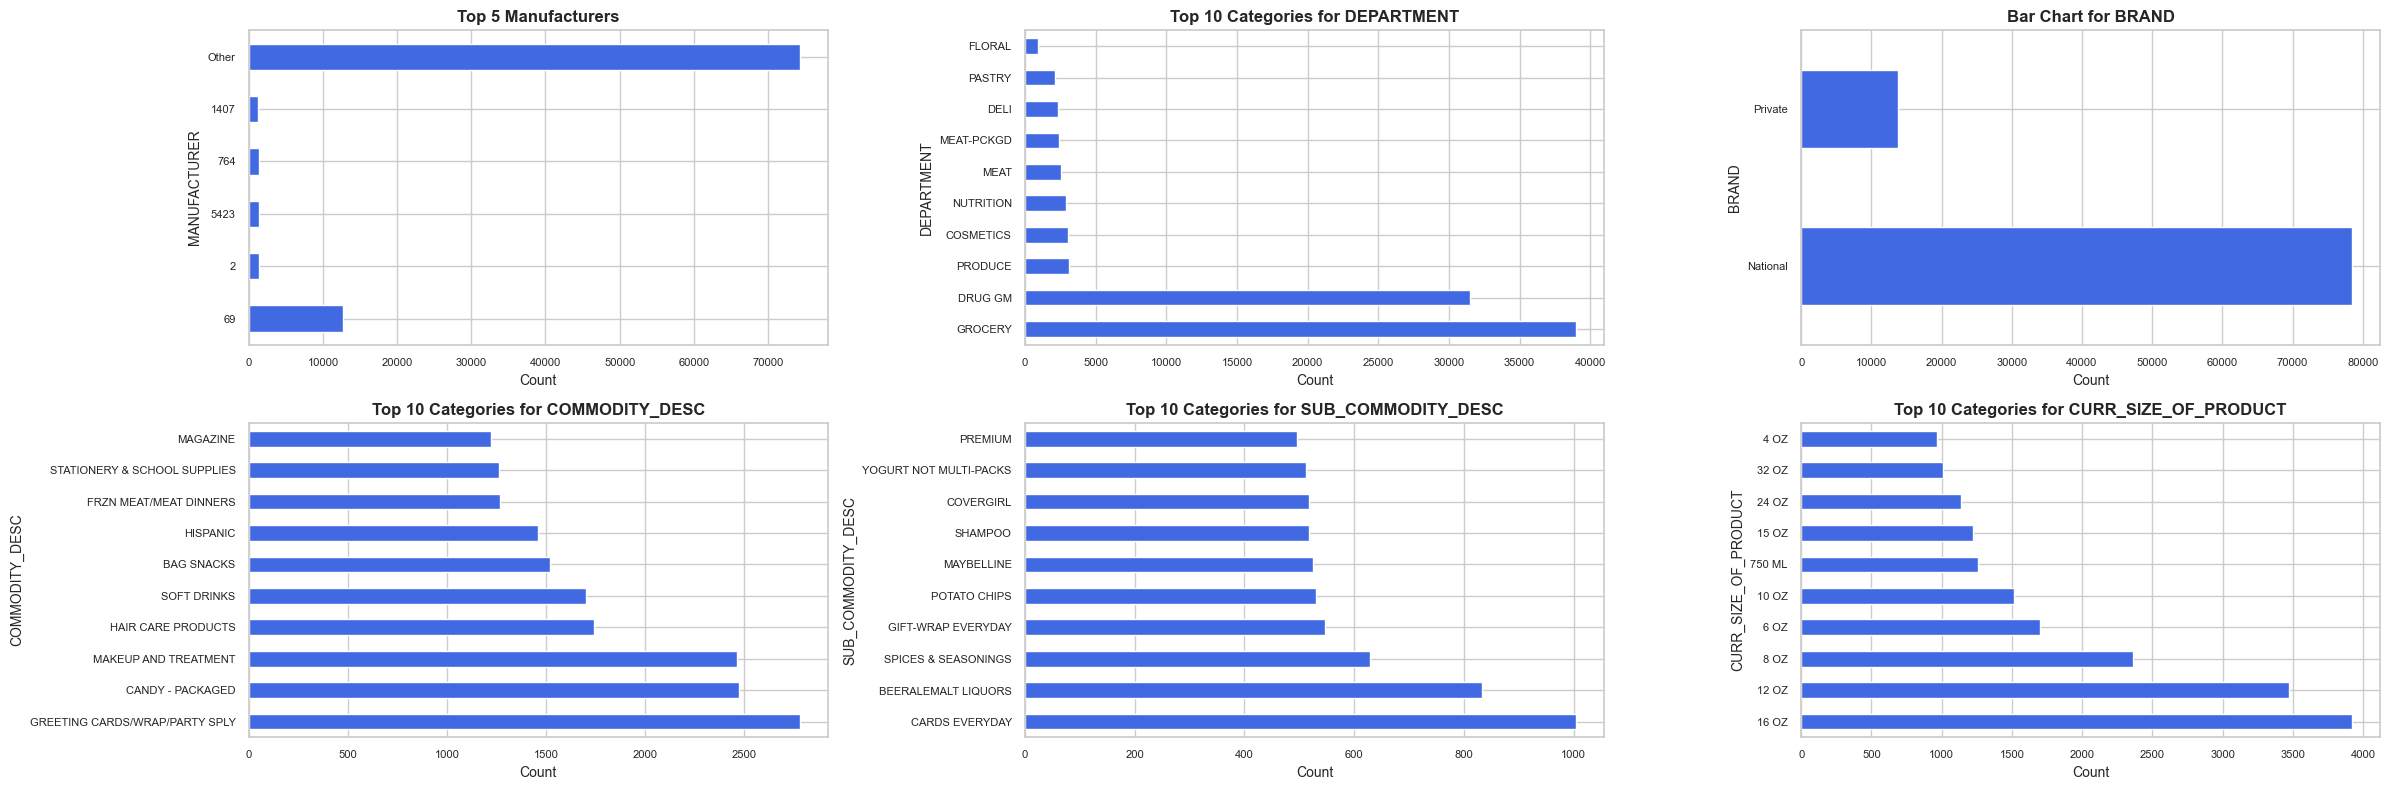

In [ ]:
drop_cols = ["PRODUCT_ID"]
cols = [col for col in product.columns if col not in drop_cols]

TOP_N = 10
TOP_MANUFACTURERS = 5

# Plot settings
num_cols = len(cols)
cols_per_row = 3
num_rows = (num_cols + cols_per_row - 1) // cols_per_row

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(8 * cols_per_row, 4 * num_rows))
axes = axes.flatten()

for i, col in enumerate(cols):
    data = product[col].dropna()
    data = data.replace(' ', pd.NA).dropna()

    # Special handling for MANUFACTURER column - force it to be treated as categorical
    if col == "MANUFACTURER":
        data = data.astype(str)
        top_manufacturers = data.value_counts().nlargest(TOP_MANUFACTURERS)
        other_count = data.value_counts().iloc[TOP_MANUFACTURERS:].sum()
        if other_count > 0:
            manufacturers_counts = pd.concat([top_manufacturers, pd.Series([other_count], index=["Other"])])
        else:
            manufacturers_counts = top_manufacturers

        manufacturers_counts.plot(kind='barh', ax=axes[i], color="royalblue")
        axes[i].set_title(f'Top {TOP_MANUFACTURERS} Manufacturers')
        axes[i].set_ylabel(col)
        axes[i].set_xlabel('Count')

    elif pd.api.types.is_numeric_dtype(data):
        # Numeric data: Histogram
        axes[i].hist(data.values, bins=20, color="royalblue")
        axes[i].set_title(f'Histogram for {col}')
        axes[i].set_ylabel(col)
        axes[i].set_xlabel('Frequency')
    else:
        # Categorical data: Bar plot
        unique_count = data.nunique()
        if unique_count <= TOP_N:
            # nunique <= 10
            value_counts = data.value_counts()
            title = f'Bar Chart for {col}'
        else:
            # nunique > 10
            value_counts = data.value_counts().nlargest(TOP_N)
            title = f'Top {TOP_N} Categories for {col}'

        value_counts.plot(kind='barh', ax=axes[i], color="royalblue")
        axes[i].set_title(title)
        axes[i].set_ylabel(col)
        axes[i].set_xlabel('Count')

# Hide any extra subplots if fewer columns than subplot "slots"
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

**Insights:**

- The retail data shows a concentrated manufacturer landscape with a few dominant players and many smaller ones grouped as "Other".
- Product distribution is primarily led by Drug GM and Grocery departments, with National brands significantly outperforming Private brands by a 3:1 ratio.
- Greeting Cards/Party Supplies, Candy-Packaged, and Makeup/Treatment represent the top commodity categories, while Cards Everyday and Beeralemalt Liquors dominate the sub-commodity space.
- The most common product sizes are 16 oz and 12 oz, indicating standardized consumer packaging preferences across categories.

In [ ]:
transaction_data

household_key    BASKET_ID  DAY  PRODUCT_ID  QUANTITY  SALES_VALUE  \
0                 2375  26984851472    1     1004906         1            1   
1                 2375  26984851472    1     1033142         1            1   
2                 2375  26984851472    1     1036325         1            1   
3                 2375  26984851472    1     1082185         1            1   
4                 2375  26984851472    1     8160430         1            2   
...                ...          ...  ...         ...       ...          ...   
2595727           1598  42305362535  711       92130         1            1   
2595728           1598  42305362535  711      114102         1            9   
2595729           1598  42305362535  711      133449         1            7   
2595730           1598  42305362535  711     6923644         1            4   
2595731           1598  42305362535  711    14055192         1            7   

         STORE_ID  RETAIL_DISC  TRANS_TIME  WEEK_NO  COUPON_DISC  \
0             364           -1        1631        1            0   
1             364            0        1631        1            0   
2             364           -0        1631        1            0   
3             364            0        1631        1            0   
4             364           -0        1631        1            0   
...           ...          ...         ...      ...          ...   
2595727      3228            0        1520      102            0   
2595728      3228            0        1520      102            0   
2595729      3228            0        1520      102            0   
2595730      3228           -0        1520      102            0   
2595731      3228            0        1520      102            0   

         COUPON_MATCH_DISC  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  
...                    ...  
2595727                  0  
2595728                  0  
2595729                  0  
2595730                  0  
2595731                  0  

[2595732 rows x 12 columns]

---

## Exploratory Data Analysis (EDA) of Transaction Dataset

### Dataset Information:
- **No Missing Values**: The dataset is complete, which simplifies data preprocessing.
- **rows:** 2,595,732
- **columns:** 12

### Variable Distribution:

| Variable               | Description                                           | Unique Values / Range |
|------------------------|-------------------------------------------------------|----------------------|
| `household_key`       | Uniquely identifies each household | 2,500   unique        |
| `BASKET_ID`          |  Uniquely identifies a purchase occasion | 276,484 unique      |
| `PRODUCT_ID`         | Uniquely identifies each product       | 92,339 unique      |
| `QUANTITY`           | Units of a product purchased during the trip | 0 to 89,638     |
| `SALES_VALUE`        |  Amount of dollars retailer receives from sale | 0 to 840       |
| `STORE_ID`          |  Uniquely identifies each store           | 508 unique        |
| `RETAIL_DISC`       | Discount from retailer’s loyalty program | -180 to 3.99  |
| `COUPON_DISC`      |  Discount applied via manufacturer coupon | -55.93 to 0   |
| `COUPON_MATCH_DISC` |  Additional store discount applied when a coupon is “matched” or supplemented by the retailer, effectively stacking discounts on top of the coupon. | -7.7 to 0  |
| `TRANS_TIME` (not relevant)|  Date and time of when the transaction occurred   |                |
| `WEEK_NO`                  |  Week of the transaction                          | 1 to 102       |
| `DAY`                      |  Day of the transaction                           |   1 to 711     |


**Notes:**
- Negative values in discount fields indicate money saved by the client with discounts
- `QUANTITY`, `SALES_VALUE`, `RETAIL_DISC`, `COUPON_DISC` and `COUPON_MATCH_DISC` are highly skewed


### Notes on the Relationship Between Transaction Data and Product Data

The transaction dataset records individual purchase events, where each row represents a single product purchased within a shopping trip, identified by a unique basket_id. Multiple rows can share the same basket_id, indicating that those products were bought together in the same transaction.


In [ ]:
transaction_data.head()

household_key    BASKET_ID  DAY  PRODUCT_ID  QUANTITY  SALES_VALUE  \
0           2375  26984851472    1     1004906         1            1   
1           2375  26984851472    1     1033142         1            1   
2           2375  26984851472    1     1036325         1            1   
3           2375  26984851472    1     1082185         1            1   
4           2375  26984851472    1     8160430         1            2   

   STORE_ID  RETAIL_DISC  TRANS_TIME  WEEK_NO  COUPON_DISC  COUPON_MATCH_DISC  
0       364           -1        1631        1            0                  0  
1       364            0        1631        1            0                  0  
2       364           -0        1631        1            0                  0  
3       364            0        1631        1            0                  0  
4       364           -0        1631        1            0                  0

We'll first plot the histograms for `QUANTITY`, `SALES_VALUE`, `RETAIL_DISC`, `COUPON_DISC`, and `COUPON_MATCH_DISC` to understand distribution of values.

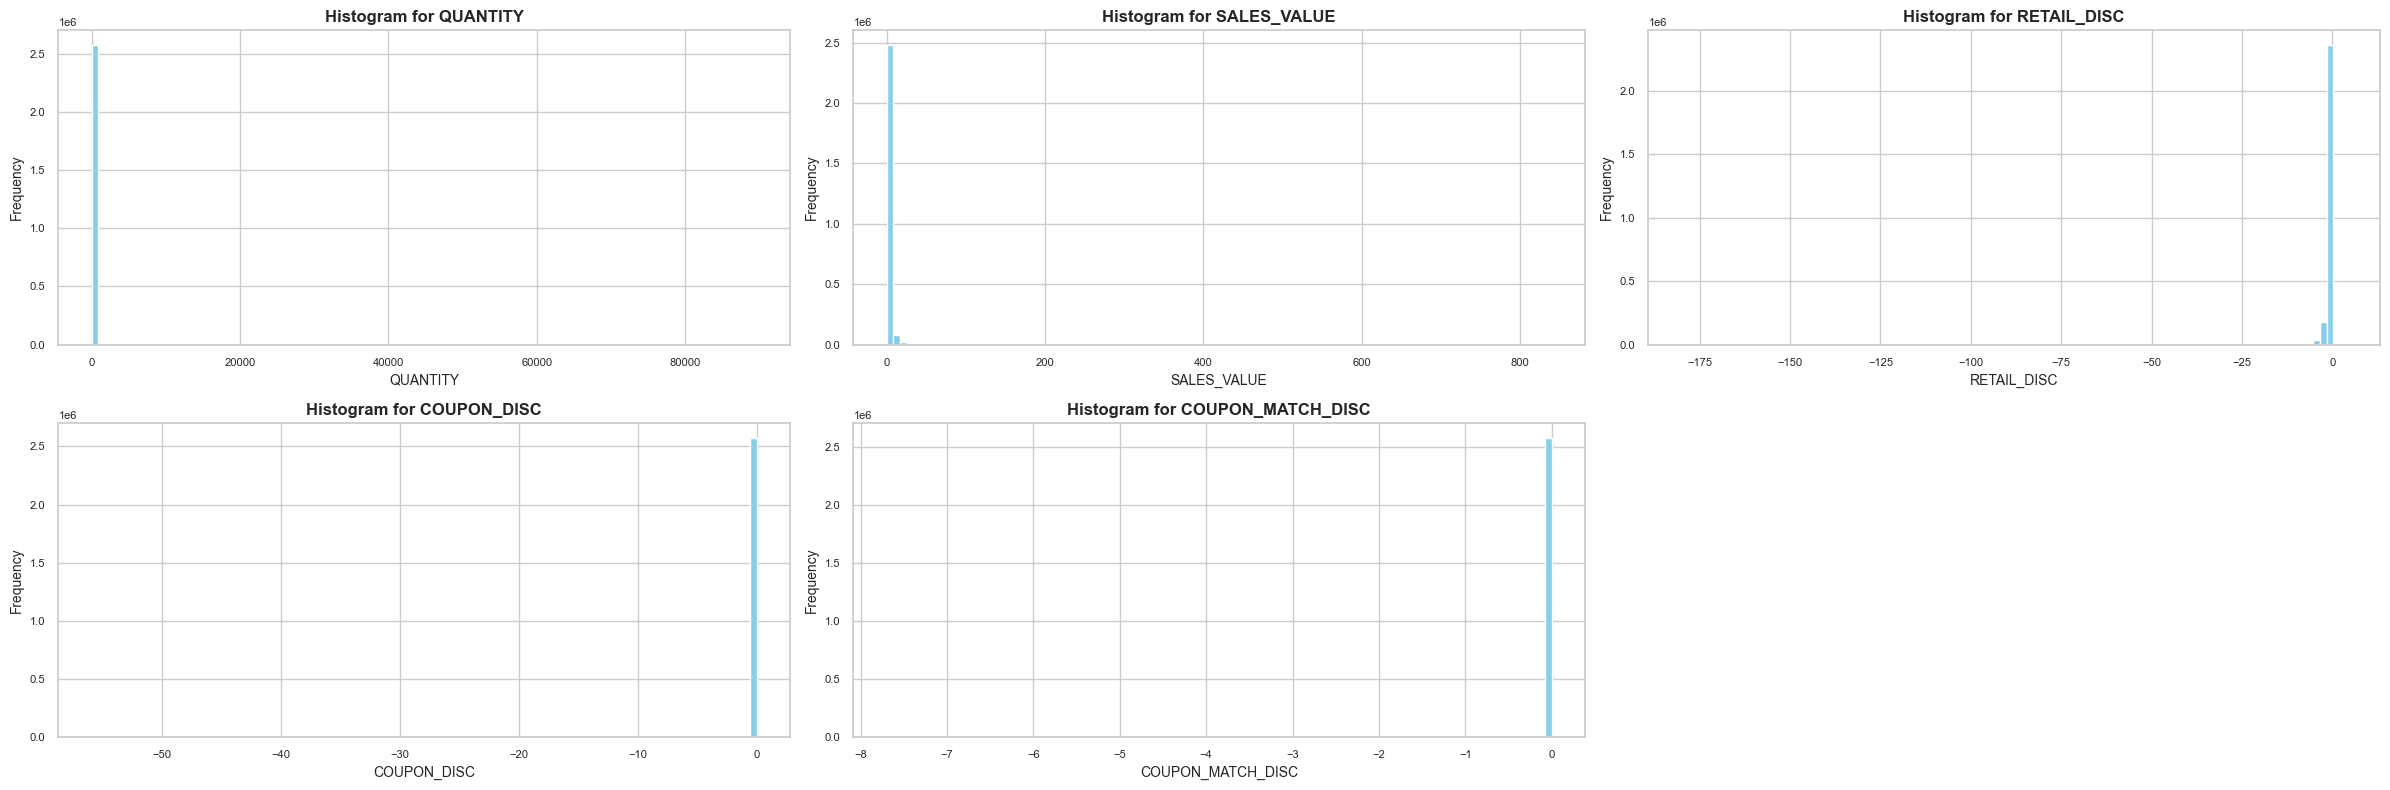

In [ ]:
drop_cols = ["household_key", "BASKET_ID", "STORE_ID", "PRODUCT_ID", "WEEK_NO", "DAY", "TRANS_TIME"]
cols = [col for col in transaction_data.columns if col not in drop_cols]

# Plot settings
num_cols = len(cols)
cols_per_row = 3
num_rows = (num_cols + cols_per_row - 1) // cols_per_row

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(8 * cols_per_row, 4 * num_rows))
axes = axes.flatten()

for i, col in enumerate(cols):
    data = transaction_data[col].dropna()

    if pd.api.types.is_numeric_dtype(data):
        # Numeric data: Histogram
        axes[i].hist(data.values, bins=100, color="skyblue")
        axes[i].set_title(f'Histogram for {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
    else:
        # Categorical data: Bar plot
        data.value_counts().sort_index().plot(kind='bar', color="skyblue")
        axes[i].set_title(f'Bar Chart for {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')

# Hide any extra subplots if fewer columns than subplot “slots”
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

All variables contain extreme outliers, so a more thorough breakdown was necessary:

In [ ]:
drop_cols = ["household_key", "BASKET_ID", "STORE_ID", "PRODUCT_ID", "DAY", "TRANS_TIME", "WEEK_NO"]
cols = [col for col in transaction_data.columns if col not in drop_cols]

# Function to calculate range, 5th-95th percentile range for each column in cols
def calculate_summary_stats(df, cols):
    summary = []

    for col in cols:
        if col in df.columns:
            data = df[col].dropna()
            if data.empty:
                continue

            min_val = data.min()
            max_val = data.max()
            p5 = data.quantile(0.05)  # 5th percentile
            p95 = data.quantile(0.95)  # 95th percentile

            summary.append({
                "Column": col,
                "Min": round(min_val, 2),
                "Max": round(max_val, 2),
                "5th Percentile": round(p5, 2),
                "95th Percentile": round(p95, 2)
            })

    return pd.DataFrame(summary)

summary_stats_df = calculate_summary_stats(transaction_data, cols)
pd.options.display.float_format = '{:,.2f}'.format
display(summary_stats_df)

Column     Min       Max  5th Percentile  95th Percentile
0           QUANTITY    0.00 89,638.00            1.00             3.00
1        SALES_VALUE    0.00    840.00            0.59             7.99
2        RETAIL_DISC -180.00      3.99           -2.19             0.00
3        COUPON_DISC  -55.93      0.00            0.00             0.00
4  COUPON_MATCH_DISC   -7.70      0.00            0.00             0.00

The values for `QUANTITY` range from **0.00** to **89,638.00**, but 90% of the data falls within **1.00** to **3.00**.

The values for `SALES_VALUE` range from **0.00** to **840.00**, but 90% of the data falls within **0.59** to **7.99**.

The values for `RETAIL_DISC` range from **-180.00** to **3.99**, but 90% of the data falls within **-2.19** to **0.00**.

The values for `COUPON_DISC` range from **-55.93** to **0.00**, but 90% of the data falls within **0.00** to **0.00**.

The values for `COUPON_MATCH_DISC` range from **-7.70** to **0.00**, but 90% of the data falls within **0.00** to **0.00**.

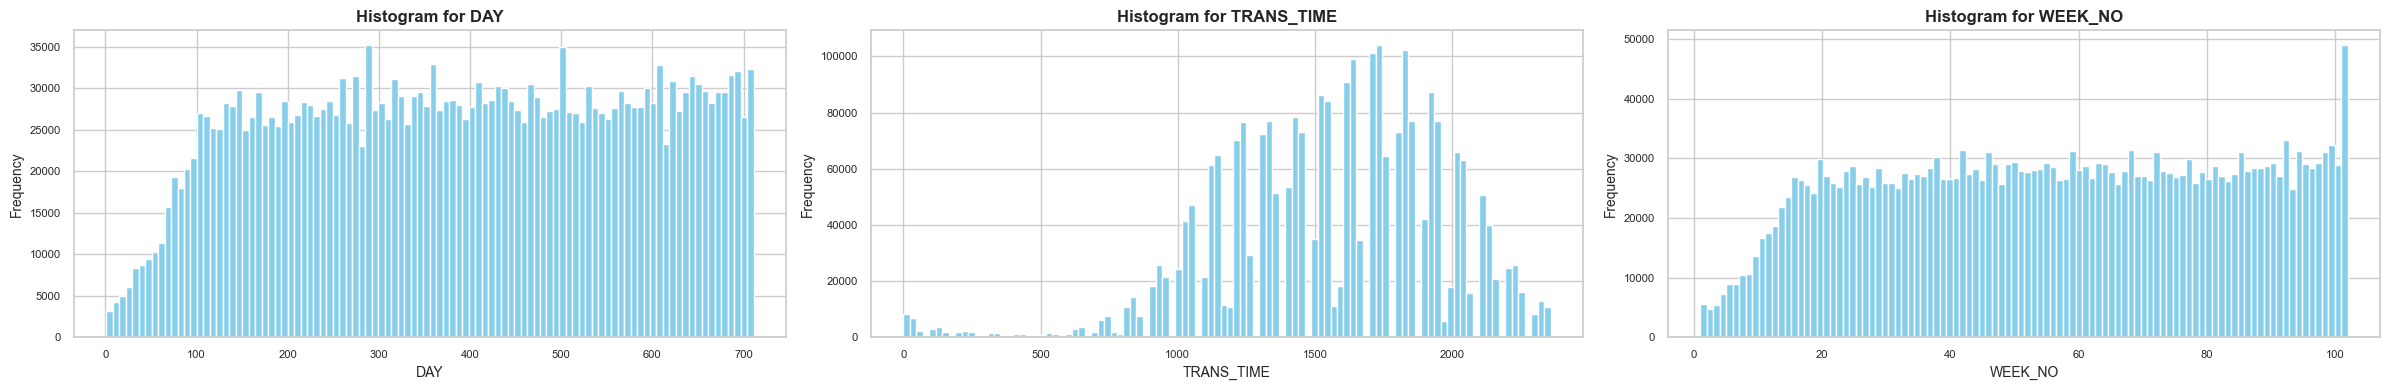

In [ ]:
drop_cols = ["household_key", "BASKET_ID", "STORE_ID", "PRODUCT_ID", "QUANTITY", "SALES_VALUE", "RETAIL_DISC", "COUPON_DISC", "COUPON_MATCH_DISC"]
cols = [col for col in transaction_data.columns if col not in drop_cols]

# Plot settings
num_cols = len(cols)
cols_per_row = 3
num_rows = (num_cols + cols_per_row - 1) // cols_per_row

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(8 * cols_per_row, 4 * num_rows))
axes = axes.flatten()

for i, col in enumerate(cols):
    data = transaction_data[col].dropna()

    if pd.api.types.is_numeric_dtype(data):
        # Numeric data: Histogram
        axes[i].hist(data.values, bins=100, color="skyblue")
        axes[i].set_title(f'Histogram for {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
    else:
        # Categorical data: Bar plot
        data.value_counts().sort_index().plot(kind='bar', color="skyblue")
        axes[i].set_title(f'Bar Chart for {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')

# Hide any extra subplots if fewer columns than subplot “slots”
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

**Insights:**
- `DAY` and `WEEK_NO` show relatively uniform patterns across their ranges (with some spikes), representing consistent shopping activity throughout the time period.
- In contrast, `TRANS_TIME` follows a distinct bell curve centered around mid-day hours (approximately 1000-2000) with peaks during likely lunch and after-work shopping hours, reflecting natural daily shopping patterns that concentrate during business hours rather than being evenly distributed throughout the day.

### Time-sensitive behavior

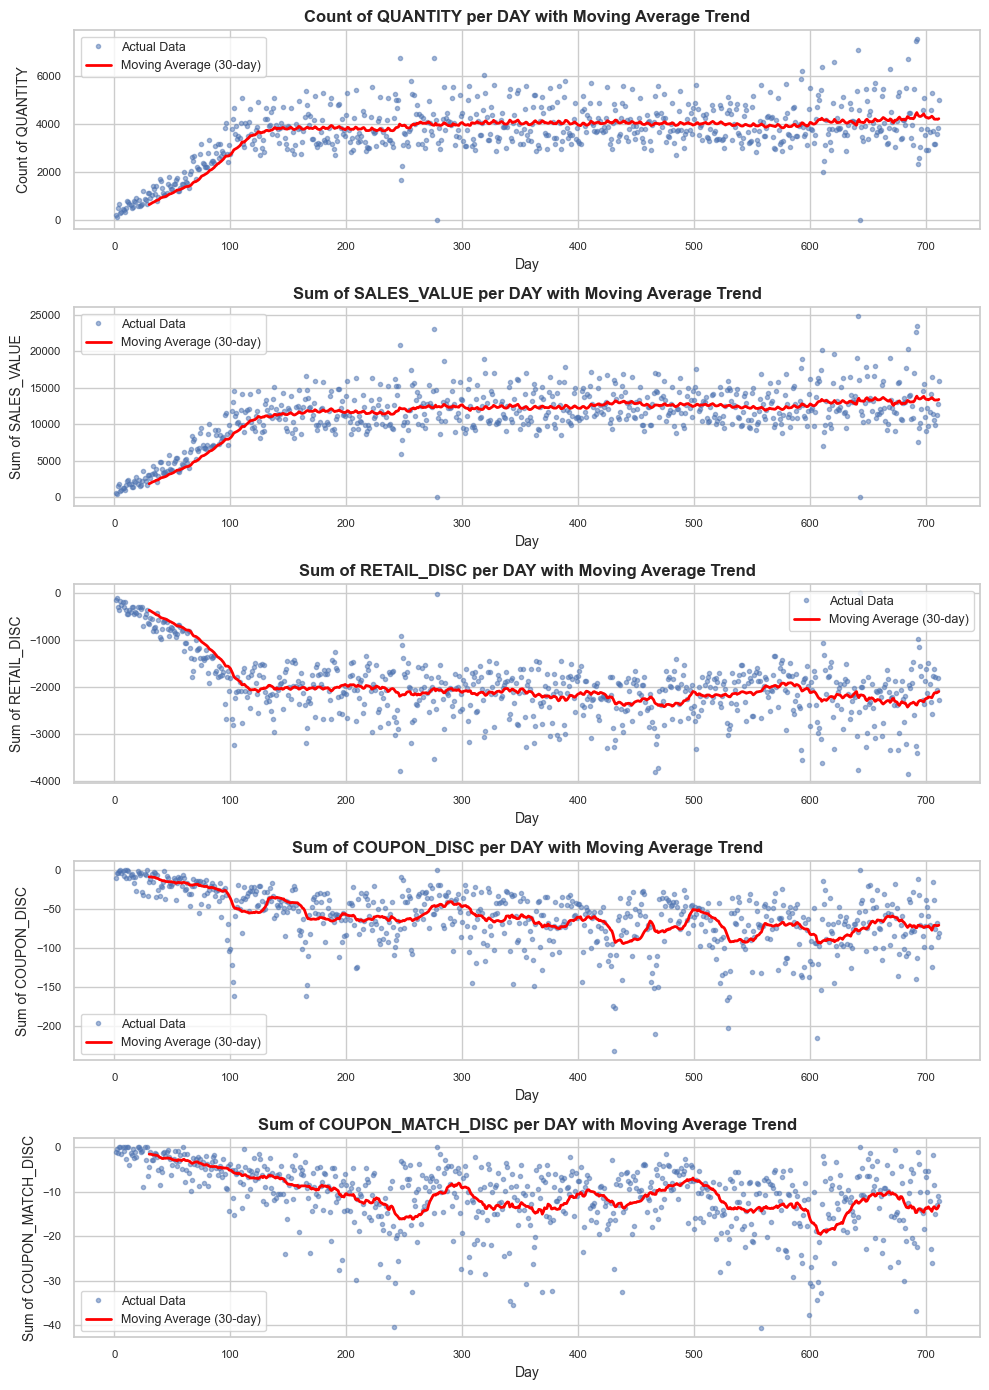

In [ ]:
import matplotlib.pyplot as plt

# 1. Aggregate the data by DAY
quantity_per_day = transaction_data.groupby('DAY')['QUANTITY'].count()
sales_per_day = transaction_data.groupby('DAY')['SALES_VALUE'].sum()
retail_disc_per_day = transaction_data.groupby('DAY')['RETAIL_DISC'].sum()
coupon_disc_per_day = transaction_data.groupby('DAY')['COUPON_DISC'].sum()
coupon_match_disc_per_day = transaction_data.groupby('DAY')['COUPON_MATCH_DISC'].sum()

# 2. Compute 30-day rolling means
quantity_ma = quantity_per_day.rolling(window=30).mean()
sales_ma = sales_per_day.rolling(window=30).mean()
retail_disc_ma = retail_disc_per_day.rolling(window=30).mean()
coupon_disc_ma = coupon_disc_per_day.rolling(window=30).mean()
coupon_match_disc_ma = coupon_match_disc_per_day.rolling(window=30).mean()

# 3. Plot each metric in its own subplot
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 14))
axes = axes.flatten()

# --- QUANTITY ---
axes[0].plot(quantity_per_day.index, quantity_per_day.values, marker='.',
             linestyle='', alpha=0.5, label='Actual Data')
axes[0].plot(quantity_per_day.index, quantity_ma, color='red', linewidth=2,
             label='Moving Average (30-day)')
axes[0].set_title('Count of QUANTITY per DAY with Moving Average Trend')
axes[0].set_xlabel('Day')
axes[0].set_ylabel('Count of QUANTITY')
axes[0].legend()

# --- SALES_VALUE ---
axes[1].plot(sales_per_day.index, sales_per_day.values, marker='.',
             linestyle='', alpha=0.5, label='Actual Data')
axes[1].plot(sales_per_day.index, sales_ma, color='red', linewidth=2,
             label='Moving Average (30-day)')
axes[1].set_title('Sum of SALES_VALUE per DAY with Moving Average Trend')
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Sum of SALES_VALUE')
axes[1].legend()

# --- RETAIL_DISC ---
axes[2].plot(retail_disc_per_day.index, retail_disc_per_day.values, marker='.',
             linestyle='', alpha=0.5, label='Actual Data')
axes[2].plot(retail_disc_per_day.index, retail_disc_ma, color='red', linewidth=2,
             label='Moving Average (30-day)')
axes[2].set_title('Sum of RETAIL_DISC per DAY with Moving Average Trend')
axes[2].set_xlabel('Day')
axes[2].set_ylabel('Sum of RETAIL_DISC')
axes[2].legend()

# --- COUPON_DISC ---
axes[3].plot(coupon_disc_per_day.index, coupon_disc_per_day.values, marker='.',
             linestyle='', alpha=0.5, label='Actual Data')
axes[3].plot(coupon_disc_per_day.index, coupon_disc_ma, color='red', linewidth=2,
             label='Moving Average (30-day)')
axes[3].set_title('Sum of COUPON_DISC per DAY with Moving Average Trend')
axes[3].set_xlabel('Day')
axes[3].set_ylabel('Sum of COUPON_DISC')
axes[3].legend()

# --- COUPON_MATCH_DISC ---
axes[4].plot(coupon_match_disc_per_day.index, coupon_match_disc_per_day.values,
             marker='.', linestyle='', alpha=0.5, label='Actual Data')
axes[4].plot(coupon_match_disc_per_day.index, coupon_match_disc_ma, color='red',
             linewidth=2, label='Moving Average (30-day)')
axes[4].set_title('Sum of COUPON_MATCH_DISC per DAY with Moving Average Trend')
axes[4].set_xlabel('Day')
axes[4].set_ylabel('Sum of COUPON_MATCH_DISC')
axes[4].legend()

plt.tight_layout()
plt.show()


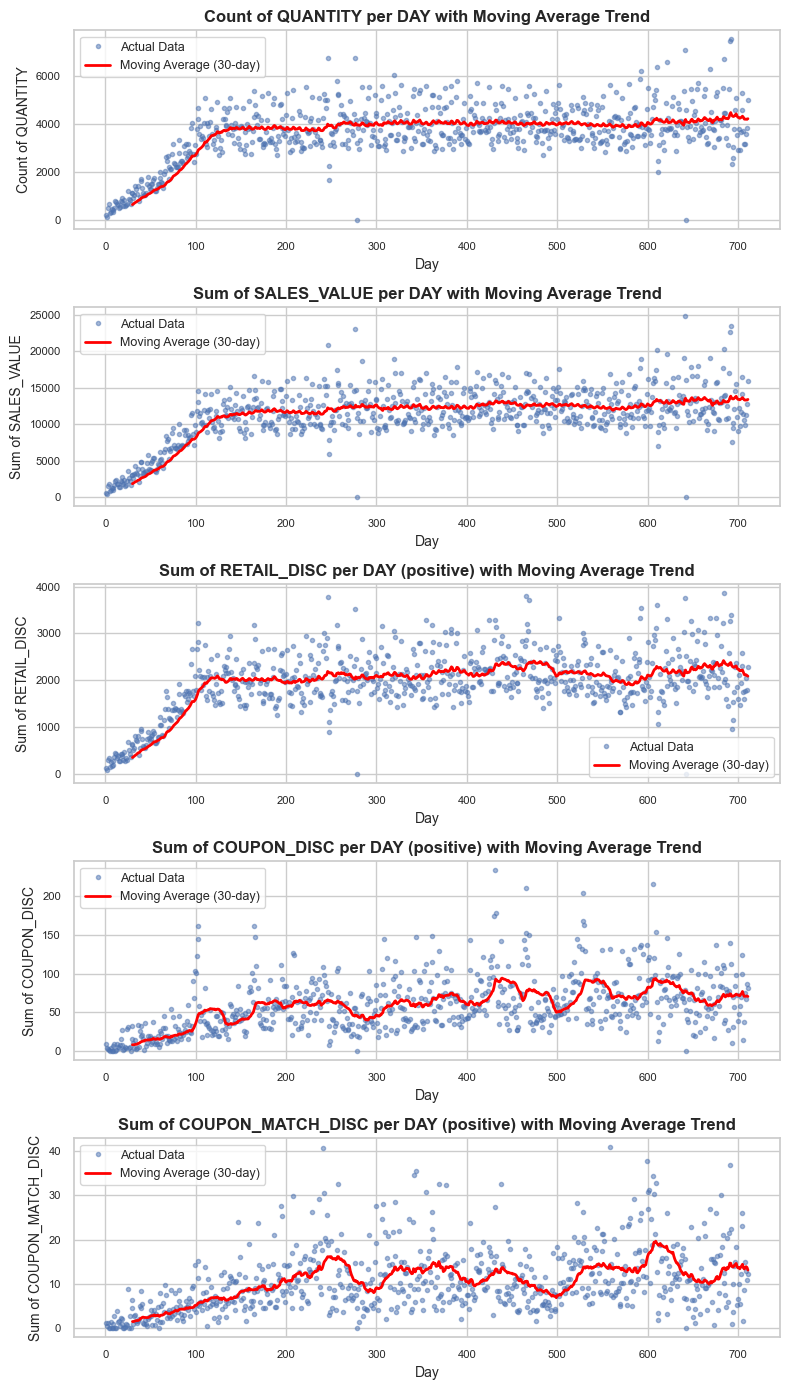

In [ ]:
import matplotlib.pyplot as plt

# 1. Aggregate the data by DAY
quantity_per_day = transaction_data.groupby('DAY')['QUANTITY'].count()
sales_per_day = transaction_data.groupby('DAY')['SALES_VALUE'].sum()

# Convert discount columns to positive (absolute value) so they're easier to interpret as "amount of discount"
retail_disc_per_day = transaction_data.groupby('DAY')['RETAIL_DISC'].sum().abs()
coupon_disc_per_day = transaction_data.groupby('DAY')['COUPON_DISC'].sum().abs()
coupon_match_disc_per_day = transaction_data.groupby('DAY')['COUPON_MATCH_DISC'].sum().abs()

# 2. Compute 30-day rolling means
quantity_ma = quantity_per_day.rolling(window=30).mean()
sales_ma = sales_per_day.rolling(window=30).mean()
retail_disc_ma = retail_disc_per_day.rolling(window=30).mean()
coupon_disc_ma = coupon_disc_per_day.rolling(window=30).mean()
coupon_match_disc_ma = coupon_match_disc_per_day.rolling(window=30).mean()

# 3. Plot each metric in its own subplot
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 14))
axes = axes.flatten()

# --- QUANTITY ---
axes[0].plot(quantity_per_day.index, quantity_per_day.values, marker='.',
             linestyle='', alpha=0.5, label='Actual Data')
axes[0].plot(quantity_per_day.index, quantity_ma, color='red', linewidth=2,
             label='Moving Average (30-day)')
axes[0].set_title('Count of QUANTITY per DAY with Moving Average Trend')
axes[0].set_xlabel('Day')
axes[0].set_ylabel('Count of QUANTITY')
axes[0].legend()

# --- SALES_VALUE ---
axes[1].plot(sales_per_day.index, sales_per_day.values, marker='.',
             linestyle='', alpha=0.5, label='Actual Data')
axes[1].plot(sales_per_day.index, sales_ma, color='red', linewidth=2,
             label='Moving Average (30-day)')
axes[1].set_title('Sum of SALES_VALUE per DAY with Moving Average Trend')
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Sum of SALES_VALUE')
axes[1].legend()

# --- RETAIL_DISC (positive) ---
axes[2].plot(retail_disc_per_day.index, retail_disc_per_day.values, marker='.',
             linestyle='', alpha=0.5, label='Actual Data')
axes[2].plot(retail_disc_per_day.index, retail_disc_ma, color='red', linewidth=2,
             label='Moving Average (30-day)')
axes[2].set_title('Sum of RETAIL_DISC per DAY (positive) with Moving Average Trend')
axes[2].set_xlabel('Day')
axes[2].set_ylabel('Sum of RETAIL_DISC')
axes[2].legend()

# --- COUPON_DISC (positive) ---
axes[3].plot(coupon_disc_per_day.index, coupon_disc_per_day.values, marker='.',
             linestyle='', alpha=0.5, label='Actual Data')
axes[3].plot(coupon_disc_per_day.index, coupon_disc_ma, color='red', linewidth=2,
             label='Moving Average (30-day)')
axes[3].set_title('Sum of COUPON_DISC per DAY (positive) with Moving Average Trend')
axes[3].set_xlabel('Day')
axes[3].set_ylabel('Sum of COUPON_DISC')
axes[3].legend()

# --- COUPON_MATCH_DISC (positive) ---
axes[4].plot(coupon_match_disc_per_day.index, coupon_match_disc_per_day.values,
             marker='.', linestyle='', alpha=0.5, label='Actual Data')
axes[4].plot(coupon_match_disc_per_day.index, coupon_match_disc_ma, color='red',
             linewidth=2, label='Moving Average (30-day)')
axes[4].set_title('Sum of COUPON_MATCH_DISC per DAY (positive) with Moving Average Trend')
axes[4].set_xlabel('Day')
axes[4].set_ylabel('Sum of COUPON_MATCH_DISC')
axes[4].legend()

plt.tight_layout()
plt.show()


**Notes:** For interpretability, we converted discounts to positive. A positive discount of 50, for instance, indicates that in total, households gained $50 in discounts.

**Insights:**
- From these plots, we observe a steady upward trend in both daily purchase quantity and total sales, with short-term fluctuations smoothed by the 30-day moving average.
- Retail discounts are clearly more common than discounts via coupons and "matched" coupons
- Visually, RETAIL_DISC appears to correlate strongly with SALES_VALUE and QUANTITY, though we cannot infer a causal relationship from these plots alone. Converting discount values to positive helps highlight the magnitude of savings customers receive, underscoring the growing impact of store and coupon-based promotions over the observed period.


### Scatter Matrix and Correlation

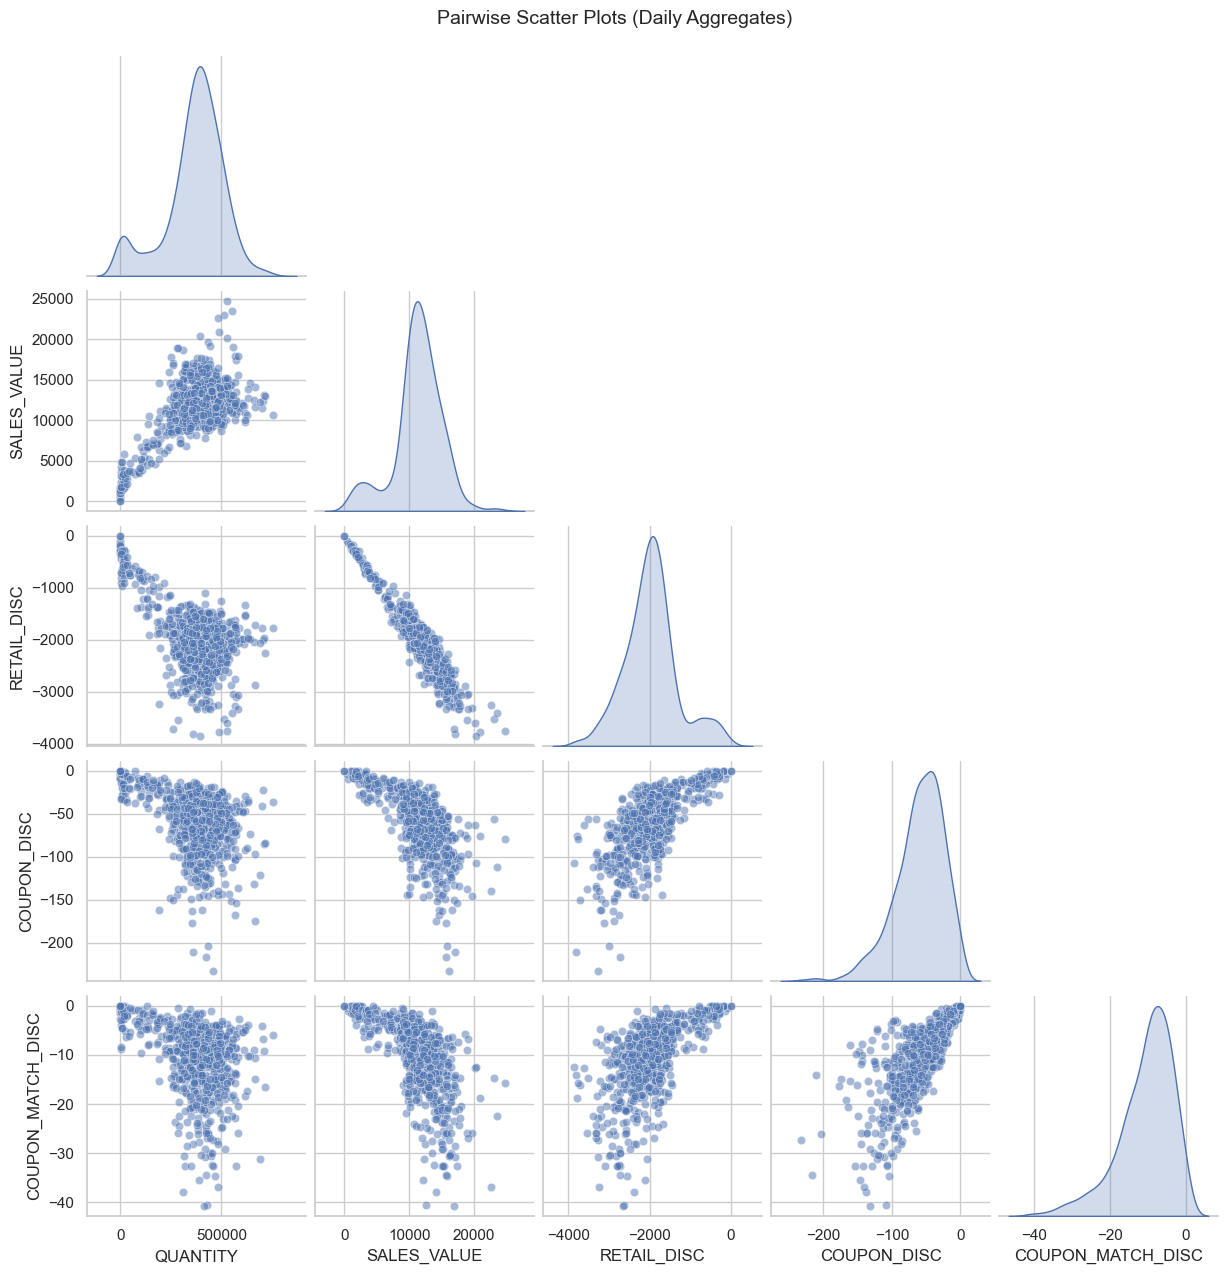

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Aggregate the data by DAY (using sum for QUANTITY instead of count)
quantity_per_day = transaction_data.groupby('DAY')['QUANTITY'].sum()
sales_per_day = transaction_data.groupby('DAY')['SALES_VALUE'].sum()
retail_disc_per_day = transaction_data.groupby('DAY')['RETAIL_DISC'].sum()
coupon_disc_per_day = transaction_data.groupby('DAY')['COUPON_DISC'].sum()
coupon_match_disc_per_day = transaction_data.groupby('DAY')['COUPON_MATCH_DISC'].sum()

# 2. Combine into a single DataFrame
df = pd.DataFrame({
    'QUANTITY': quantity_per_day,
    'SALES_VALUE': sales_per_day,
    'RETAIL_DISC': retail_disc_per_day,
    'COUPON_DISC': coupon_disc_per_day,
    'COUPON_MATCH_DISC': coupon_match_disc_per_day
})

# -- Optional: If you want to make discounts positive for visualization, uncomment:
# df[['RETAIL_DISC','COUPON_DISC','COUPON_MATCH_DISC']] *= -1

# 3. Create pairwise scatter plots
sns.set(style='whitegrid')
pair_plot = sns.pairplot(
    df,
    diag_kind='kde',      # Kernel density estimate on the diagonal
    corner=True,          # Only show the lower triangle
    plot_kws={'alpha': 0.5}  # Slight transparency for overlapping points
)

# 4. Add a main title above the entire figure
pair_plot.fig.suptitle('Pairwise Scatter Plots (Daily Aggregates)', y=1.02, fontsize=14)

plt.show()


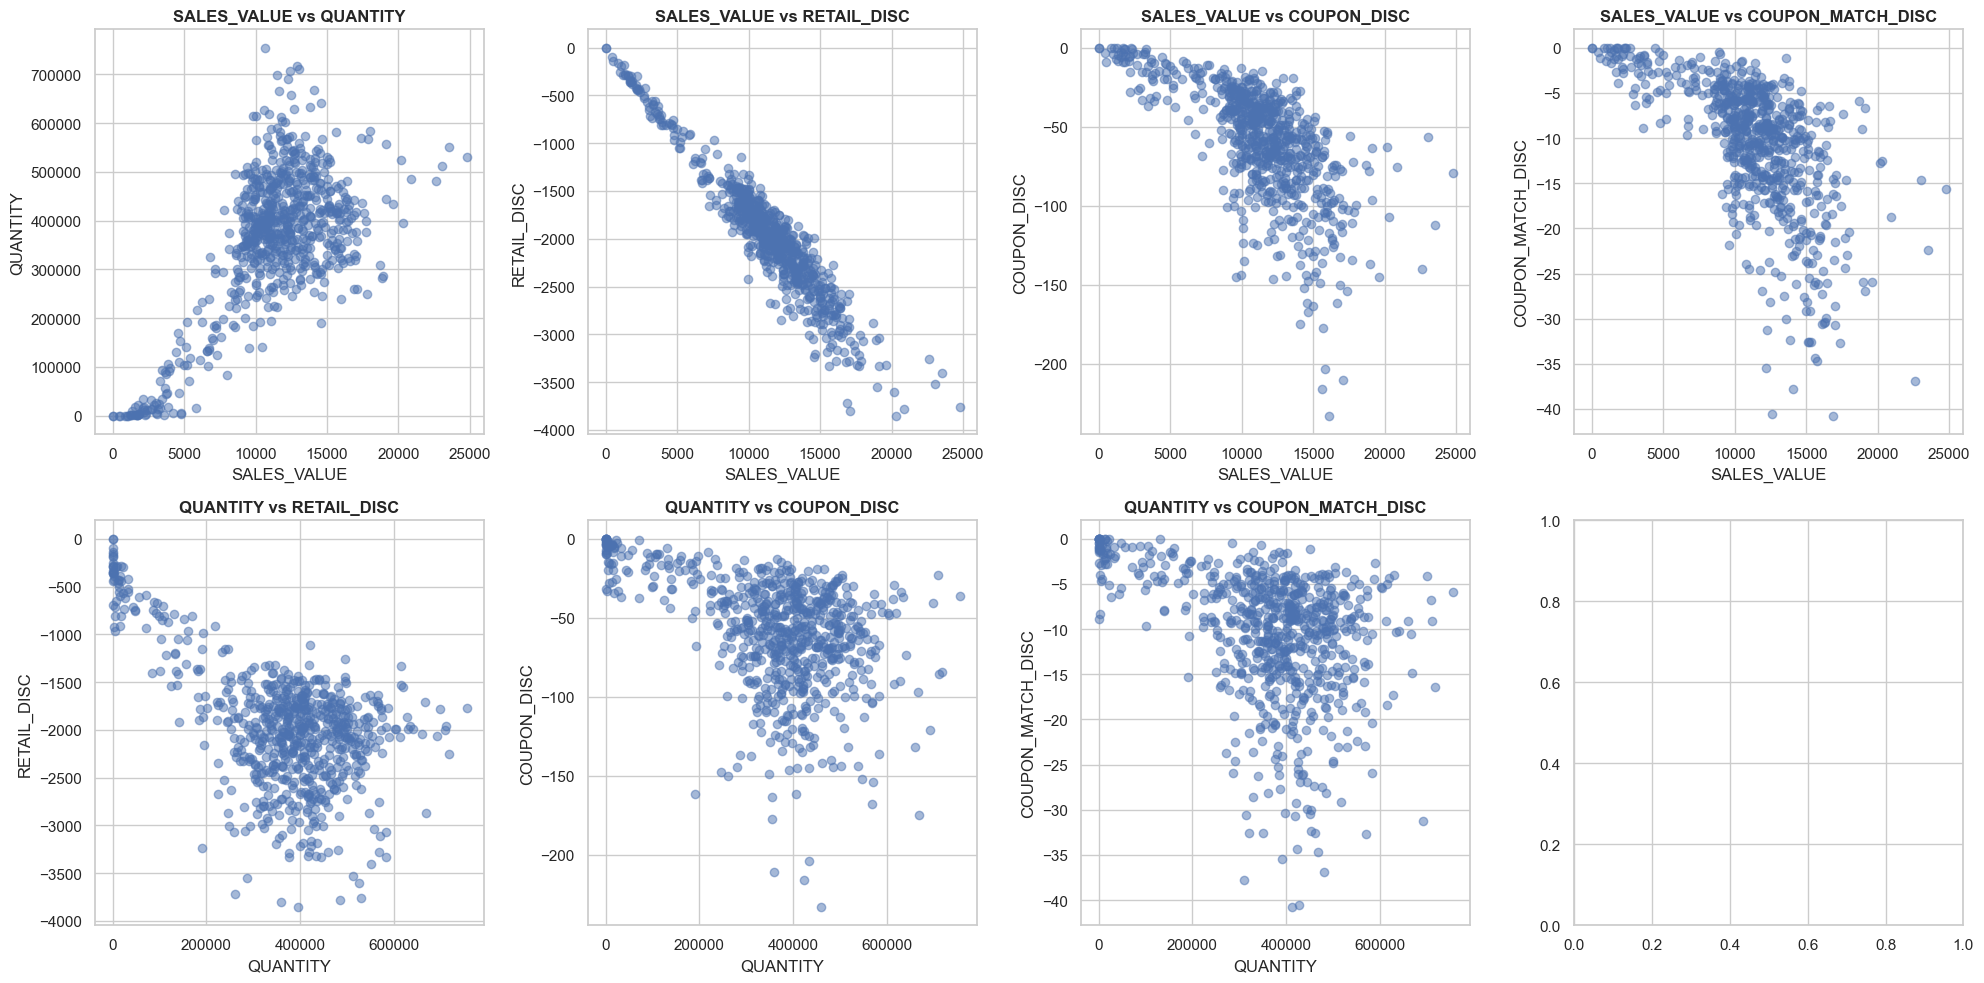

In [ ]:
df_daily = transaction_data.groupby('DAY').agg({
    'QUANTITY': 'sum',
    'SALES_VALUE': 'sum',
    'RETAIL_DISC': 'sum',
    'COUPON_DISC': 'sum',
    'COUPON_MATCH_DISC': 'sum'
}).reset_index()

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = axes.flatten()

# --- SALES_VALUE vs QUANTITY ---
axes[0].scatter(df_daily['SALES_VALUE'], df_daily['QUANTITY'], alpha=0.5)
axes[0].set_xlabel('SALES_VALUE')
axes[0].set_ylabel('QUANTITY')
axes[0].set_title('SALES_VALUE vs QUANTITY')

# --- SALES_VALUE vs RETAIL_DISC ---
axes[1].scatter(df_daily['SALES_VALUE'], df_daily['RETAIL_DISC'], alpha=0.5)
axes[1].set_xlabel('SALES_VALUE')
axes[1].set_ylabel('RETAIL_DISC')
axes[1].set_title('SALES_VALUE vs RETAIL_DISC')

# --- SALES_VALUE vs COUPON_DISC ---
axes[2].scatter(df_daily['SALES_VALUE'], df_daily['COUPON_DISC'], alpha=0.5)
axes[2].set_xlabel('SALES_VALUE')
axes[2].set_ylabel('COUPON_DISC')
axes[2].set_title('SALES_VALUE vs COUPON_DISC')

# --- SALES_VALUE vs COUPON_MATCH_DISC ---
axes[3].scatter(df_daily['SALES_VALUE'], df_daily['COUPON_MATCH_DISC'], alpha=0.5)
axes[3].set_xlabel('SALES_VALUE')
axes[3].set_ylabel('COUPON_MATCH_DISC')
axes[3].set_title('SALES_VALUE vs COUPON_MATCH_DISC')

# --- QUANTITY vs RETAIL_DISC ---
axes[4].scatter(df_daily['QUANTITY'], df_daily['RETAIL_DISC'], alpha=0.5)
axes[4].set_xlabel('QUANTITY')
axes[4].set_ylabel('RETAIL_DISC')
axes[4].set_title('QUANTITY vs RETAIL_DISC')

# --- QUANTITY vs COUPON_DISC ---
axes[5].scatter(df_daily['QUANTITY'], df_daily['COUPON_DISC'], alpha=0.5)
axes[5].set_xlabel('QUANTITY')
axes[5].set_ylabel('COUPON_DISC')
axes[5].set_title('QUANTITY vs COUPON_DISC')

# --- QUANTITY vs COUPON_MATCH_DISC ---
axes[6].scatter(df_daily['QUANTITY'], df_daily['COUPON_MATCH_DISC'], alpha=0.5)
axes[6].set_xlabel('QUANTITY')
axes[6].set_ylabel('COUPON_MATCH_DISC')
axes[6].set_title('QUANTITY vs COUPON_MATCH_DISC')

plt.tight_layout()
plt.show()


**Insights:**
- From the scatter plots, there is a clear positive relationship between SALES_VALUE and QUANTITY, meaning larger purchases (in quantity) generally lead to higher sales values.
- In contrast, the discounts (RETAIL_DISC, COUPON_DISC, and COUPON_MATCH_DISC) show a negative correlation with both SALES_VALUE and QUANTITY, suggesting that when discounts are larger (more negative values), customers tend to buy more or spend more—though we cannot infer causality from these plots alone.

<Axes: >

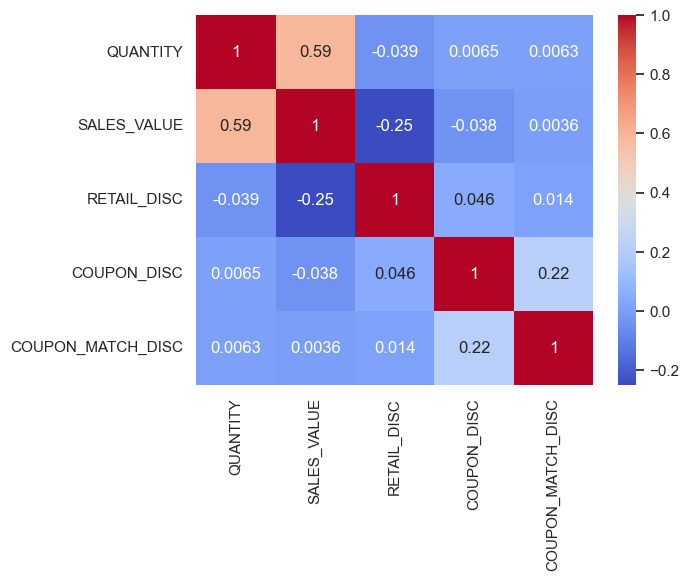

In [ ]:
corr_transaction = transaction_data[['QUANTITY', 'SALES_VALUE', 'RETAIL_DISC', 'COUPON_DISC', 'COUPON_MATCH_DISC']].corr()
sns.heatmap(corr_transaction, annot=True, cmap='coolwarm')

**Insights:**
- The correlation matrix shows a strong positive relationship (0.59) between quantity and sales value, a moderate negative relationship (-0.25) between retail discount and sales value, and a weak positive relationship (0.22) between coupon discount and coupon match discount, while all other variable pairs exhibit minimal correlation.
- Since retail discount is stored as a negative value, the negative correlation with sales value (-0.25) actually indicates that larger discounts (more negative values) are associated with higher sales values, suggesting that price reductions effectively drive revenue through increased purchase volume.

---
## Exploratory Data Analysis (EDA) of Demographics Dataset

### Dataset Information:
- **Rows:** 801
- **Columns:** 8

### Variable Distribution:

| Variable               | Description                                           | Unique Values |
|------------------------|-------------------------------------------------------|----------------------|
| `AGE_DESC`            | Estimated age range                                   | 6 unique values     |
| `INCOME_DESC`         | Household income range                                | 12 unique values    |
| `HOMEOWNER_DESC`      | Homeowner status                                      | 3 unique (Homeowner, Renter, Unknown) |
| `MARITAL_STATUS_CODE` | Marital status                                        | 3 unique (Married, Single, Unknown) |
| `HOUSEHOLD_SIZE_DESC` | Size of household (up to 5+)                          | 5 unique values     |
| `HH_COMP_DESC`        | Household composition description                     | 6 unique values     |
| `KID_CATEGORY_DESC`   | Number of children present (up to 3+)                 | 4 unique values     |
| `household_key`       | Uniquely identifies each household                    | 801 unique values   |

**Notes:**
- All variables except `household_key` are categorical
- One row per household



In [ ]:
demographics.head()

AGE_DESC MARITAL_STATUS_CODE INCOME_DESC HOMEOWNER_DESC      HH_COMP_DESC  \
0      65+                   A      35-49K      Homeowner  2 Adults No Kids   
1    45-54                   A      50-74K      Homeowner  2 Adults No Kids   
2    25-34                   U      25-34K        Unknown     2 Adults Kids   
3    25-34                   U      75-99K      Homeowner     2 Adults Kids   
4    45-54                   B      50-74K      Homeowner     Single Female   

  HOUSEHOLD_SIZE_DESC KID_CATEGORY_DESC  household_key  
0                   2      None/Unknown              1  
1                   2      None/Unknown              7  
2                   3                 1              8  
3                   4                 2             13  
4                   1      None/Unknown             16

In [ ]:
demographics['INCOME_DESC'].value_counts()

INCOME_DESC
50-74K       192
35-49K       172
75-99K        96
25-34K        77
15-24K        74
Under 15K     61
125-149K      38
100-124K      34
150-174K      30
250K+         11
175-199K      11
200-249K       5
Name: count, dtype: int64

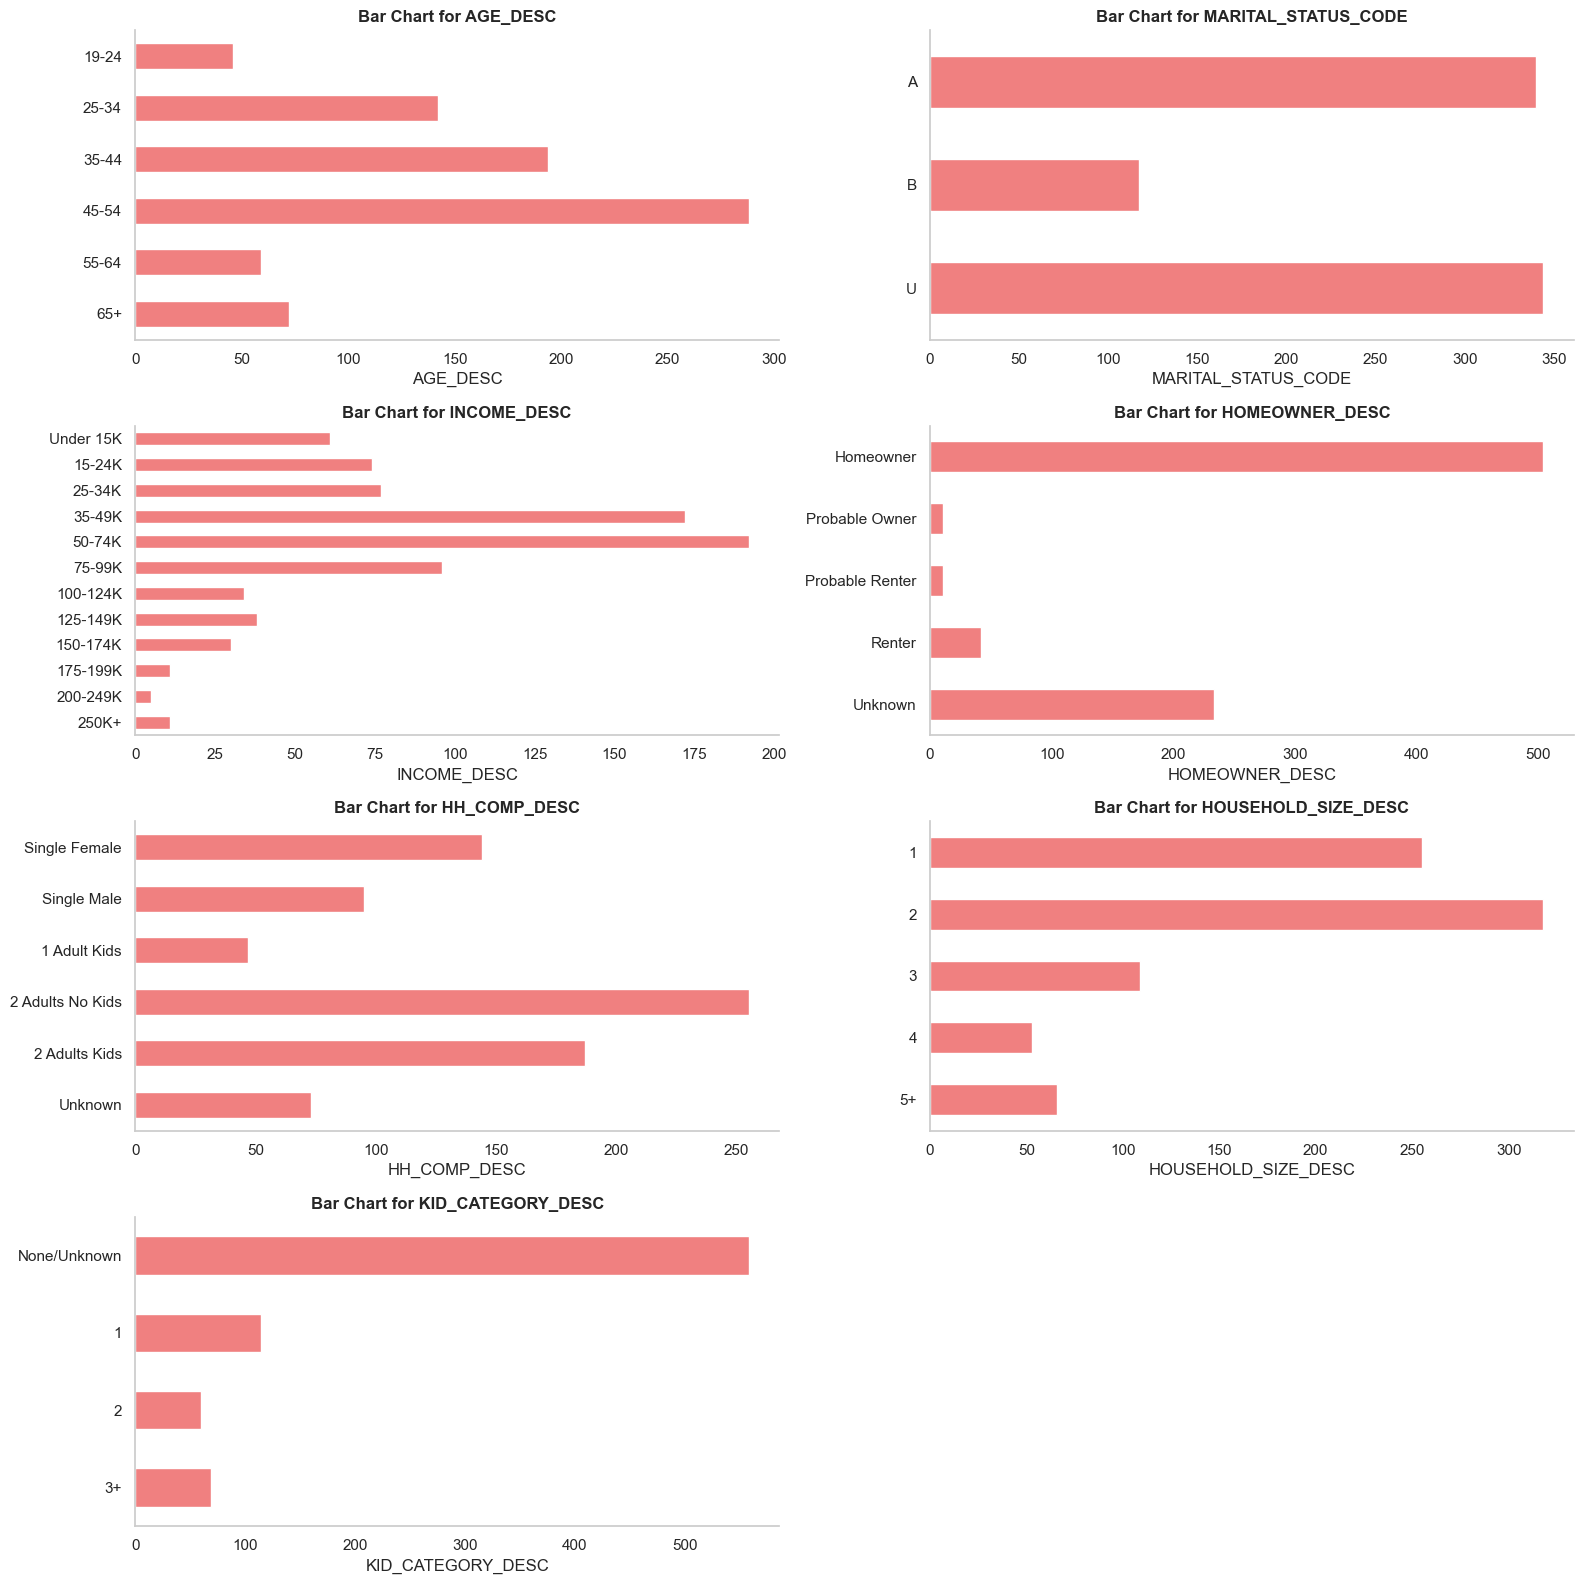

In [ ]:
# Order categories
cat_orders = {
    "AGE_DESC": ['19-24', '25-34', '35-44', '45-54', '55-64', '65+'],
    "INCOME_DESC": ['Under 15K', '15-24K', '25-34K', '35-49K', '50-74K', '75-99K', '100-124K', '125-149K', '150-174K', '175-199K', '200-249K', '250K+'],
    "HH_COMP_DESC": ['Single Female', 'Single Male', '1 Adult Kids', '2 Adults No Kids', '2 Adults Kids', 'Unknown'],
    "HOUSEHOLD_SIZE_DESC": ['1', '2', '3', '4', '5+'],
    "KID_CATEGORY_DESC": ['None/Unknown','1', '2', '3+']
}

# Convert columns to categorical
for col, order in cat_orders.items():
    if col in demographics.columns:
        cat_dtype = pd.CategoricalDtype(categories=order, ordered=True)
        demographics[col] = demographics[col].astype(cat_dtype)

drop_cols = ["household_key"]
cols = [col for col in demographics.columns if col not in drop_cols]

# Plot settings
num_cols = len(cols)
cols_per_row = 2
num_rows = -(-num_cols // cols_per_row)

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(8 * cols_per_row, 4 * num_rows))
axes = axes.flatten()

# Generate graphs
for i, col in enumerate(cols):
    data = demographics[col].dropna()

    # Ensure data isn't empty
    if not data.empty:
        data.value_counts(dropna=True).sort_index(ascending=False).plot(kind='barh', ax=axes[i], color="lightcoral")
        axes[i].set_title(f'Bar Chart for {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('')

# Apply styling to all axes
for ax in axes:
    ax.grid(False)
    ax.set_facecolor("white")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Insights:**
- The dataset appears to primarily represent middle-aged homeowners, with the highest concentration in the 45-54 age bracket and a strong representation of homeowners versus renters.
- Income distribution is bimodal with peaks in the 35-49K and 50-74K ranges, suggesting a middle-class customer base.
- Household composition data shows "2 Adults No Kids" as the dominant household type, followed by "2 Adults Kids" and single-person households. The household size distribution confirms this pattern with 2-person households being most common, followed by 1-person households, while the high number of unknown marital statuses (U) is acceptable as marital status is administrative rather than indicative of purchasing behavior.
- The "None/Unknown" category for KID_CATEGORY_DESC presents an analytical challenge, as it's impossible to differentiate between households that genuinely have no children versus those where the information is simply missing. This ambiguity could impact family-oriented marketing analyses and may require supplementary data or contextual variables to properly interpret.

---

#### Investigating "None/Unknown" patterns in `KID_CATEGORY_DESC`

In [ ]:
unknown_kids_df = demographics[demographics["KID_CATEGORY_DESC"] == "None/Unknown"] # Filter rows where KID_CATEGORY_DESC is "None/Unknown"
hh_comp_distribution = unknown_kids_df["HH_COMP_DESC"].value_counts() # Count occurrences of HH_COMP_DESC values when KID_CATEGORY_DESC is "None/Unknown"

# Display results
print("Distribution of HH_COMP_DESC when KID_CATEGORY_DESC is 'None/Unknown':")
display(hh_comp_distribution)

# Optional: Cross-tabulation for deeper insight
cross_tab = pd.crosstab(demographics["KID_CATEGORY_DESC"], demographics["HH_COMP_DESC"])
print("\nCross-tabulation between KID_CATEGORY_DESC and HH_COMP_DESC:")
display(cross_tab)


Distribution of HH_COMP_DESC when KID_CATEGORY_DESC is 'None/Unknown':


HH_COMP_DESC
2 Adults No Kids    255
Single Female       144
Single Male          95
Unknown              64
1 Adult Kids          0
2 Adults Kids         0
Name: count, dtype: int64


Cross-tabulation between KID_CATEGORY_DESC and HH_COMP_DESC:


HH_COMP_DESC       Single Female  Single Male  1 Adult Kids  2 Adults No Kids  \
KID_CATEGORY_DESC                                                               
None/Unknown                 144           95             0               255   
1                              0            0            20                 0   
2                              0            0            14                 0   
3+                             0            0            13                 0   

HH_COMP_DESC       2 Adults Kids  Unknown  
KID_CATEGORY_DESC                          
None/Unknown                   0       64  
1                             88        6  
2                             46        0  
3+                            53        3

**Result:** While it was only tested with Household Composition Description, it could be quickly concluded that you cannot assume that "None/Unknown" in Kid Category Description represents households without children.

---

**Final Questions:**
- What does "probable" renter or homeowner indicate in `HOMEOWNER_DESC`?
- In `KID_CATEGORY_DESC`, why are "no kids" and "unknown" separate? The presence of unknown limits us from analyzing purchasing behaviors for families with and without children.

---

## Exploring Relationships Between Datasets

In [ ]:
merged_df = transaction_data.merge(demographics, on="household_key", how="inner")
merged_df = merged_df.merge(product, on="PRODUCT_ID", how="left")

### Top 5 Commodities, Sub-Commodities and Departments by Sale and Quantity Sold

In [ ]:
top_5_gasoline = merged_df[merged_df["SUB_COMMODITY_DESC"].str.contains("GASOLINE", case=False)].sort_values(by="QUANTITY", ascending=False).head(5)
print("Top 5 highest QUANTITY gasoline products:")
print(top_5_gasoline[["QUANTITY", "SUB_COMMODITY_DESC"]])


bottom_5_gasoline = merged_df[merged_df["SUB_COMMODITY_DESC"].str.contains("GASOLINE", case=False)].sort_values(by="QUANTITY", ascending=True).head(5)
print("\nTop 5 lowest QUANTITY gasoline products:")
print(bottom_5_gasoline[["QUANTITY", "SUB_COMMODITY_DESC"]])

Top 5 highest QUANTITY gasoline products:
        QUANTITY     SUB_COMMODITY_DESC
949507     89638  GASOLINE-REG UNLEADED
236592     85055  GASOLINE-REG UNLEADED
243721     61335  GASOLINE-REG UNLEADED
78974      51912  GASOLINE-REG UNLEADED
719194     48073  GASOLINE-REG UNLEADED

Top 5 lowest QUANTITY gasoline products:
         QUANTITY     SUB_COMMODITY_DESC
2146            1  GASOLINE-REG UNLEADED
1017482         1  GASOLINE-REG UNLEADED
223105          1  GASOLINE-REG UNLEADED
221329          1  GASOLINE-REG UNLEADED
1022514         1  GASOLINE-REG UNLEADED


It is important to take time and understand the top 5 greatest QUANTITY values for the gasoline sub_commodity. When attempting to plot the total quantity purchased by the top 5 most popular sub-commodities, gasoline dominated the chart. Our first hypothesis was that the quantity units for gasoline could be very different from other products, so when you sum QUANTITY column, you could be adding up quantities that are not comparale across different product categories. However, without a further fundamental understanding of the dataset, there aren't many more conclusions to be taken.

Therefore, we will temporarily remove gasoline from our analysis so we can understand behavior or other sub_commodities.


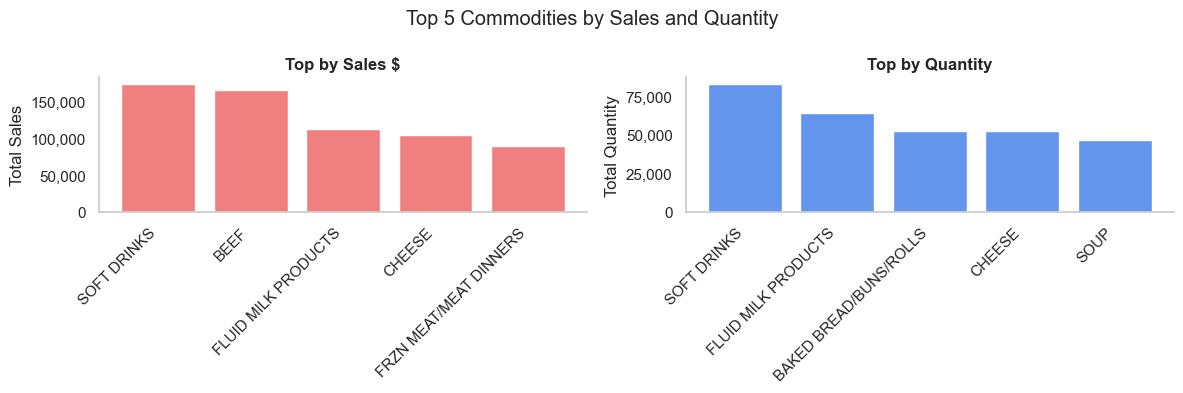

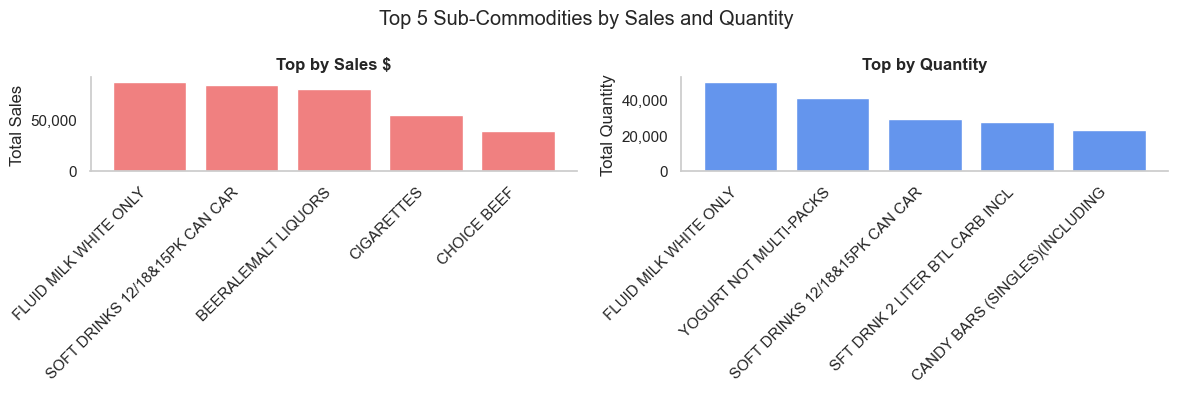

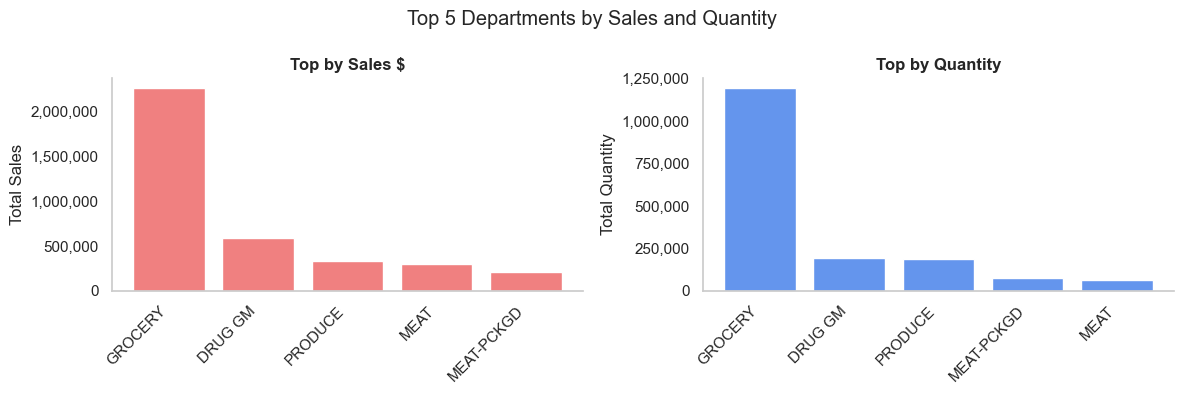

In [ ]:
def create_sales_quantity_chart(df, group_column, title, top_n=5, figsize=(12, 4), exclude_gasoline=True):
    if exclude_gasoline and 'SUB_COMMODITY_DESC' in df.columns:
        df = df[~df['SUB_COMMODITY_DESC'].str.contains('GASOLINE', case=False)]

    # top by sales
    sales_stats = df.groupby(group_column).agg(
        {"SALES_VALUE": "sum"}
    ).sort_values(by="SALES_VALUE", ascending=False)
    top_sales = sales_stats.head(top_n)

    # top by quantity
    quantity_stats = df.groupby(group_column).agg(
        {"QUANTITY": "sum"}
    ).sort_values(by="QUANTITY", ascending=False)
    top_quantity = quantity_stats.head(top_n)

    # remove scientific notation
    pd.options.display.float_format = '{:,.0f}'.format

    # Plot settings
    cols_per_row = 2
    rows = 1
    fig, axes = plt.subplots(rows, cols_per_row, figsize=figsize)

    # sales bar chart
    axes[0].bar(range(len(top_sales)), top_sales["SALES_VALUE"], color="lightcoral")
    axes[0].set_xticks(range(len(top_sales)))
    axes[0].set_xticklabels(top_sales.index, rotation=45, ha="right")
    axes[0].set_title("Top by Sales $")
    axes[0].set_ylabel("Total Sales")

    # quantity bar chart
    axes[1].bar(range(len(top_quantity)), top_quantity["QUANTITY"], color="cornflowerblue")
    axes[1].set_xticks(range(len(top_quantity)))
    axes[1].set_xticklabels(top_quantity.index, rotation=45, ha="right")
    axes[1].set_title("Top by Quantity")
    axes[1].set_ylabel("Total Quantity")

    for ax in axes:
        ax.grid(False)
        ax.set_facecolor("white")
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

    fig.suptitle(title)
    plt.tight_layout()
    return fig

# commodity
fig1 = create_sales_quantity_chart(
    merged_df,
    group_column="COMMODITY_DESC",
    title="Top 5 Commodities by Sales and Quantity"
)
plt.show()

# Sub-Commodity
fig2 = create_sales_quantity_chart(
    merged_df,
    group_column="SUB_COMMODITY_DESC",
    title="Top 5 Sub-Commodities by Sales and Quantity"
)
plt.show()

# department
fig3 = create_sales_quantity_chart(
    merged_df,
    group_column="DEPARTMENT",
    title="Top 5 Departments by Sales and Quantity"
)
plt.show()

**Insights:**

- In **commodities**, soft drinks, beef, and dairy products dominate total sales (high-value commodities), with soft drinks leading both in revenue and volume sold. However, baked goods and soup rank high in quantity but do not generate proportionate revenue, indicating lower unit prices.
- At the **sub-commodit** level, fluid milk (white only) and yogurt multipacks emerge as top-selling dairy items, whereas cigarettes and premium cuts of beef contribute significantly to sales despite lower purchase volume, reflecting higher unit prices.
- Looking at broader **departments**, grocery and drug store goods account for the majority of transactions_data_data, both in sales and quantity, reinforcing their essential nature in consumer spending. Meat and deli products, though appearing lower in quantity, maintain strong sales, suggesting premium pricing and higher-value transactions per unit.

### Average Spending by Demographics

In [ ]:
print(merged_df["MARITAL_STATUS_CODE"].value_counts(dropna=False))


MARITAL_STATUS_CODE
A    641796
U    591981
B    193526
Name: count, dtype: int64


In [ ]:
print(merged_df["MARITAL_STATUS_CODE"].unique())


['B' 'U' 'A']


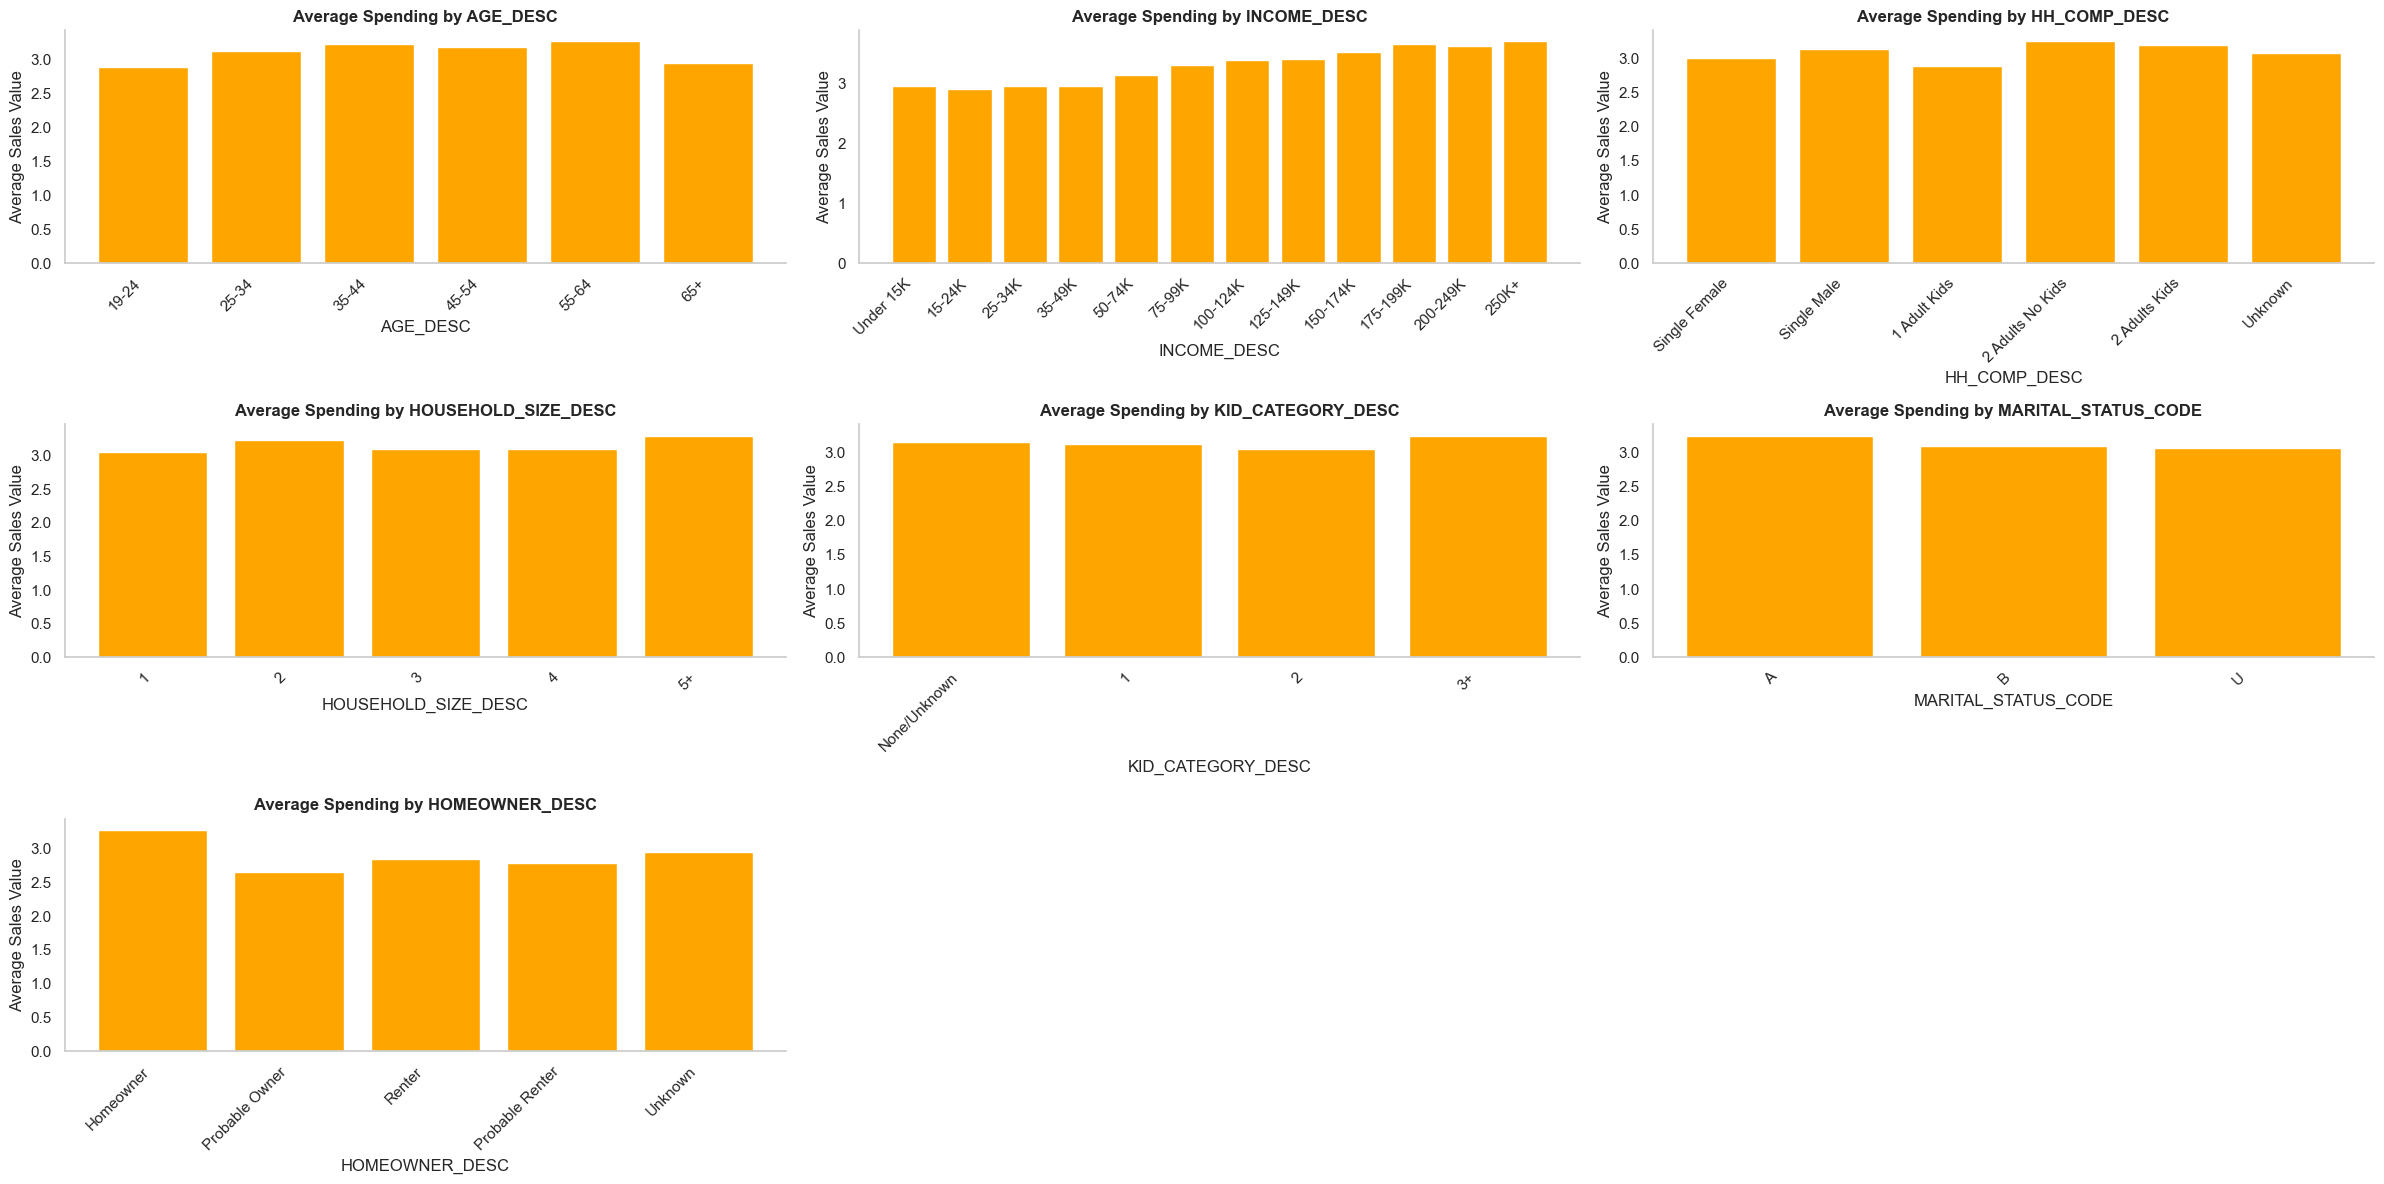

In [ ]:
cat_orders = {
    "AGE_DESC": ['19-24', '25-34', '35-44', '45-54', '55-64', '65+'],
    "INCOME_DESC": ['Under 15K', '15-24K', '25-34K', '35-49K', '50-74K', '75-99K', '100-124K', '125-149K', '150-174K', '175-199K', '200-249K', '250K+'],
    "HH_COMP_DESC": ['Single Female', 'Single Male', '1 Adult Kids', '2 Adults No Kids', '2 Adults Kids', 'Unknown'],
    "HOUSEHOLD_SIZE_DESC": ['1', '2', '3', '4', '5+'],
    "KID_CATEGORY_DESC": ['None/Unknown', '1', '2', '3+'],
    "MARITAL_STATUS_CODE": ['A', 'B', 'U'],
    "HOMEOWNER_DESC": ['Homeowner','Probable Owner', 'Renter', 'Probable Renter', 'Unknown']
}

# Convert columns to categorical for merged_df
for col, order in cat_orders.items():
    if col in merged_df.columns:
        cat_dtype = pd.CategoricalDtype(categories=order, ordered=True)
        merged_df[col] = merged_df[col].astype(cat_dtype)

# Select columns to plot
cols_to_plot = [col for col in cat_orders.keys() if col in merged_df.columns]

# Plot settings
cols_per_row = 3
num_cols = len(cols_to_plot)
num_rows = -(-num_cols // cols_per_row)

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(8 * cols_per_row, 4 * num_rows))

# Ensure axes is always an iterable list
if num_cols == 1:
    axes = [axes]
else:
    axes = axes.flatten()

# Generate bar charts for each demographic category
for i, col in enumerate(cols_to_plot):
    avg_spending = merged_df.groupby(col, observed=True)["SALES_VALUE"].mean()

    # Reindex to enforce category order and drop NaN
    if col in cat_orders:
        avg_spending = avg_spending.reindex(cat_orders[col]).dropna()

    # Plot
    axes[i].bar(avg_spending.index, avg_spending.values, color="orange")
    axes[i].set_title(f"Average Spending by {col}")
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Average Sales Value")

    # Fix UserWarning: Set ticks before labels
    axes[i].set_xticks(range(len(avg_spending.index)))
    axes[i].set_xticklabels(avg_spending.index, rotation=45, ha="right")

    # Style
    axes[i].grid(False)
    axes[i].set_facecolor("white")
    axes[i].spines["top"].set_visible(False)
    axes[i].spines["right"].set_visible(False)

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



**Age vs. Spending:** Spending increases with age, peaking in the 55-64 category, before slightly declining in the 65+ group.

**Income vs. Spending:** Higher-income groups tend to have higher average spending.

**Household Size vs. Spending:** The average spending remains fairly consistent across different household sizes, suggesting that spending behavior is not strongly influenced by the number of people in a household.

**Household Composition vs. Spending:** Single males appear to spend slightly more on average than other household compositions, followed by 2 Adults No Kids households.

**Kids in Household vs. Spending:** Families with one or more children show similar spending patterns. However, families with 3 or more kids show slightly higher spending.

**Marital Status** Families with one or more children show similar spending patterns. However, families with 3 or more kids show slightly higher spending.

**Homeowner Description:** Homeowners spend more than Probable Owners, Renters, Probable Renters and Unknowns

---

## What different demographics are purchasing

#### Commodities: Key Insights
Age
- Younger groups (19–24) consistently pick soft drinks and frozen/refrigerated items.
- Middle-aged groups (25–54) show heavier fluid milk and bread/grains usage.
- Older adults (65+) lean more on bag snacks and fruit commodities (e.g., tropical fruit).

Income
- Lower incomes buy soft drinks most frequently.
- Higher incomes shift toward fluid milk, bag snacks, and cheese, with breads/grains remaining common across all brackets.

Household Composition (HH_COMP_DESC)
- Households with kids prefer fluid milk and bag snacks more than singles or no-kid households.
- Singles often grab more soft drinks and convenience/frozen options.

Household Size
- Smaller households (1–2) favor soft drinks and breads/grains.
- Larger ones (3–5+) purchase more fluid milk, cheese, and bag snacks, reflecting bigger meal/snack demands.

Kid Category
- As the number of kids rises, fluid milk and cheese consumption climbs, with soft drinks still present.
- Bag snacks also grow more prominent in families with multiple kids.

Marital Status
- Soft drinks and fluid milk dominate all groups, but married couples buy more bread/grains, while singles add bag snacks.

Homeowner Status
- Homeowners pick baked breads/buns more frequently, while renters lean toward cheese and bag snacks.
- Soft drinks remain popular across all ownership categories.

#### Sub-Commodities: Key Insights

Household Size
- Fluid milk and bananas appear universally.
- Larger households favor yogurt multi-packs and shredded cheese more, indicating bigger meal-prep or snack needs.

Marital Status
- Fluid milk is a staple for all marital groups; soft drinks appear in each segment.
- Bananas show up consistently, hinting at universal preference for fresh produce.

Homeowner Status
- Fluid milk and bananas stand out across all categories.
- Renters pick soft drinks and yogurt multi-packs more often, while homeowners lean into baked breads/buns.

Age
- Younger consumers choose soft drinks and convenience dairy items; older adults favor bananas.
- Middle-aged groups show fluid milk as a consistent top item.

Income
- Fluid milk remains strong across all incomes.
- Soft drinks trend higher in lower incomes, while bananas appear more often in higher incomes.

Household Composition (HH_COMP_DESC)
- Fluid milk is universal, soft drinks and bananas are common.
- Households with kids often add yogurt multi-packs, suggesting child-friendly snack choices.

Kid Category
- Fluid milk and bananas dominate for any kid count.
- Yogurt multi-packs become more prominent as the number of kids increases, highlighting convenience needs for larger families.


#### SUB-COMMODITY

/var/folders/qf/l8sfrcpd6vq2564v1_qt31fm0000gn/T/ipykernel_19089/4096082062.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_df


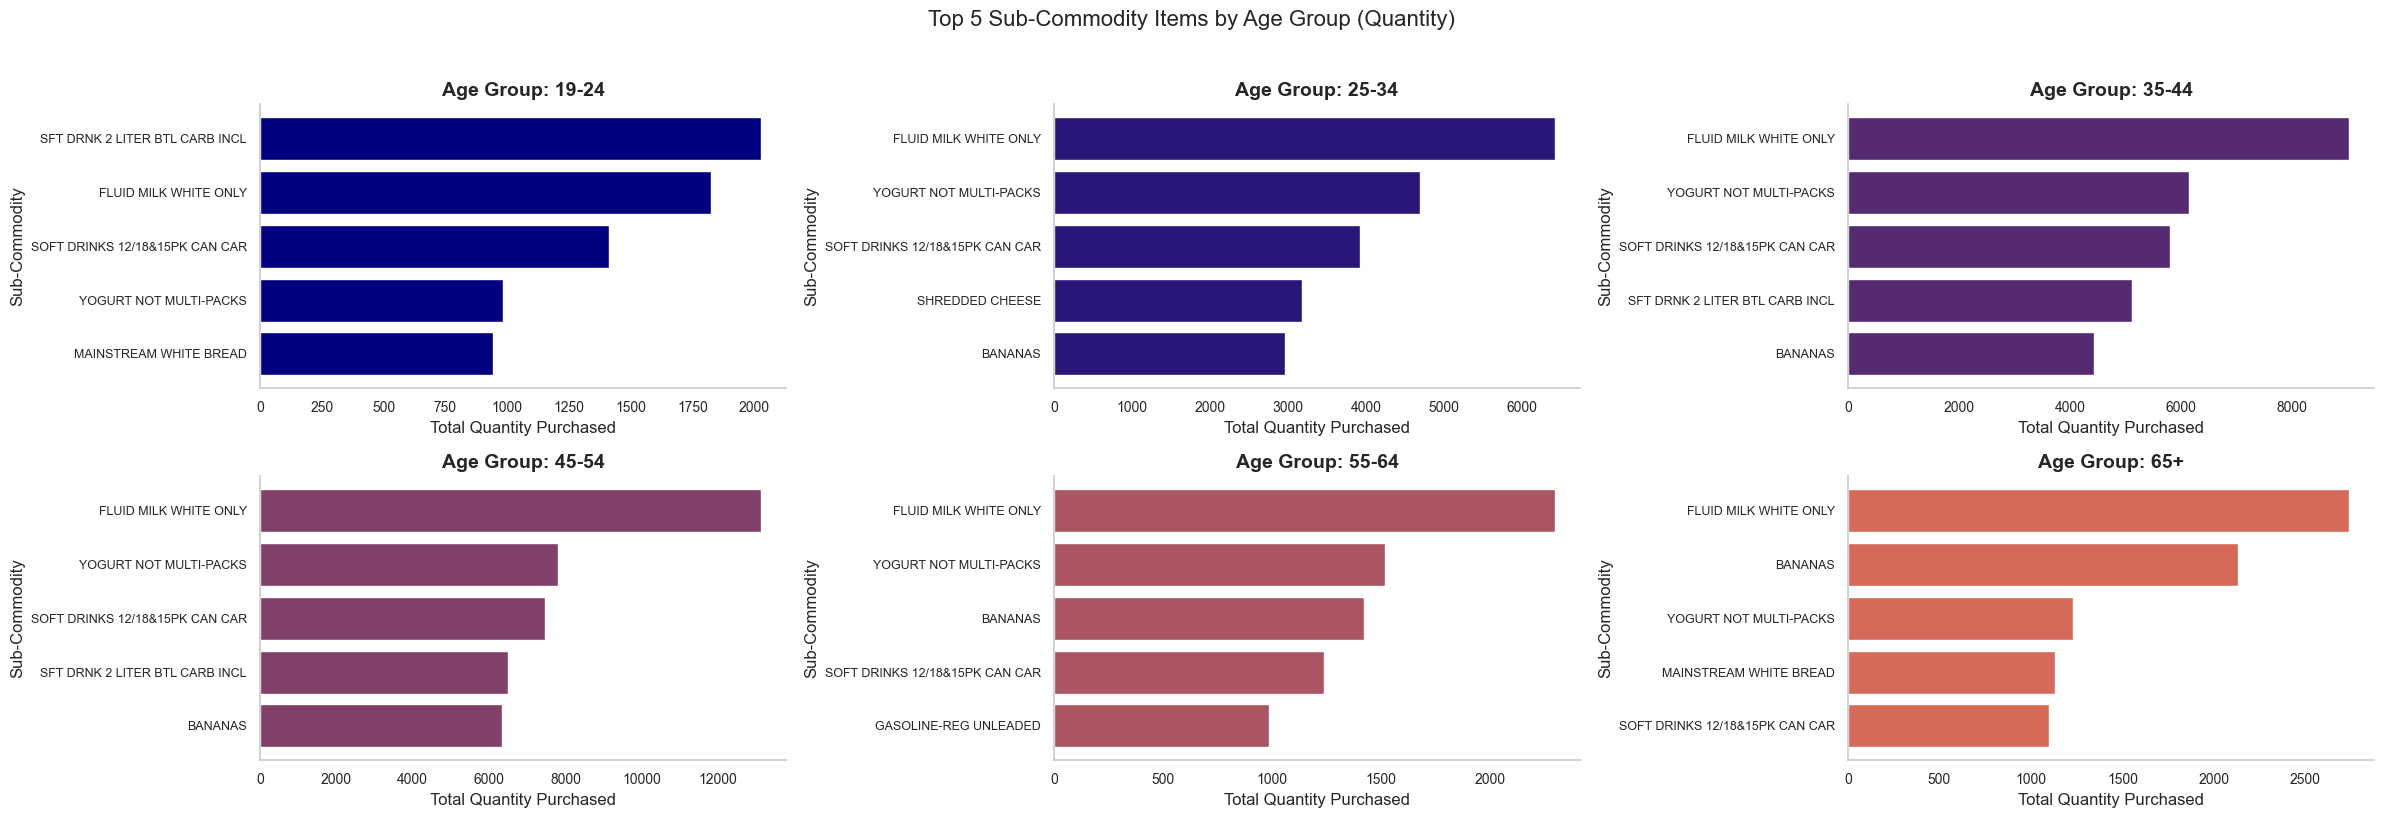

In [ ]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

# 1. Group by Age + Sub-Commodity, using count()
top_by_age = (
    merged_df
    .groupby(['AGE_DESC', 'SUB_COMMODITY_DESC'], observed=True)['QUANTITY']
    .count()
    .reset_index()
    .sort_values(['AGE_DESC', 'QUANTITY'], ascending=[True, False])
    .groupby('AGE_DESC')
    .head(5)  # Take top 5 sub-commodities for each age group
)

# 2. Determine global sub-commodity order (largest overall at top)
sub_commodity_order = (
    top_by_age.groupby('SUB_COMMODITY_DESC')['QUANTITY']
    .sum()
    .reset_index()
    .sort_values(by='QUANTITY', ascending=False)
)['SUB_COMMODITY_DESC'].tolist()

# Convert to categorical for consistent ordering
top_by_age['SUB_COMMODITY_DESC'] = pd.Categorical(
    top_by_age['SUB_COMMODITY_DESC'], categories=sub_commodity_order, ordered=True
)

# 3. Custom color map
custom_cmap = mcolors.LinearSegmentedColormap.from_list("navy_coral", ["navy", "coral"])

# 4. Layout (rows/cols) based on unique Age groups
age_groups = top_by_age['AGE_DESC'].unique()
num_cols = 3  # Number of charts per row
num_rows = -(-len(age_groups) // num_cols)  # Ceiling division

fig, axes = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 4 * num_rows))
axes = axes.flatten()  # Ensure iterable

# 5. Plot each Age group
for i, age in enumerate(age_groups):
    subset = top_by_age[top_by_age['AGE_DESC'] == age].sort_values(by="QUANTITY", ascending=True)

    # Horizontal bar chart
    axes[i].barh(subset['SUB_COMMODITY_DESC'], subset['QUANTITY'], color=custom_cmap(i / len(age_groups)))

    axes[i].set_title(f"Age Group: {age}", fontsize=14)
    axes[i].set_xlabel("Total Quantity Purchased")
    axes[i].set_ylabel("Sub-Commodity")
    axes[i].tick_params(axis='x', labelsize=10)
    axes[i].tick_params(axis='y', labelsize=9)
    axes[i].grid(False)  # remove grid lines
    axes[i].set_facecolor("white")
    axes[i].spines["top"].set_visible(False)
    axes[i].spines["right"].set_visible(False)

# Hide unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Top 5 Sub-Commodity Items by Age Group (Quantity)", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


- fluid milk is common across most age groups (especially 25–64), while soft drinks are more prominent among the youngest group, and bananas appear uniquely for older consumers (65+).

/var/folders/qf/l8sfrcpd6vq2564v1_qt31fm0000gn/T/ipykernel_19089/3180502263.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_df


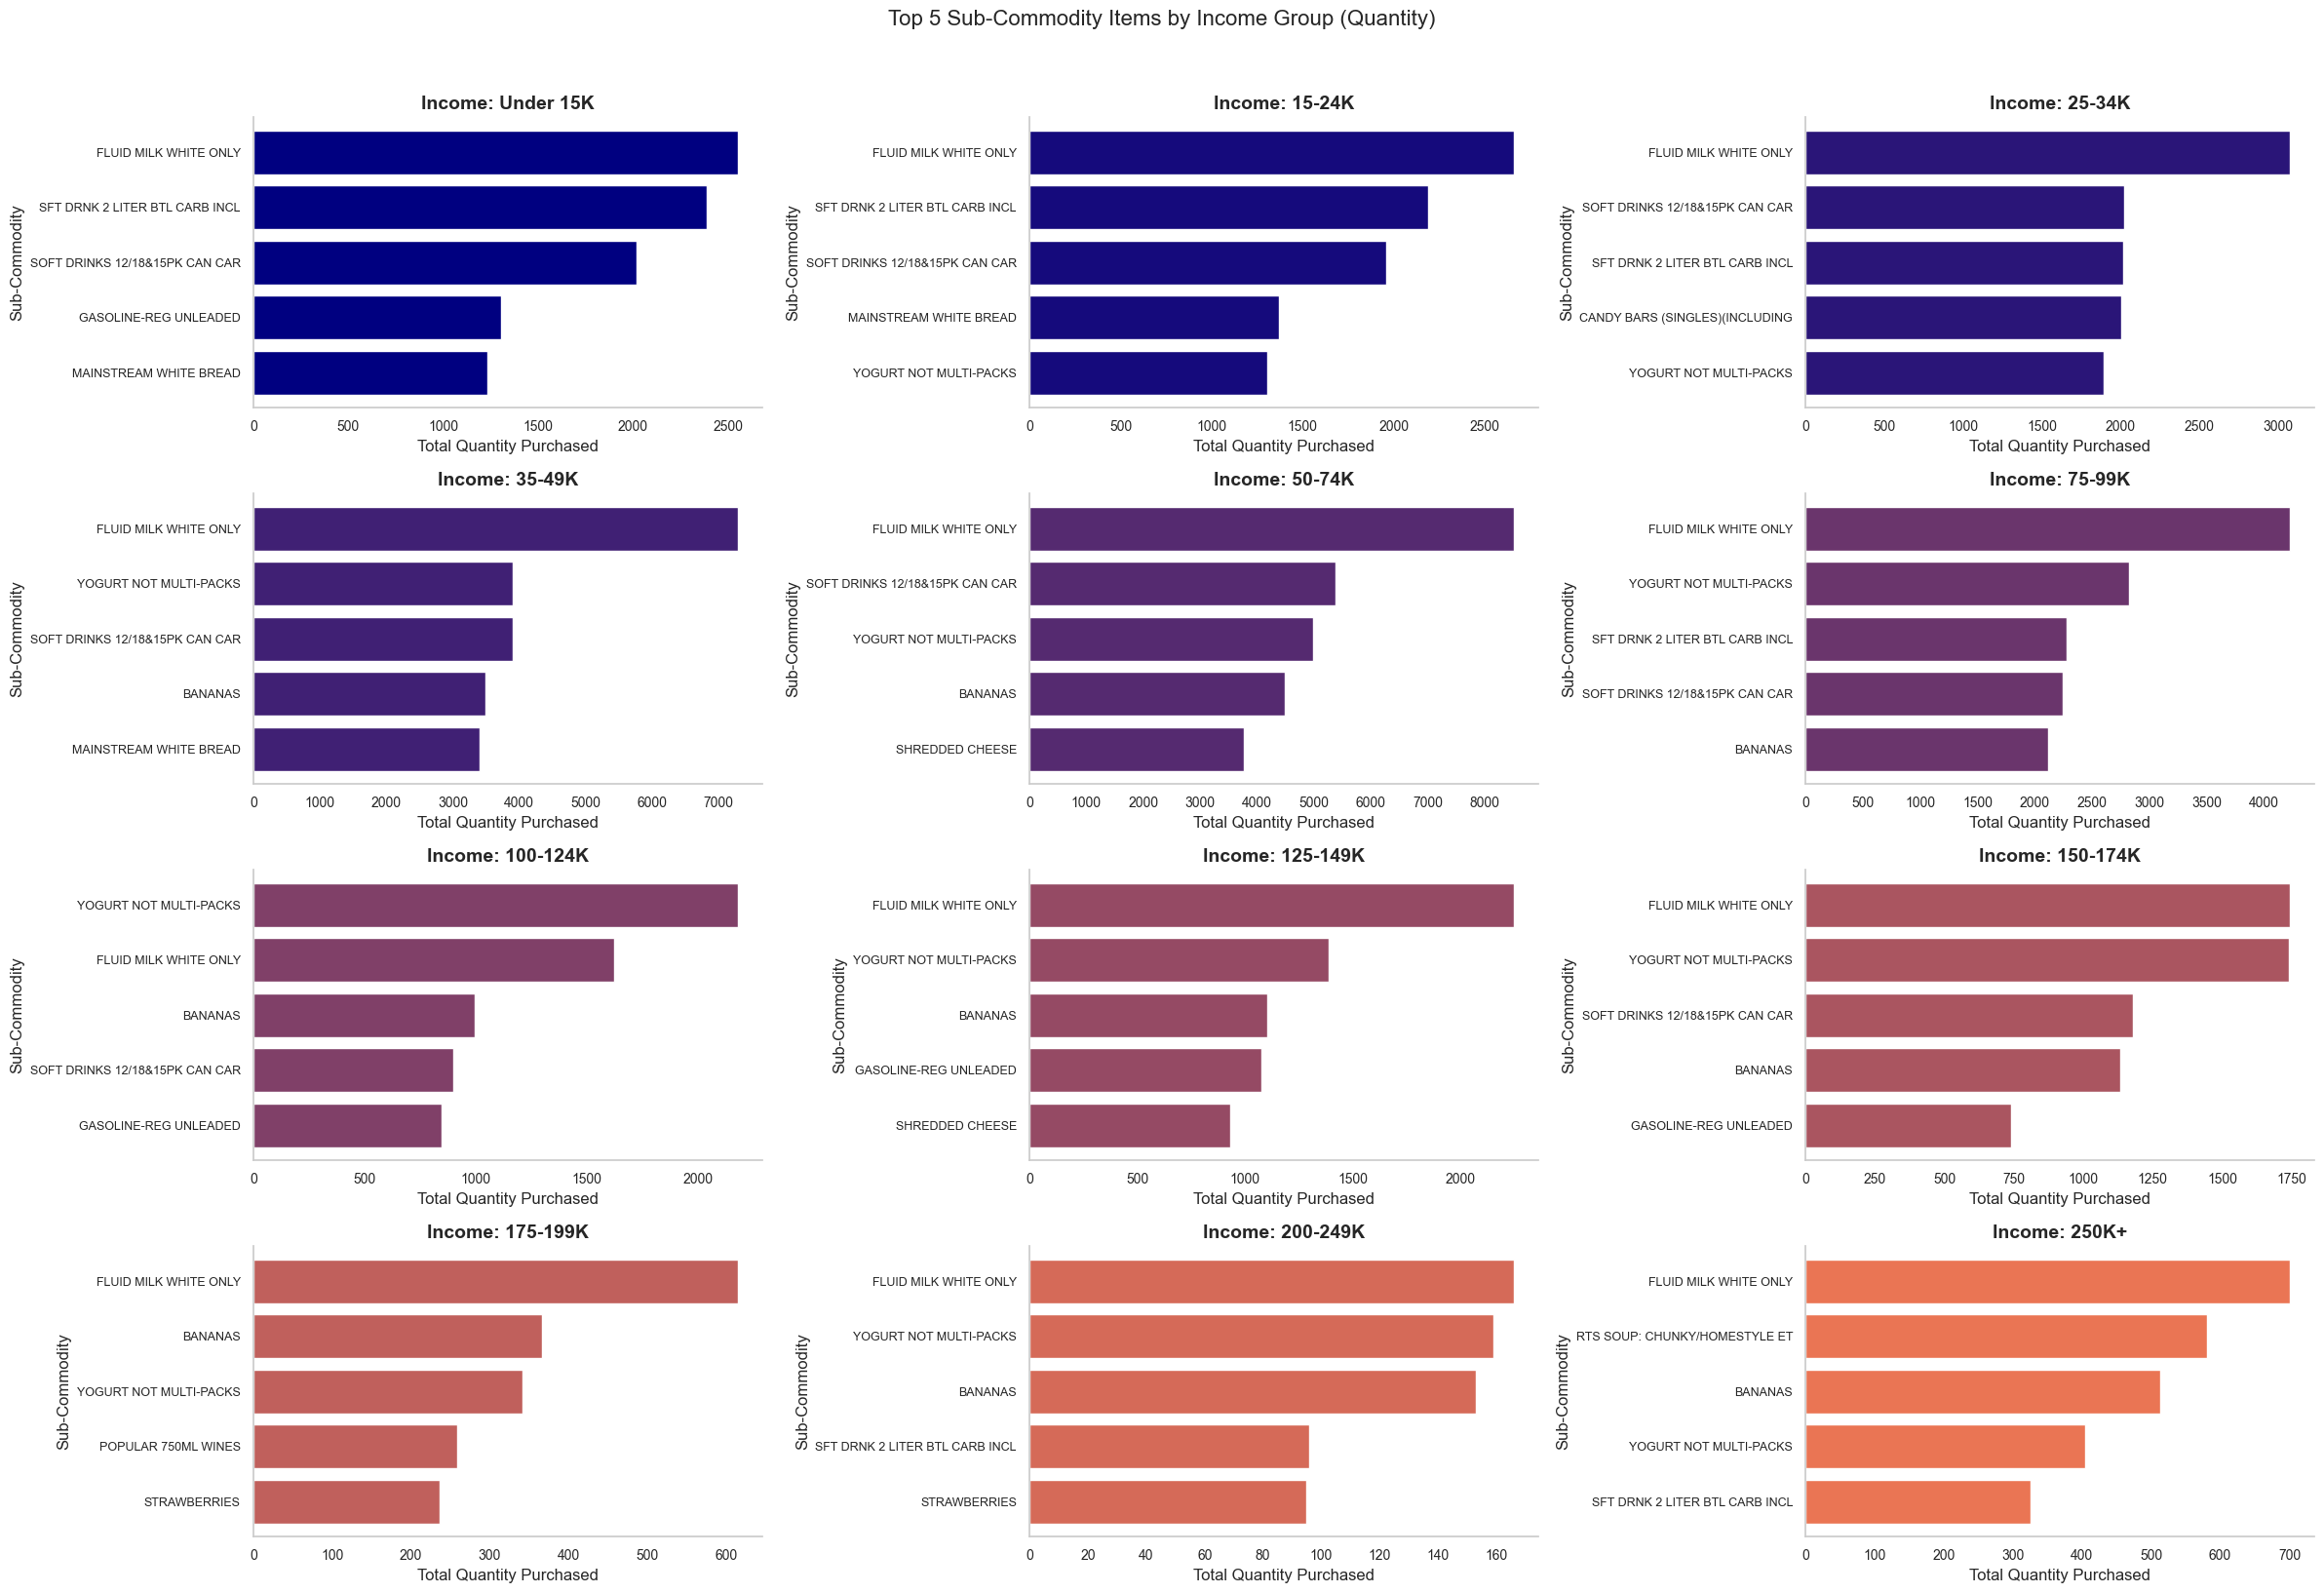

In [ ]:
# 1. Group by Income + Sub-Commodity, using count()
top_by_income = (
    merged_df
    .groupby(['INCOME_DESC', 'SUB_COMMODITY_DESC'], observed=True)['QUANTITY']
    .count()
    .reset_index()
    .sort_values(['INCOME_DESC', 'QUANTITY'], ascending=[True, False])
    .groupby('INCOME_DESC')
    .head(5)
)

# 2. Determine global sub-commodity order
sub_commodity_order = (
    top_by_income.groupby('SUB_COMMODITY_DESC')['QUANTITY']
    .sum()
    .reset_index()
    .sort_values(by='QUANTITY', ascending=False)
)['SUB_COMMODITY_DESC'].tolist()

top_by_income['SUB_COMMODITY_DESC'] = pd.Categorical(
    top_by_income['SUB_COMMODITY_DESC'], categories=sub_commodity_order, ordered=True
)

# 3. Color map
custom_cmap = mcolors.LinearSegmentedColormap.from_list("navy_coral", ["navy", "coral"])

# 4. Layout
income_groups = top_by_income['INCOME_DESC'].unique()
num_cols = 3
num_rows = -(-len(income_groups) // num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 4 * num_rows))
axes = axes.flatten()

# 5. Plot
for i, inc in enumerate(income_groups):
    subset = top_by_income[top_by_income['INCOME_DESC'] == inc].sort_values(by="QUANTITY", ascending=True)

    axes[i].barh(subset['SUB_COMMODITY_DESC'], subset['QUANTITY'], color=custom_cmap(i / len(income_groups)))
    axes[i].set_title(f"Income: {inc}", fontsize=14)
    axes[i].set_xlabel("Total Quantity Purchased")
    axes[i].set_ylabel("Sub-Commodity")
    axes[i].tick_params(axis='x', labelsize=10)
    axes[i].tick_params(axis='y', labelsize=9)
    axes[i].grid(False)
    axes[i].set_facecolor("white")
    axes[i].spines["top"].set_visible(False)
    axes[i].spines["right"].set_visible(False)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Top 5 Sub-Commodity Items by Income Group (Quantity)", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


- Overall, **fluid milk remains a top sub-commodity across nearly all** income brackets, indicating its broad appeal.
- Meanwhile, **soft drinks appear more often in lower to middle income **ranges
- bananas show up more prominently among **higher incomes**—suggesting a slight shift toward fresh produce at those levels.

/var/folders/qf/l8sfrcpd6vq2564v1_qt31fm0000gn/T/ipykernel_19089/1261565656.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_df


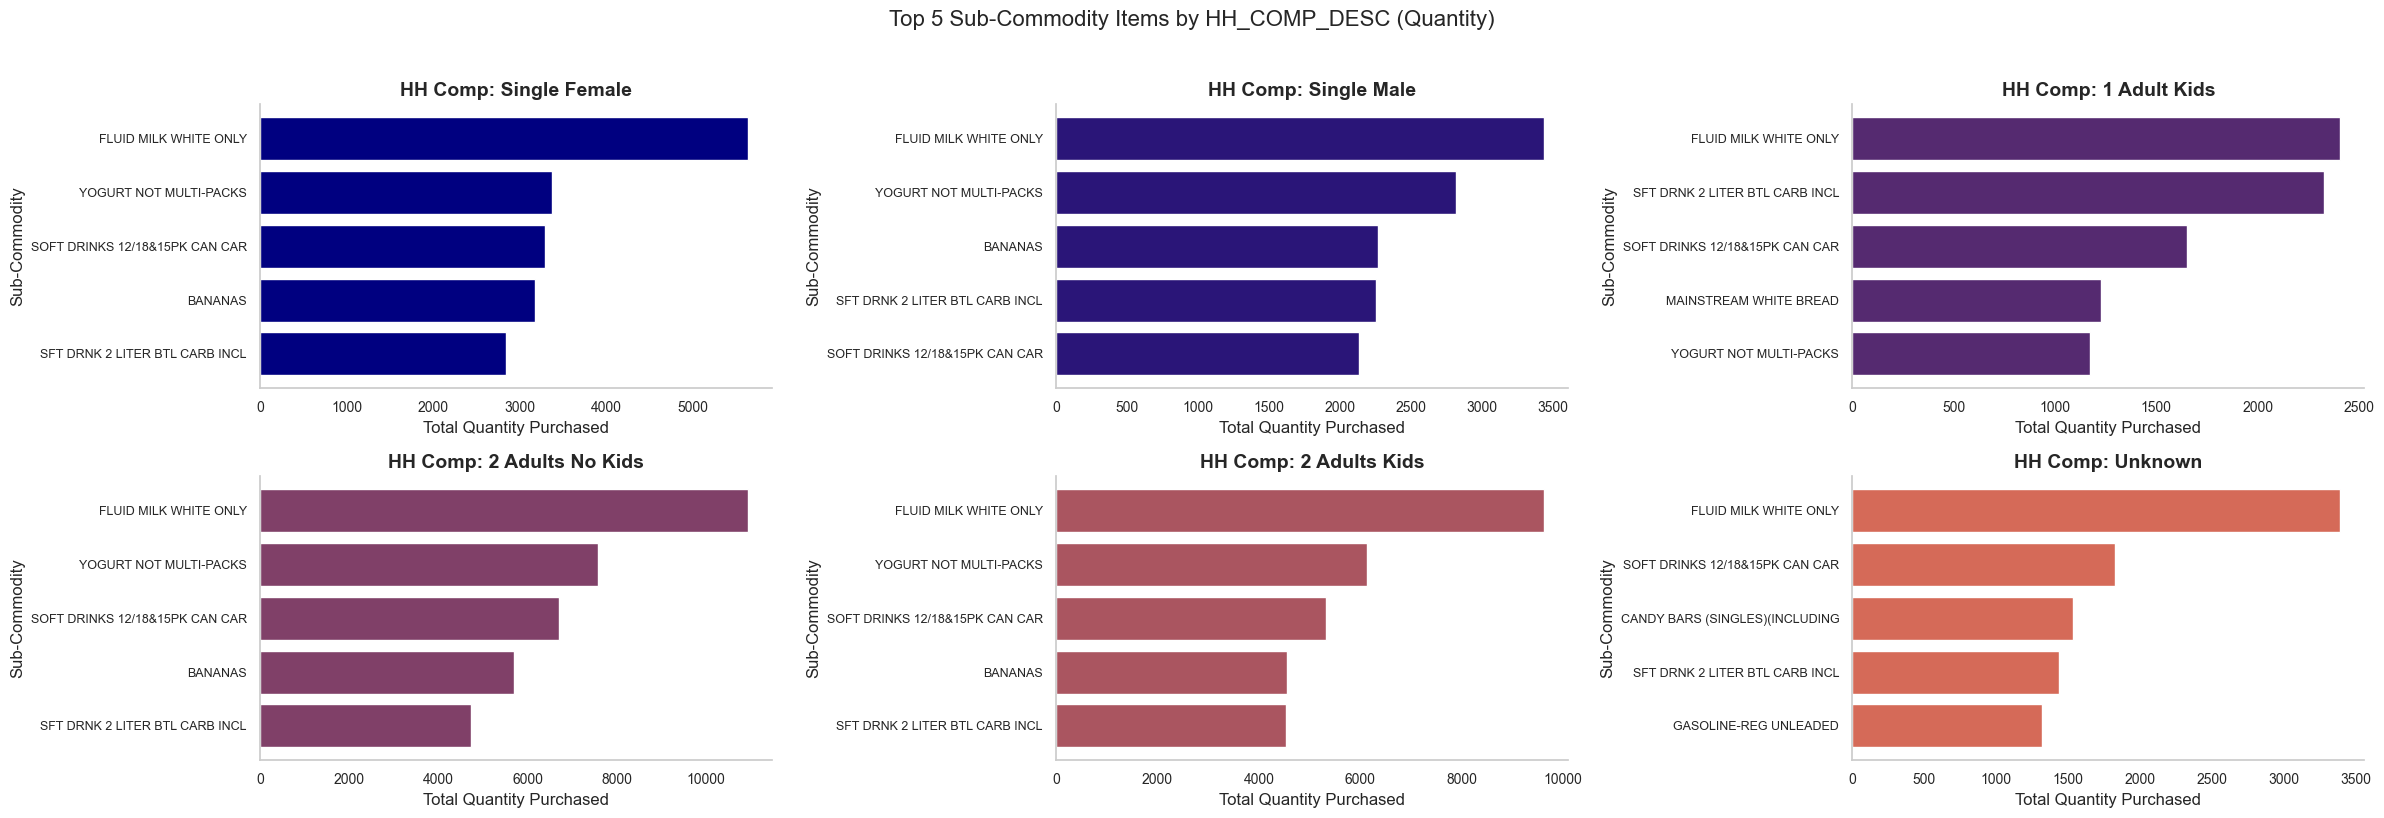

In [ ]:
# 1. Group by HH_COMP_DESC + Sub-Commodity
top_by_hhcomp = (
    merged_df
    .groupby(['HH_COMP_DESC', 'SUB_COMMODITY_DESC'], observed=True)['QUANTITY']
    .count()
    .reset_index()
    .sort_values(['HH_COMP_DESC', 'QUANTITY'], ascending=[True, False])
    .groupby('HH_COMP_DESC')
    .head(5)
)

# 2. Order
sub_commodity_order = (
    top_by_hhcomp.groupby('SUB_COMMODITY_DESC')['QUANTITY']
    .sum()
    .reset_index()
    .sort_values(by='QUANTITY', ascending=False)
)['SUB_COMMODITY_DESC'].tolist()

top_by_hhcomp['SUB_COMMODITY_DESC'] = pd.Categorical(
    top_by_hhcomp['SUB_COMMODITY_DESC'], categories=sub_commodity_order, ordered=True
)

# 3. Colormap
custom_cmap = mcolors.LinearSegmentedColormap.from_list("navy_coral", ["navy", "coral"])

# 4. Layout
hhcomp_groups = top_by_hhcomp['HH_COMP_DESC'].unique()
num_cols = 3
num_rows = -(-len(hhcomp_groups) // num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 4 * num_rows))
axes = axes.flatten()

# 5. Plot
for i, grp in enumerate(hhcomp_groups):
    subset = top_by_hhcomp[top_by_hhcomp['HH_COMP_DESC'] == grp].sort_values(by="QUANTITY", ascending=True)

    axes[i].barh(subset['SUB_COMMODITY_DESC'], subset['QUANTITY'], color=custom_cmap(i / len(hhcomp_groups)))
    axes[i].set_title(f"HH Comp: {grp}", fontsize=14)
    axes[i].set_xlabel("Total Quantity Purchased")
    axes[i].set_ylabel("Sub-Commodity")
    axes[i].tick_params(axis='x', labelsize=10)
    axes[i].tick_params(axis='y', labelsize=9)
    axes[i].grid(False)
    axes[i].set_facecolor("white")
    axes[i].spines["top"].set_visible(False)
    axes[i].spines["right"].set_visible(False)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Top 5 Sub-Commodity Items by HH_COMP_DESC (Quantity)", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


- Fluid milk remains universal top choice (banana and soft drinks remain popular)
- **yogurt multi-packs stand out particularly for households with kids, suggesting a child-friendly snack preference.**

/var/folders/qf/l8sfrcpd6vq2564v1_qt31fm0000gn/T/ipykernel_19089/2457504017.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_df


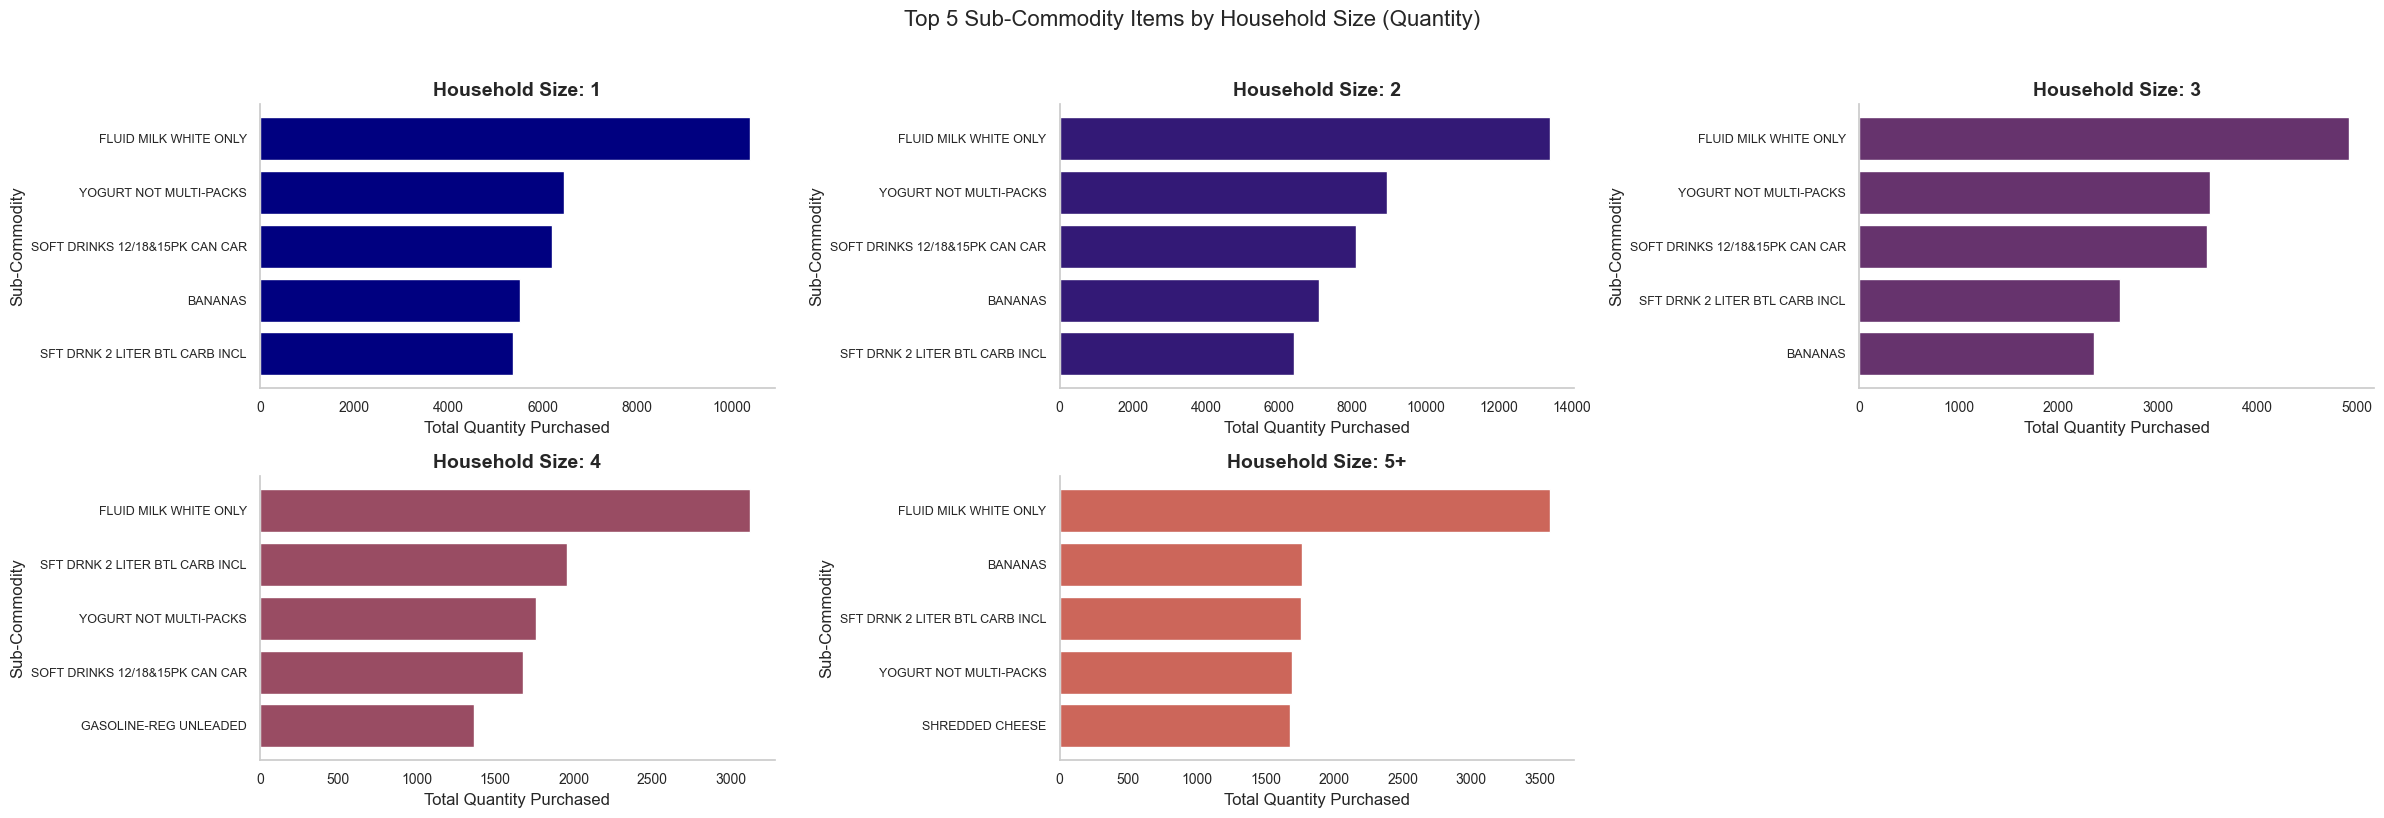

In [ ]:
# 1. Group by HOUSEHOLD_SIZE_DESC + Sub-Commodity
top_by_hhsize = (
    merged_df
    .groupby(['HOUSEHOLD_SIZE_DESC', 'SUB_COMMODITY_DESC'], observed=True)['QUANTITY']
    .count()
    .reset_index()
    .sort_values(['HOUSEHOLD_SIZE_DESC', 'QUANTITY'], ascending=[True, False])
    .groupby('HOUSEHOLD_SIZE_DESC')
    .head(5)
)

# 2. Order
sub_commodity_order = (
    top_by_hhsize.groupby('SUB_COMMODITY_DESC')['QUANTITY']
    .sum()
    .reset_index()
    .sort_values(by='QUANTITY', ascending=False)
)['SUB_COMMODITY_DESC'].tolist()

top_by_hhsize['SUB_COMMODITY_DESC'] = pd.Categorical(
    top_by_hhsize['SUB_COMMODITY_DESC'], categories=sub_commodity_order, ordered=True
)

# 3. Colormap
custom_cmap = mcolors.LinearSegmentedColormap.from_list("navy_coral", ["navy", "coral"])

# 4. Layout
hhsize_groups = top_by_hhsize['HOUSEHOLD_SIZE_DESC'].unique()
num_cols = 3
num_rows = -(-len(hhsize_groups) // num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 4 * num_rows))
axes = axes.flatten()

# 5. Plot
for i, grp in enumerate(hhsize_groups):
    subset = top_by_hhsize[top_by_hhsize['HOUSEHOLD_SIZE_DESC'] == grp].sort_values(by="QUANTITY", ascending=True)

    axes[i].barh(subset['SUB_COMMODITY_DESC'], subset['QUANTITY'], color=custom_cmap(i / len(hhsize_groups)))
    axes[i].set_title(f"Household Size: {grp}", fontsize=14)
    axes[i].set_xlabel("Total Quantity Purchased")
    axes[i].set_ylabel("Sub-Commodity")
    axes[i].tick_params(axis='x', labelsize=10)
    axes[i].tick_params(axis='y', labelsize=9)
    axes[i].grid(False)
    axes[i].set_facecolor("white")
    axes[i].spines["top"].set_visible(False)
    axes[i].spines["right"].set_visible(False)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Top 5 Sub-Commodity Items by Household Size (Quantity)", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


- Fluid milk and bananas remain consistent favorites across all household sizes.
- Yogurt multi-packs and shredded cheese become more prominent as household size grows, suggesting a need for convenient, larger-quantity meal options.

/var/folders/qf/l8sfrcpd6vq2564v1_qt31fm0000gn/T/ipykernel_19089/3654147022.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_df


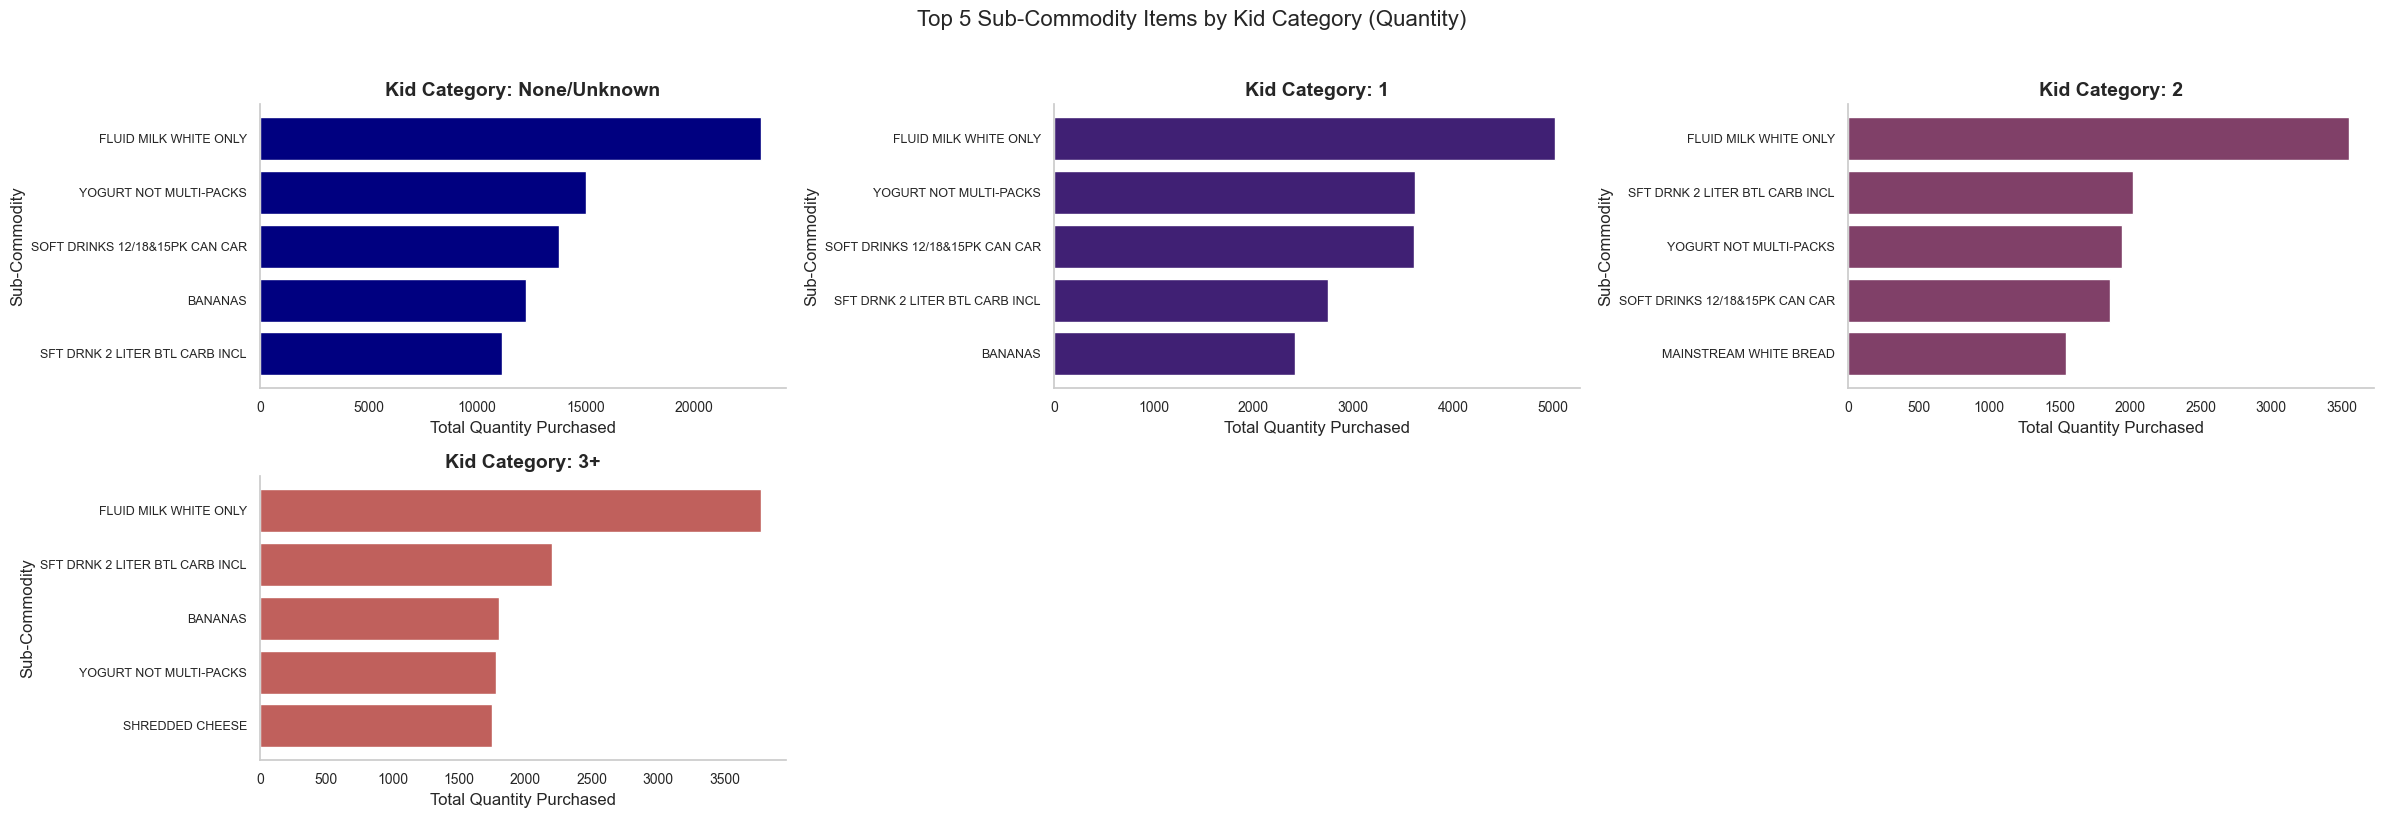

In [ ]:
# 1. Group by KID_CATEGORY_DESC + Sub-Commodity
top_by_kidcat = (
    merged_df
    .groupby(['KID_CATEGORY_DESC', 'SUB_COMMODITY_DESC'], observed=True)['QUANTITY']
    .count()
    .reset_index()
    .sort_values(['KID_CATEGORY_DESC', 'QUANTITY'], ascending=[True, False])
    .groupby('KID_CATEGORY_DESC')
    .head(5)
)

# 2. Order
sub_commodity_order = (
    top_by_kidcat.groupby('SUB_COMMODITY_DESC')['QUANTITY']
    .sum()
    .reset_index()
    .sort_values(by='QUANTITY', ascending=False)
)['SUB_COMMODITY_DESC'].tolist()

top_by_kidcat['SUB_COMMODITY_DESC'] = pd.Categorical(
    top_by_kidcat['SUB_COMMODITY_DESC'], categories=sub_commodity_order, ordered=True
)

# 3. Colormap
custom_cmap = mcolors.LinearSegmentedColormap.from_list("navy_coral", ["navy", "coral"])

# 4. Layout
kidcat_groups = top_by_kidcat['KID_CATEGORY_DESC'].unique()
num_cols = 3
num_rows = -(-len(kidcat_groups) // num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 4 * num_rows))
axes = axes.flatten()

# 5. Plot
for i, grp in enumerate(kidcat_groups):
    subset = top_by_kidcat[top_by_kidcat['KID_CATEGORY_DESC'] == grp].sort_values(by="QUANTITY", ascending=True)

    axes[i].barh(subset['SUB_COMMODITY_DESC'], subset['QUANTITY'], color=custom_cmap(i / len(kidcat_groups)))
    axes[i].set_title(f"Kid Category: {grp}", fontsize=14)
    axes[i].set_xlabel("Total Quantity Purchased")
    axes[i].set_ylabel("Sub-Commodity")
    axes[i].tick_params(axis='x', labelsize=10)
    axes[i].tick_params(axis='y', labelsize=9)
    axes[i].grid(False)
    axes[i].set_facecolor("white")
    axes[i].spines["top"].set_visible(False)
    axes[i].spines["right"].set_visible(False)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Top 5 Sub-Commodity Items by Kid Category (Quantity)", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


Fluid milk and bananas are popular across all kid categories.
Yogurt multi-packs become notably more prominent as the number of kids increases, suggesting a strong preference for convenient snacks in larger families.

/var/folders/qf/l8sfrcpd6vq2564v1_qt31fm0000gn/T/ipykernel_19089/2457504017.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_df


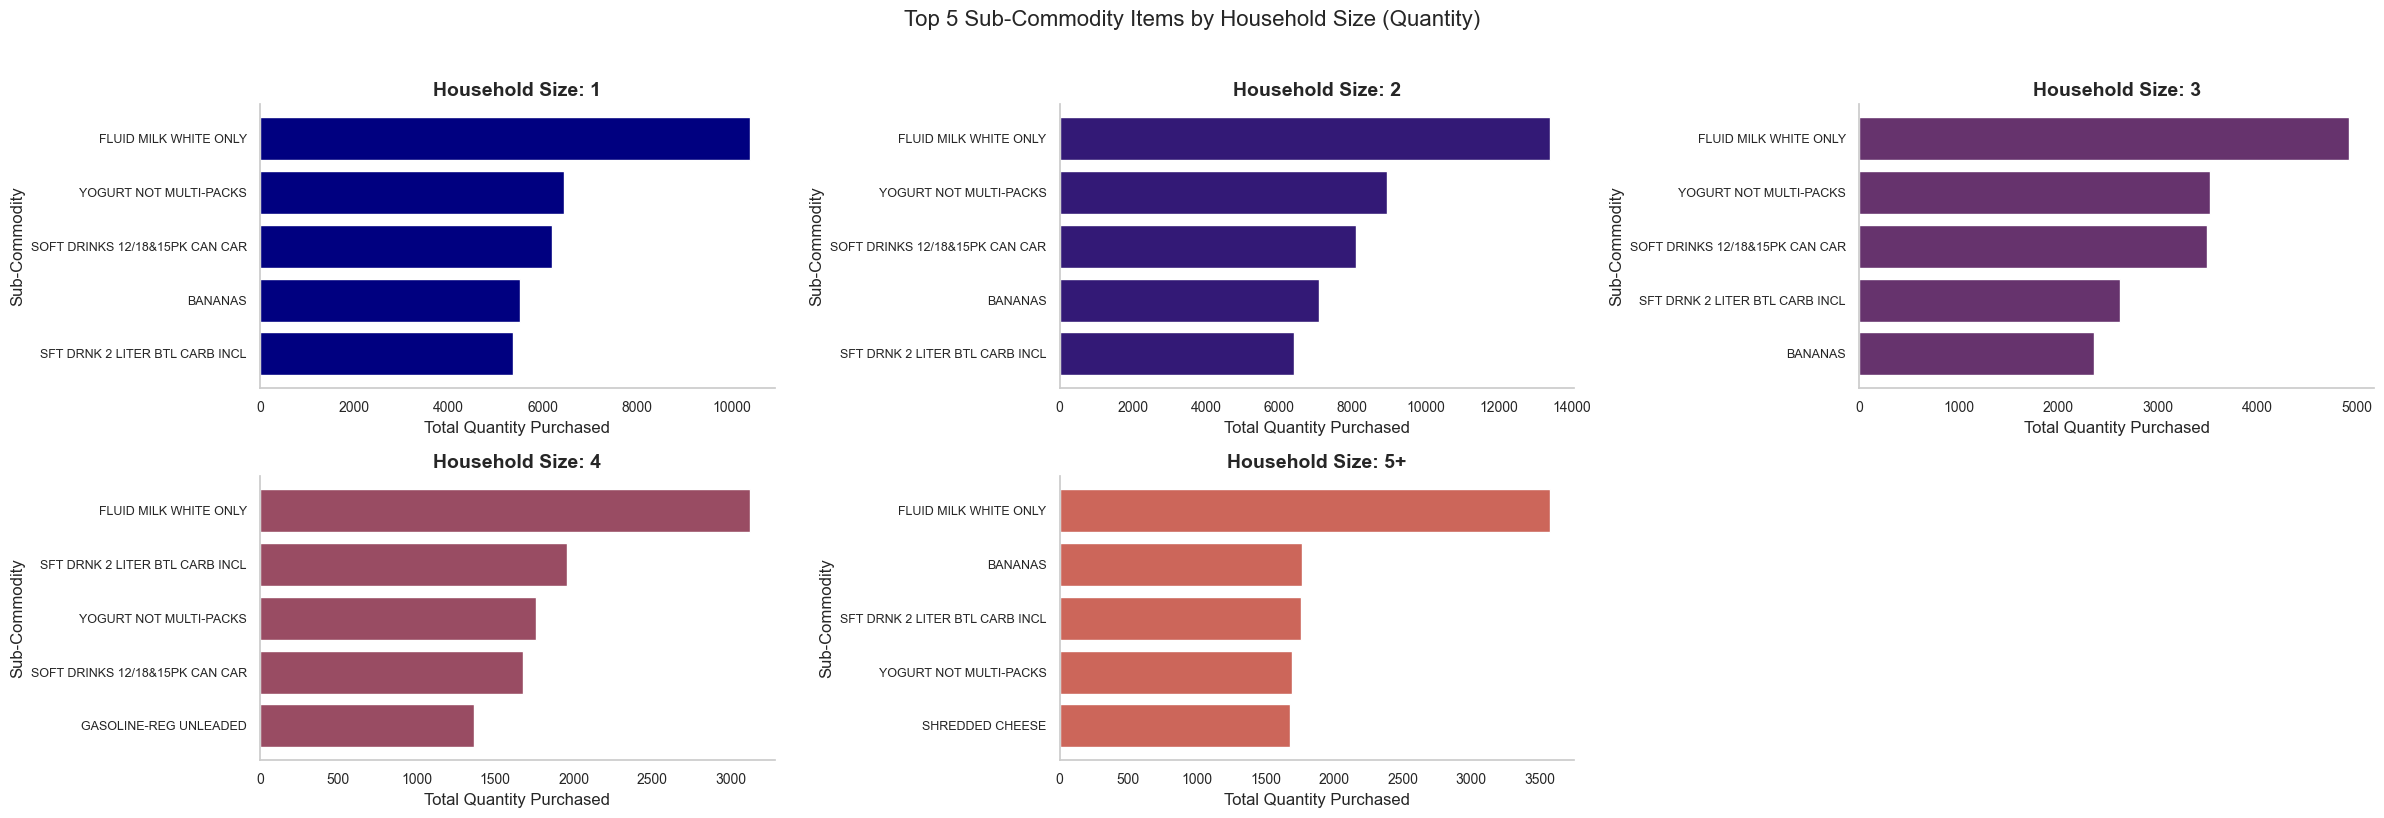

In [ ]:
# 1. Group by HOUSEHOLD_SIZE_DESC + Sub-Commodity
top_by_hhsize = (
    merged_df
    .groupby(['HOUSEHOLD_SIZE_DESC', 'SUB_COMMODITY_DESC'], observed=True)['QUANTITY']
    .count()
    .reset_index()
    .sort_values(['HOUSEHOLD_SIZE_DESC', 'QUANTITY'], ascending=[True, False])
    .groupby('HOUSEHOLD_SIZE_DESC')
    .head(5)
)

# 2. Order
sub_commodity_order = (
    top_by_hhsize.groupby('SUB_COMMODITY_DESC')['QUANTITY']
    .sum()
    .reset_index()
    .sort_values(by='QUANTITY', ascending=False)
)['SUB_COMMODITY_DESC'].tolist()

top_by_hhsize['SUB_COMMODITY_DESC'] = pd.Categorical(
    top_by_hhsize['SUB_COMMODITY_DESC'], categories=sub_commodity_order, ordered=True
)

# 3. Colormap
custom_cmap = mcolors.LinearSegmentedColormap.from_list("navy_coral", ["navy", "coral"])

# 4. Layout
hhsize_groups = top_by_hhsize['HOUSEHOLD_SIZE_DESC'].unique()
num_cols = 3
num_rows = -(-len(hhsize_groups) // num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 4 * num_rows))
axes = axes.flatten()

# 5. Plot
for i, grp in enumerate(hhsize_groups):
    subset = top_by_hhsize[top_by_hhsize['HOUSEHOLD_SIZE_DESC'] == grp].sort_values(by="QUANTITY", ascending=True)

    axes[i].barh(subset['SUB_COMMODITY_DESC'], subset['QUANTITY'], color=custom_cmap(i / len(hhsize_groups)))
    axes[i].set_title(f"Household Size: {grp}", fontsize=14)
    axes[i].set_xlabel("Total Quantity Purchased")
    axes[i].set_ylabel("Sub-Commodity")
    axes[i].tick_params(axis='x', labelsize=10)
    axes[i].tick_params(axis='y', labelsize=9)
    axes[i].grid(False)
    axes[i].set_facecolor("white")
    axes[i].spines["top"].set_visible(False)
    axes[i].spines["right"].set_visible(False)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Top 5 Sub-Commodity Items by Household Size (Quantity)", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


- Fluid milk and bananas are universally popular, but yogurt multi-packs and shredded cheese appear more as household size increases—indicating a need for convenient, family-friendly staples.
- Larger households (4–5+) show a broader variety of top items, suggesting more diverse grocery needs.

/var/folders/qf/l8sfrcpd6vq2564v1_qt31fm0000gn/T/ipykernel_19089/480211798.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_df


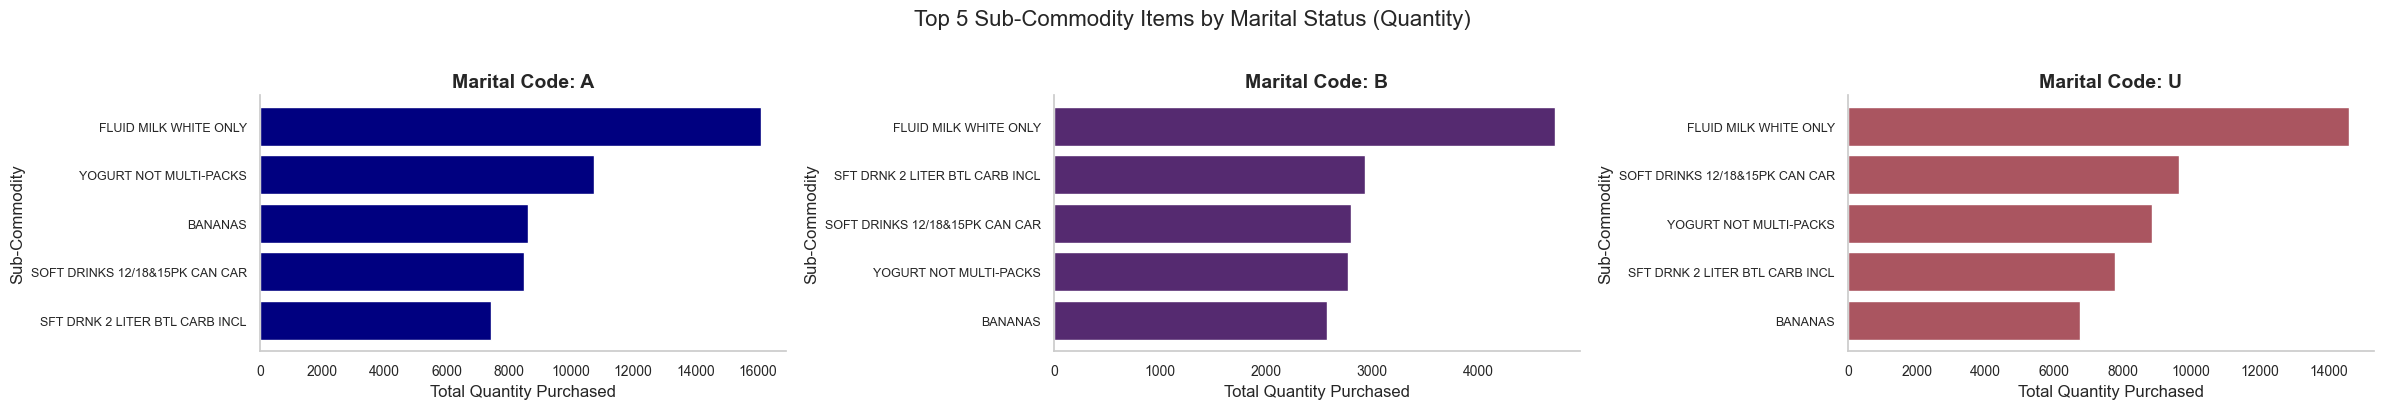

In [ ]:
# 1. Group by MARITAL_STATUS_CODE + Sub-Commodity
top_by_marital = (
    merged_df
    .groupby(['MARITAL_STATUS_CODE', 'SUB_COMMODITY_DESC'], observed=True)['QUANTITY']
    .count()
    .reset_index()
    .sort_values(['MARITAL_STATUS_CODE', 'QUANTITY'], ascending=[True, False])
    .groupby('MARITAL_STATUS_CODE')
    .head(5)
)

# 2. Order
sub_commodity_order = (
    top_by_marital.groupby('SUB_COMMODITY_DESC')['QUANTITY']
    .sum()
    .reset_index()
    .sort_values(by='QUANTITY', ascending=False)
)['SUB_COMMODITY_DESC'].tolist()

top_by_marital['SUB_COMMODITY_DESC'] = pd.Categorical(
    top_by_marital['SUB_COMMODITY_DESC'], categories=sub_commodity_order, ordered=True
)

# 3. Colormap
custom_cmap = mcolors.LinearSegmentedColormap.from_list("navy_coral", ["navy", "coral"])

# 4. Layout
marital_groups = top_by_marital['MARITAL_STATUS_CODE'].unique()
num_cols = 3
num_rows = -(-len(marital_groups) // num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 4 * num_rows))
axes = axes.flatten()

# 5. Plot
for i, grp in enumerate(marital_groups):
    subset = top_by_marital[top_by_marital['MARITAL_STATUS_CODE'] == grp].sort_values(by="QUANTITY", ascending=True)

    axes[i].barh(subset['SUB_COMMODITY_DESC'], subset['QUANTITY'], color=custom_cmap(i / len(marital_groups)))
    axes[i].set_title(f"Marital Code: {grp}", fontsize=14)
    axes[i].set_xlabel("Total Quantity Purchased")
    axes[i].set_ylabel("Sub-Commodity")
    axes[i].tick_params(axis='x', labelsize=10)
    axes[i].tick_params(axis='y', labelsize=9)
    axes[i].grid(False)
    axes[i].set_facecolor("white")
    axes[i].spines["top"].set_visible(False)
    axes[i].spines["right"].set_visible(False)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Top 5 Sub-Commodity Items by Marital Status (Quantity)", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


- Fluid milk is a staple across all marital statuses, but soft drinks show up prominently for singles and couples alike.
- Bananas appear in every group, hinting at a universal preference for fresh produce.


/var/folders/qf/l8sfrcpd6vq2564v1_qt31fm0000gn/T/ipykernel_19089/3418703318.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_df


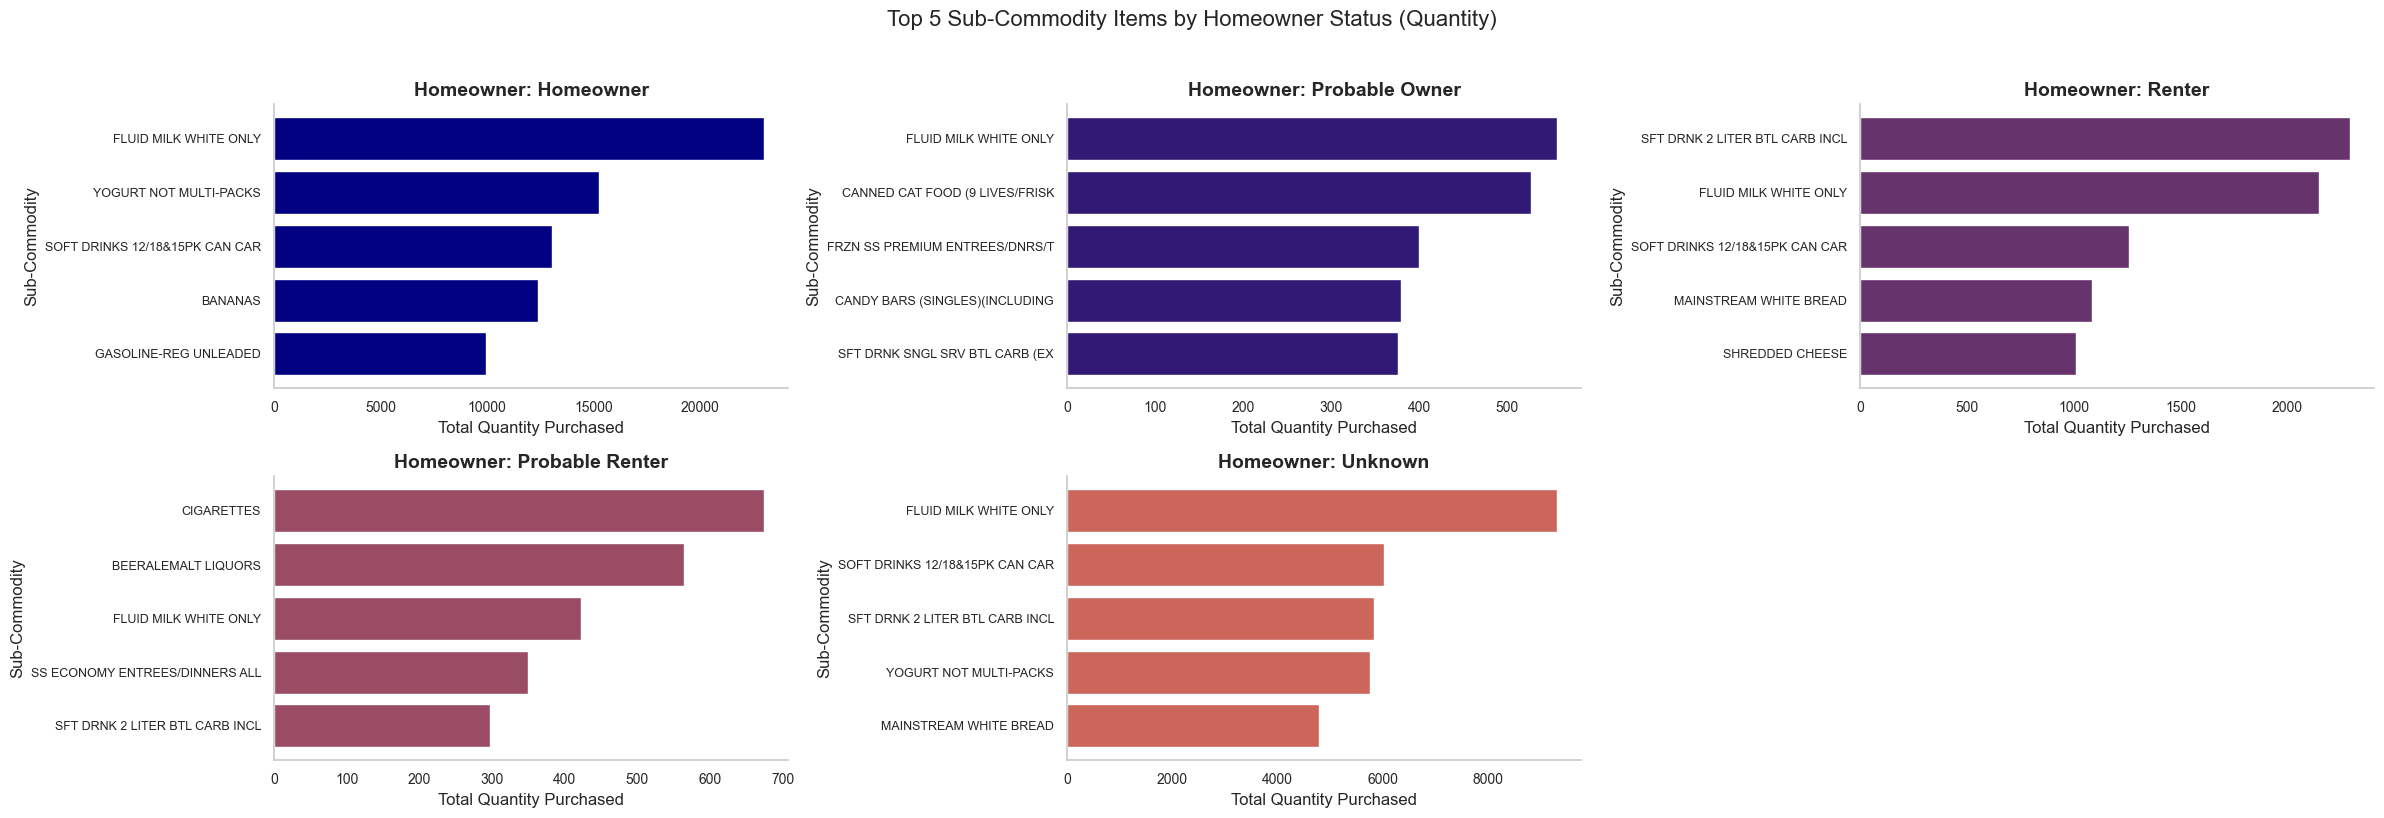

In [ ]:
# 1. Group by HOMEOWNER_DESC + Sub-Commodity
top_by_homeowner = (
    merged_df
    .groupby(['HOMEOWNER_DESC', 'SUB_COMMODITY_DESC'], observed=True)['QUANTITY']
    .count()
    .reset_index()
    .sort_values(['HOMEOWNER_DESC', 'QUANTITY'], ascending=[True, False])
    .groupby('HOMEOWNER_DESC')
    .head(5)
)

# 2. Order
sub_commodity_order = (
    top_by_homeowner.groupby('SUB_COMMODITY_DESC')['QUANTITY']
    .sum()
    .reset_index()
    .sort_values(by='QUANTITY', ascending=False)
)['SUB_COMMODITY_DESC'].tolist()

top_by_homeowner['SUB_COMMODITY_DESC'] = pd.Categorical(
    top_by_homeowner['SUB_COMMODITY_DESC'], categories=sub_commodity_order, ordered=True
)

# 3. Colormap
custom_cmap = mcolors.LinearSegmentedColormap.from_list("navy_coral", ["navy", "coral"])

# 4. Layout
homeowner_groups = top_by_homeowner['HOMEOWNER_DESC'].unique()
num_cols = 3
num_rows = -(-len(homeowner_groups) // num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 4 * num_rows))
axes = axes.flatten()

# 5. Plot
for i, grp in enumerate(homeowner_groups):
    subset = top_by_homeowner[top_by_homeowner['HOMEOWNER_DESC'] == grp].sort_values(by="QUANTITY", ascending=True)

    axes[i].barh(subset['SUB_COMMODITY_DESC'], subset['QUANTITY'], color=custom_cmap(i / len(homeowner_groups)))
    axes[i].set_title(f"Homeowner: {grp}", fontsize=14)
    axes[i].set_xlabel("Total Quantity Purchased")
    axes[i].set_ylabel("Sub-Commodity")
    axes[i].tick_params(axis='x', labelsize=10)
    axes[i].tick_params(axis='y', labelsize=9)
    axes[i].grid(False)
    axes[i].set_facecolor("white")
    axes[i].spines["top"].set_visible(False)
    axes[i].spines["right"].set_visible(False)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Top 5 Sub-Commodity Items by Homeowner Status (Quantity)", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


- Fluid milk and bananas again stand out as consistent favorites across homeowner categories.-
- Renters (including probable renters) see soft drinks and yogurt multi-packs slightly more, while homeowners lean into more baked bread/bun purchases.

#### COMMODITIES

/var/folders/qf/l8sfrcpd6vq2564v1_qt31fm0000gn/T/ipykernel_19089/192725933.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_df


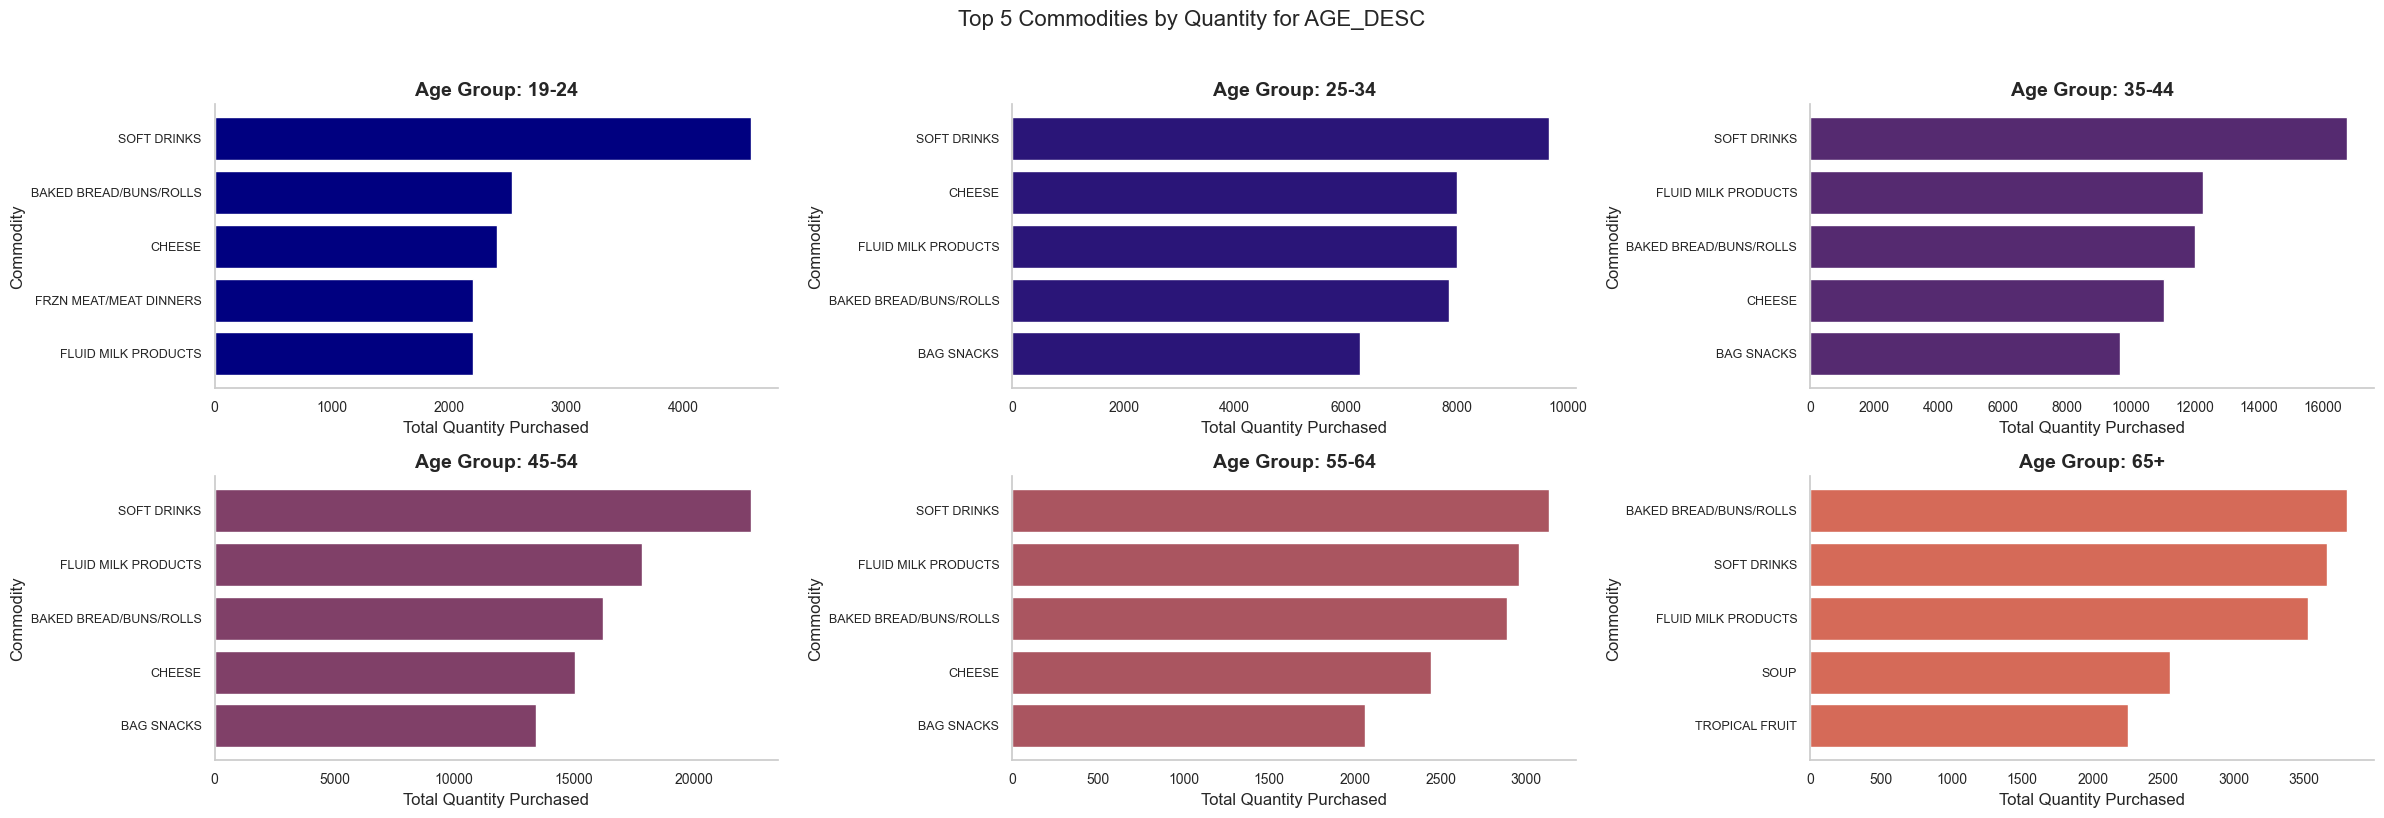

In [ ]:

# 1) Group by AGE_DESC + COMMODITY_DESC, count quantity
top_by_age_comm = (
    merged_df
    .groupby(['AGE_DESC', 'COMMODITY_DESC'], observed=True)['QUANTITY']
    .count()
    .reset_index()
    .sort_values(['AGE_DESC', 'QUANTITY'], ascending=[True, False])
    .groupby('AGE_DESC')
    .head(5)
)

# 2) Global commodity order
commodity_order = (
    top_by_age_comm.groupby('COMMODITY_DESC')['QUANTITY']
    .sum()
    .reset_index()
    .sort_values(by='QUANTITY', ascending=False)
)['COMMODITY_DESC'].tolist()

top_by_age_comm['COMMODITY_DESC'] = pd.Categorical(
    top_by_age_comm['COMMODITY_DESC'], categories=commodity_order, ordered=True
)

# 3) Color map
custom_cmap = mcolors.LinearSegmentedColormap.from_list("navy_coral", ["navy", "coral"])

# 4) Layout
age_groups = top_by_age_comm['AGE_DESC'].unique()
num_cols = 3
num_rows = -(-len(age_groups) // num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 4 * num_rows))
axes = axes.flatten()

# 5) Plot each AGE_DESC
for i, age in enumerate(age_groups):
    subset = top_by_age_comm[top_by_age_comm['AGE_DESC'] == age].sort_values(by="QUANTITY", ascending=True)
    axes[i].barh(subset['COMMODITY_DESC'], subset['QUANTITY'], color=custom_cmap(i / len(age_groups)))
    axes[i].set_title(f"Age Group: {age}", fontsize=14)
    axes[i].set_xlabel("Total Quantity Purchased")
    axes[i].set_ylabel("Commodity")
    axes[i].tick_params(axis='x', labelsize=10)
    axes[i].tick_params(axis='y', labelsize=9)
    axes[i].grid(False)
    axes[i].set_facecolor("white")
    axes[i].spines["top"].set_visible(False)
    axes[i].spines["right"].set_visible(False)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Top 5 Commodities by Quantity for AGE_DESC", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


- Younger groups (19–24) favor soft drinks and frozen/refrigerated meals, while middle-aged groups (35–54) purchase more fluid milk products.
- Older consumers (65+) show a shift toward bag snacks and tropical fruit, reflecting simpler snack choices, or a shift towards more whole foods, less processed things.

/var/folders/qf/l8sfrcpd6vq2564v1_qt31fm0000gn/T/ipykernel_19089/2713732041.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_df


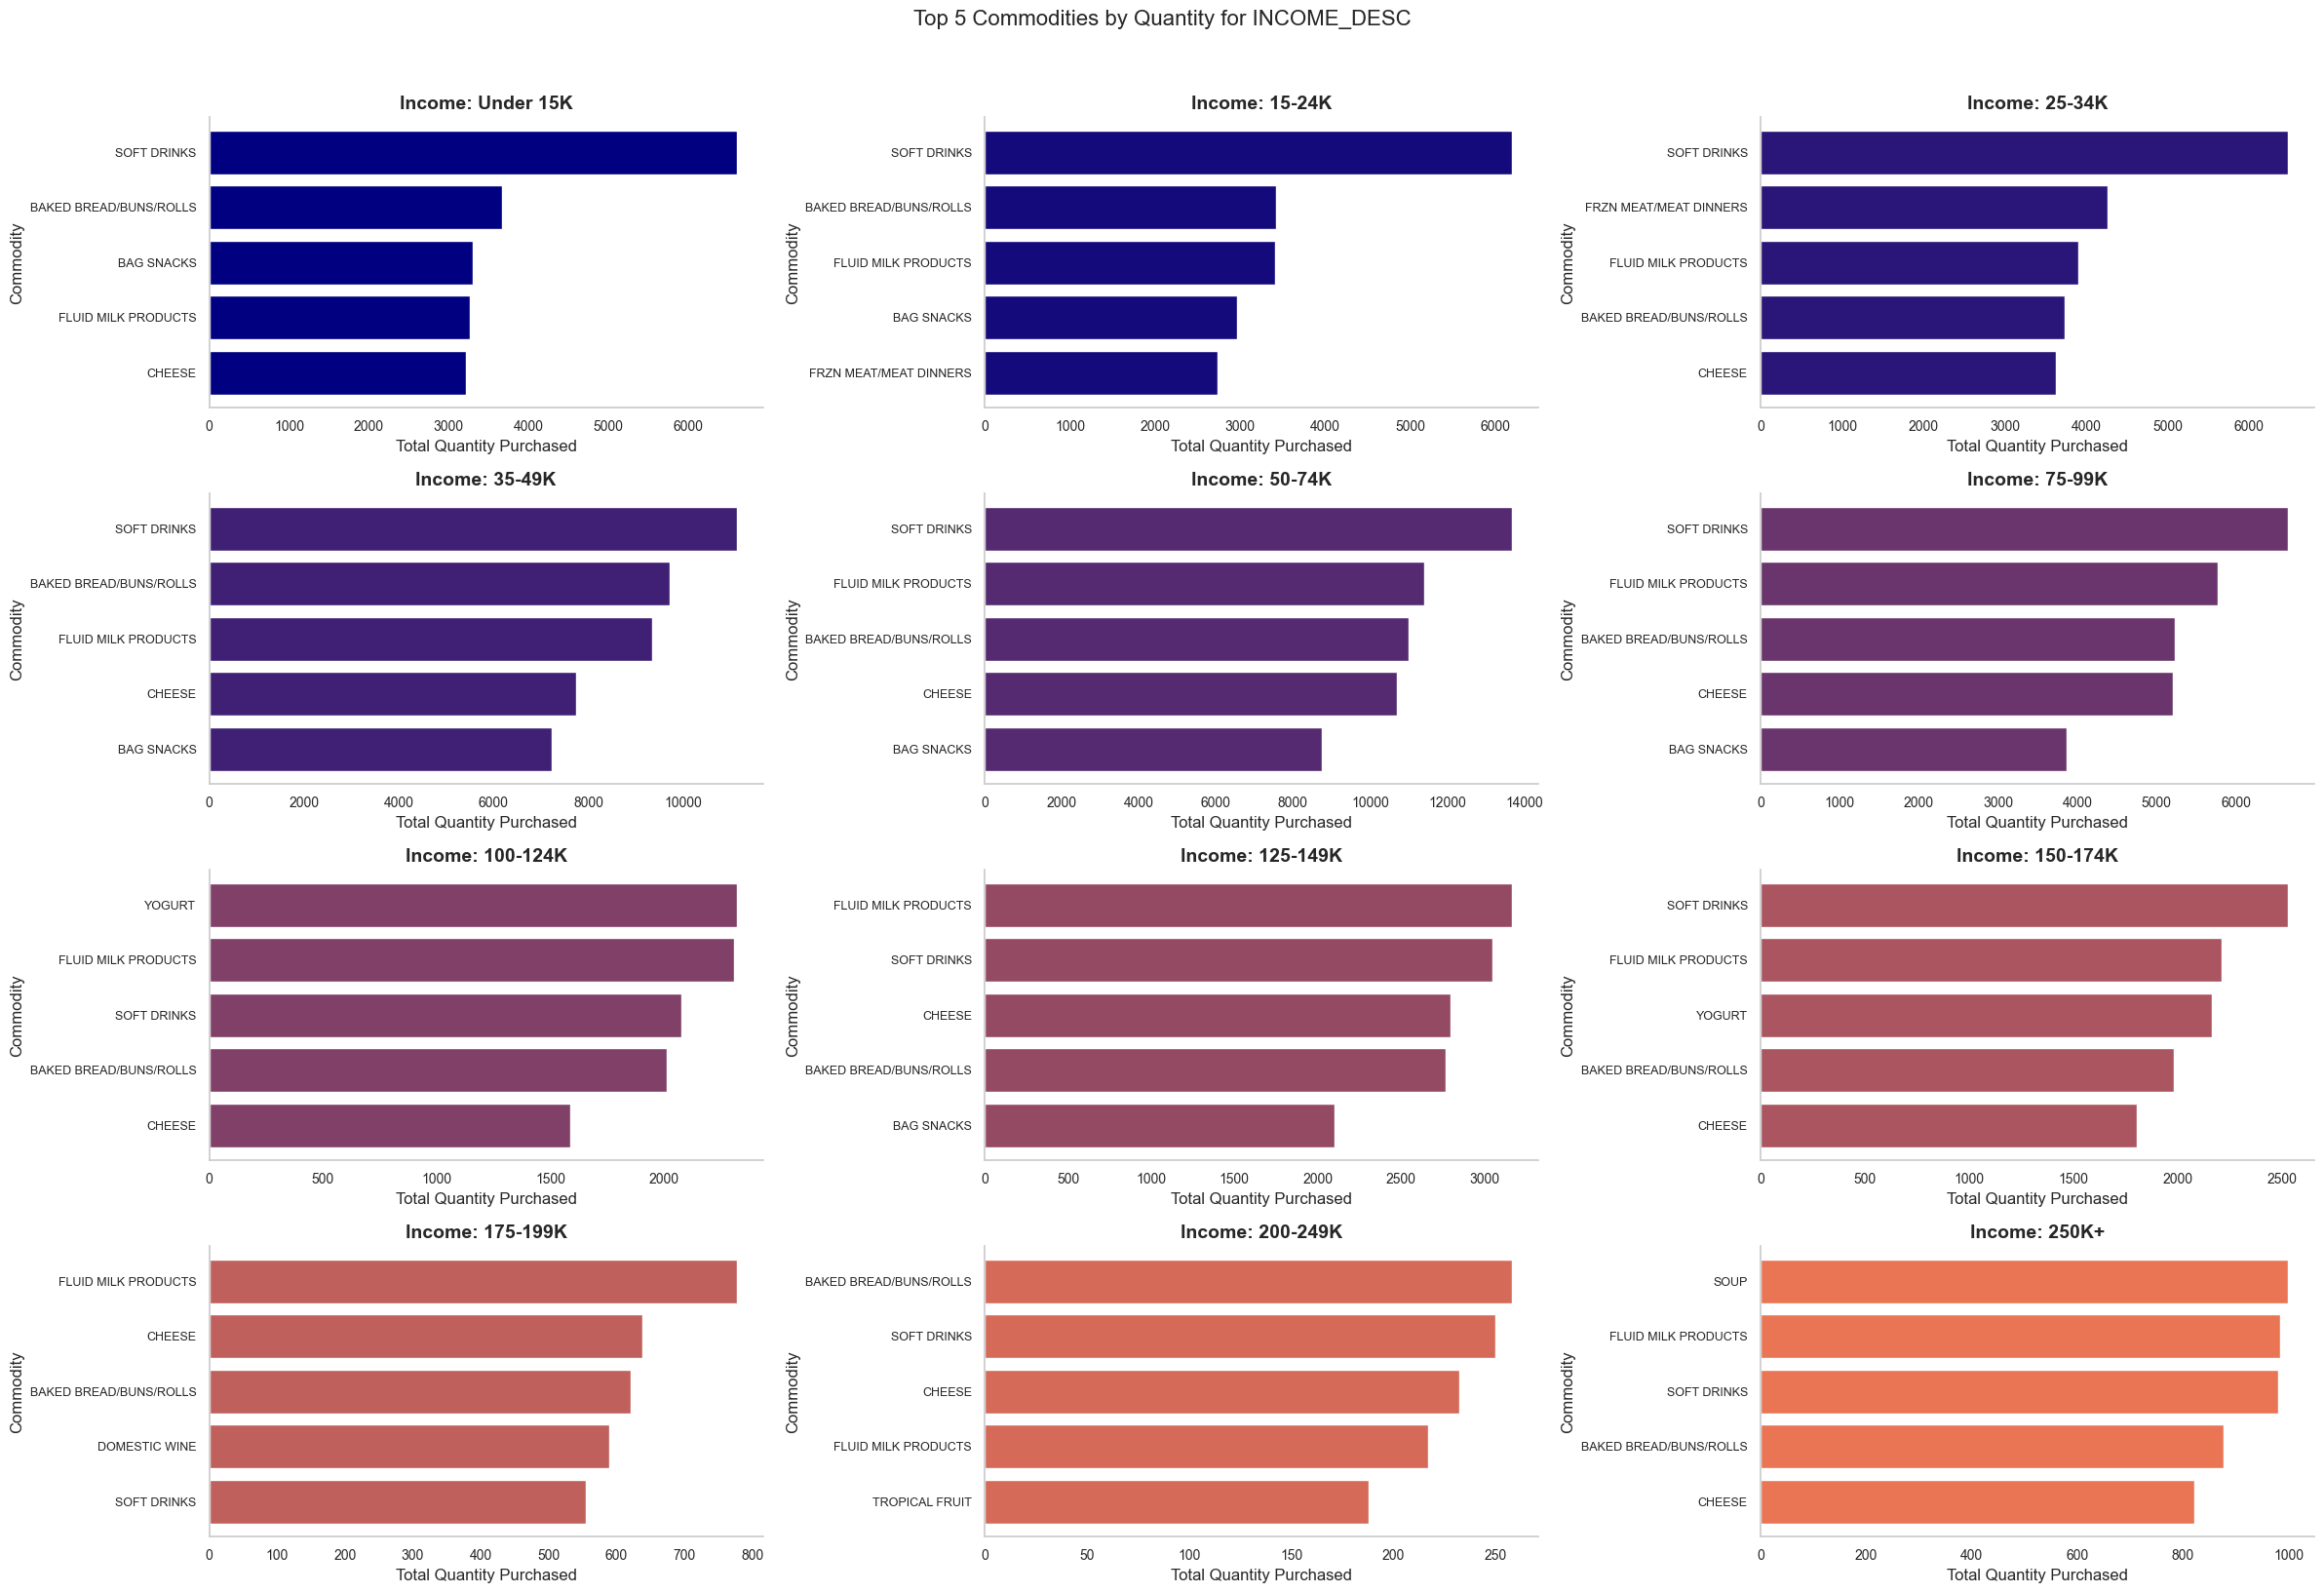

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd

top_by_income_comm = (
    merged_df
    .groupby(['INCOME_DESC', 'COMMODITY_DESC'], observed=True)['QUANTITY']
    .count()
    .reset_index()
    .sort_values(['INCOME_DESC', 'QUANTITY'], ascending=[True, False])
    .groupby('INCOME_DESC')
    .head(5)
)

commodity_order = (
    top_by_income_comm.groupby('COMMODITY_DESC')['QUANTITY']
    .sum()
    .reset_index()
    .sort_values(by='QUANTITY', ascending=False)
)['COMMODITY_DESC'].tolist()

top_by_income_comm['COMMODITY_DESC'] = pd.Categorical(
    top_by_income_comm['COMMODITY_DESC'], categories=commodity_order, ordered=True
)

custom_cmap = mcolors.LinearSegmentedColormap.from_list("navy_coral", ["navy", "coral"])

income_groups = top_by_income_comm['INCOME_DESC'].unique()
num_cols = 3
num_rows = -(-len(income_groups) // num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 4 * num_rows))
axes = axes.flatten()

for i, inc in enumerate(income_groups):
    subset = top_by_income_comm[top_by_income_comm['INCOME_DESC'] == inc].sort_values(by="QUANTITY", ascending=True)
    axes[i].barh(subset['COMMODITY_DESC'], subset['QUANTITY'], color=custom_cmap(i / len(income_groups)))
    axes[i].set_title(f"Income: {inc}", fontsize=14)
    axes[i].set_xlabel("Total Quantity Purchased")
    axes[i].set_ylabel("Commodity")
    axes[i].tick_params(axis='x', labelsize=10)
    axes[i].tick_params(axis='y', labelsize=9)
    axes[i].grid(False)
    axes[i].set_facecolor("white")
    axes[i].spines["top"].set_visible(False)
    axes[i].spines["right"].set_visible(False)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Top 5 Commodities by Quantity for INCOME_DESC", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


- Soft drinks dominate lower to middle incomes, while higher incomes see a mix of fluid milk products, bag snacks, and cheese.
- Breads/grains remain a common staple across all income levels, suggesting broad appeal.

/var/folders/qf/l8sfrcpd6vq2564v1_qt31fm0000gn/T/ipykernel_19089/3908048750.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_df


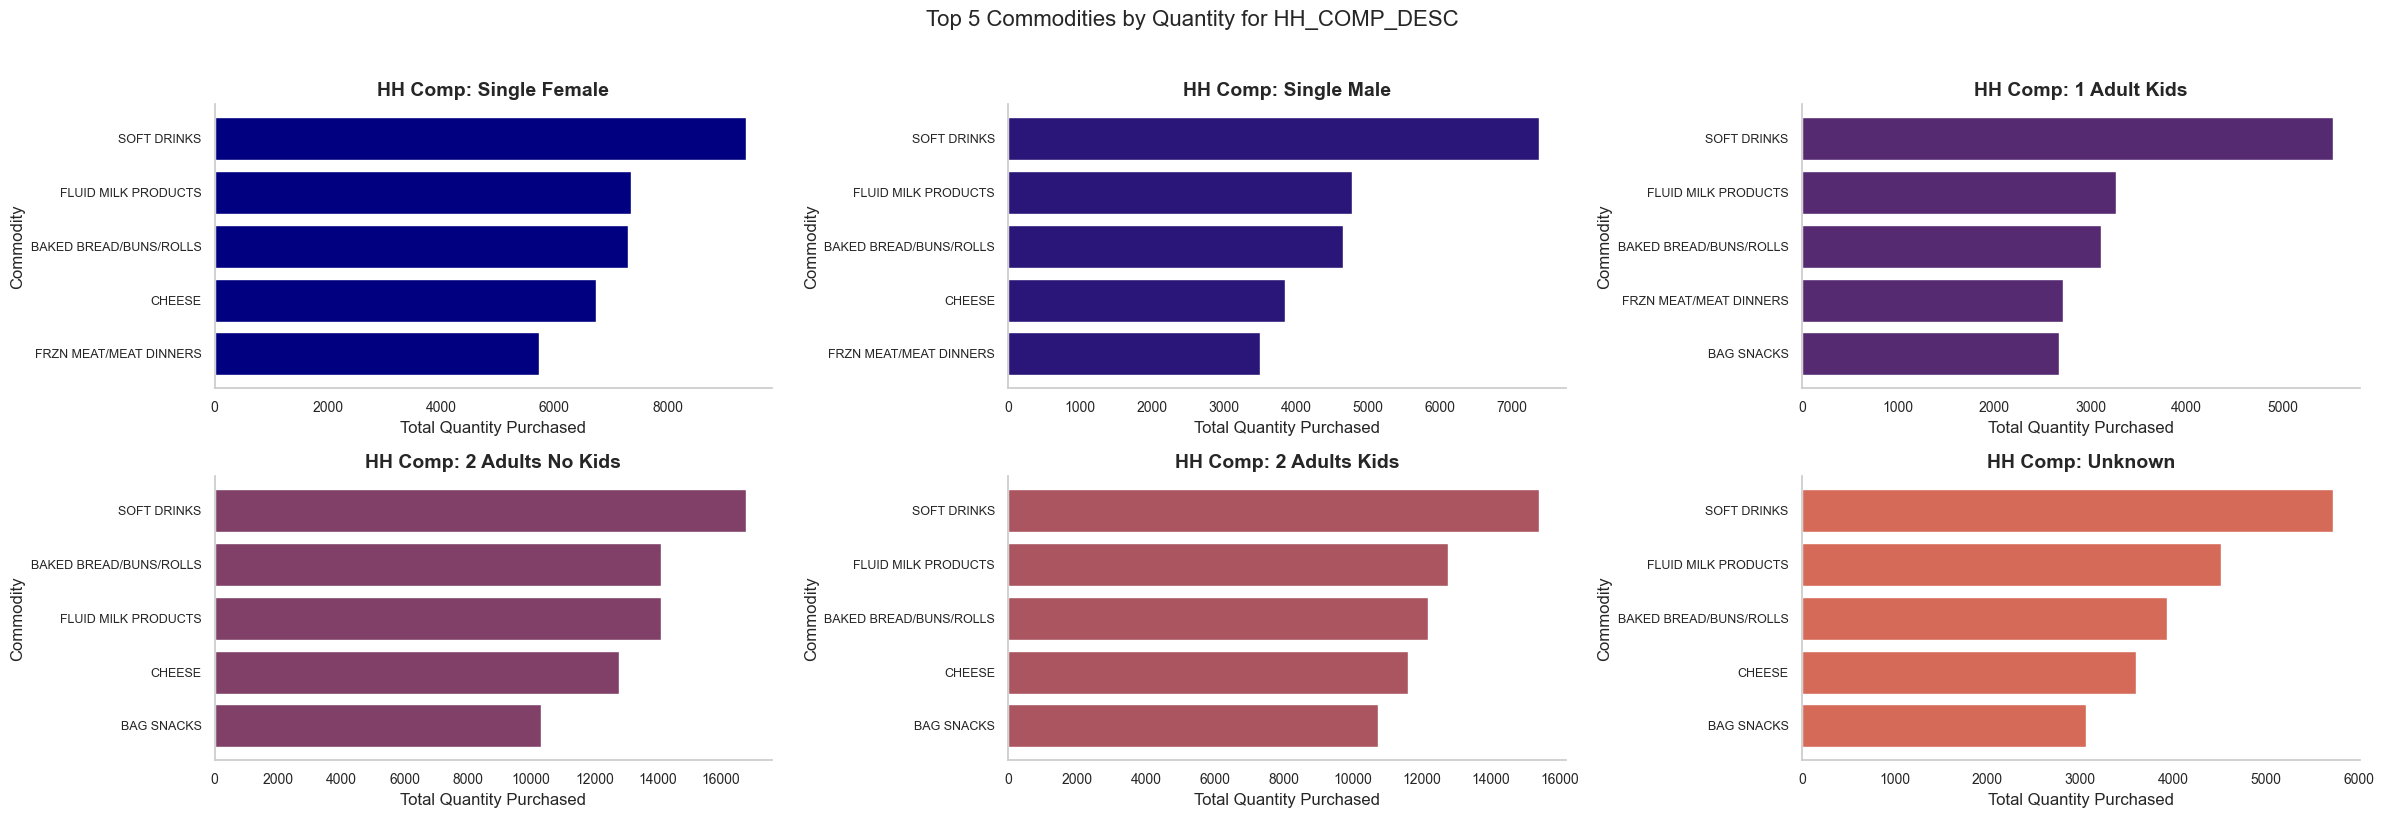

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd

top_by_hhcomp_comm = (
    merged_df
    .groupby(['HH_COMP_DESC', 'COMMODITY_DESC'], observed=True)['QUANTITY']
    .count()
    .reset_index()
    .sort_values(['HH_COMP_DESC', 'QUANTITY'], ascending=[True, False])
    .groupby('HH_COMP_DESC')
    .head(5)
)

commodity_order = (
    top_by_hhcomp_comm.groupby('COMMODITY_DESC')['QUANTITY']
    .sum()
    .reset_index()
    .sort_values(by='QUANTITY', ascending=False)
)['COMMODITY_DESC'].tolist()

top_by_hhcomp_comm['COMMODITY_DESC'] = pd.Categorical(
    top_by_hhcomp_comm['COMMODITY_DESC'], categories=commodity_order, ordered=True
)

custom_cmap = mcolors.LinearSegmentedColormap.from_list("navy_coral", ["navy", "coral"])

hhcomp_groups = top_by_hhcomp_comm['HH_COMP_DESC'].unique()
num_cols = 3
num_rows = -(-len(hhcomp_groups) // num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 4 * num_rows))
axes = axes.flatten()

for i, grp in enumerate(hhcomp_groups):
    subset = top_by_hhcomp_comm[top_by_hhcomp_comm['HH_COMP_DESC'] == grp].sort_values(by="QUANTITY", ascending=True)
    axes[i].barh(subset['COMMODITY_DESC'], subset['QUANTITY'], color=custom_cmap(i / len(hhcomp_groups)))
    axes[i].set_title(f"HH Comp: {grp}", fontsize=14)
    axes[i].set_xlabel("Total Quantity Purchased")
    axes[i].set_ylabel("Commodity")
    axes[i].tick_params(axis='x', labelsize=10)
    axes[i].tick_params(axis='y', labelsize=9)
    axes[i].grid(False)
    axes[i].set_facecolor("white")
    axes[i].spines["top"].set_visible(False)
    axes[i].spines["right"].set_visible(False)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Top 5 Commodities by Quantity for HH_COMP_DESC", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


- Households with kids favor fluid milk products and bag snacks more than single or no-kid households.-
- Soft drinks appear consistently, but single-female households show more frozen/refrigerated items, indicating convenience-driven choices.

/var/folders/qf/l8sfrcpd6vq2564v1_qt31fm0000gn/T/ipykernel_19089/74961719.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_df


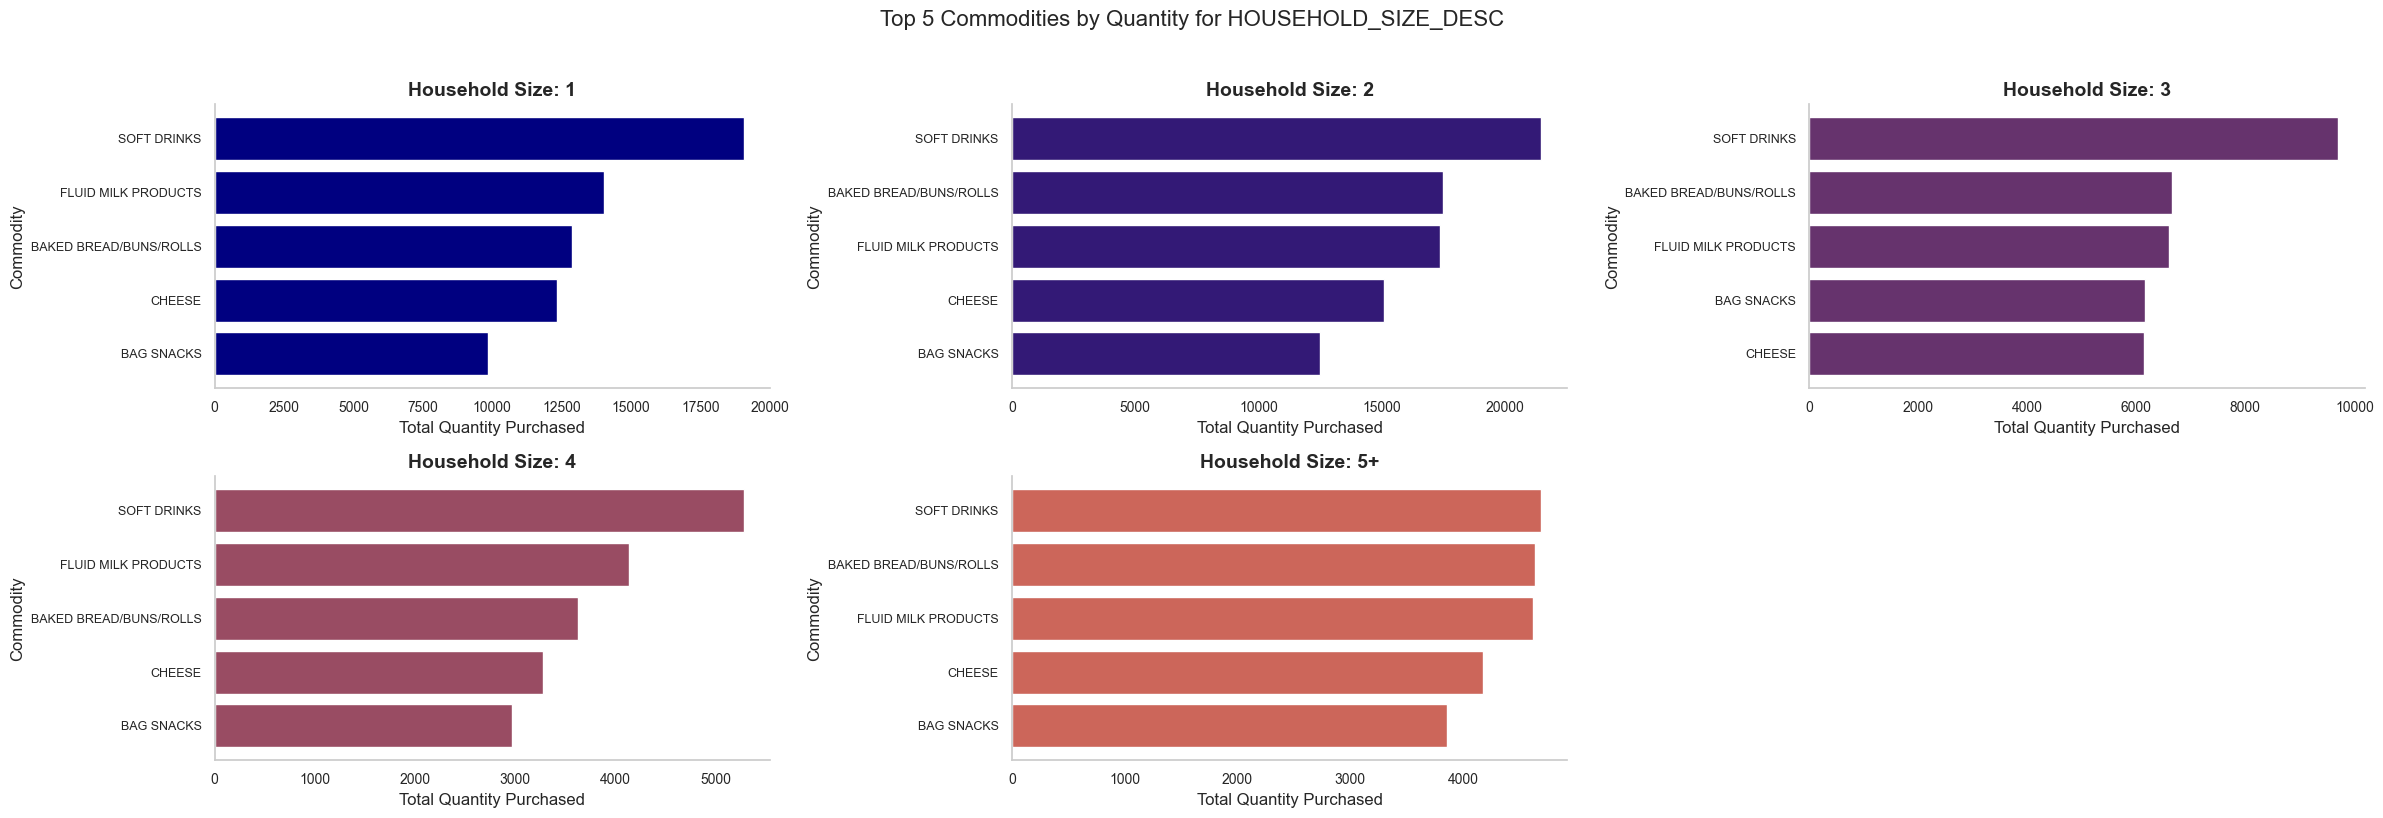

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd

top_by_hhsize_comm = (
    merged_df
    .groupby(['HOUSEHOLD_SIZE_DESC', 'COMMODITY_DESC'], observed=True)['QUANTITY']
    .count()
    .reset_index()
    .sort_values(['HOUSEHOLD_SIZE_DESC', 'QUANTITY'], ascending=[True, False])
    .groupby('HOUSEHOLD_SIZE_DESC')
    .head(5)
)

commodity_order = (
    top_by_hhsize_comm.groupby('COMMODITY_DESC')['QUANTITY']
    .sum()
    .reset_index()
    .sort_values(by='QUANTITY', ascending=False)
)['COMMODITY_DESC'].tolist()

top_by_hhsize_comm['COMMODITY_DESC'] = pd.Categorical(
    top_by_hhsize_comm['COMMODITY_DESC'], categories=commodity_order, ordered=True
)

custom_cmap = mcolors.LinearSegmentedColormap.from_list("navy_coral", ["navy", "coral"])

hhsize_groups = top_by_hhsize_comm['HOUSEHOLD_SIZE_DESC'].unique()
num_cols = 3
num_rows = -(-len(hhsize_groups) // num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 4 * num_rows))
axes = axes.flatten()

for i, grp in enumerate(hhsize_groups):
    subset = top_by_hhsize_comm[top_by_hhsize_comm['HOUSEHOLD_SIZE_DESC'] == grp].sort_values(by="QUANTITY", ascending=True)
    axes[i].barh(subset['COMMODITY_DESC'], subset['QUANTITY'], color=custom_cmap(i / len(hhsize_groups)))
    axes[i].set_title(f"Household Size: {grp}", fontsize=14)
    axes[i].set_xlabel("Total Quantity Purchased")
    axes[i].set_ylabel("Commodity")
    axes[i].tick_params(axis='x', labelsize=10)
    axes[i].tick_params(axis='y', labelsize=9)
    axes[i].grid(False)
    axes[i].set_facecolor("white")
    axes[i].spines["top"].set_visible(False)
    axes[i].spines["right"].set_visible(False)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Top 5 Commodities by Quantity for HOUSEHOLD_SIZE_DESC", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


- Smaller households (1–2) gravitate toward soft drinks and breads/grains, while larger ones (3+) add more fluid milk products and cheese.
- Bag snacks appear in all sizes but increase notably in bigger households, suggesting a higher snack demand.

/var/folders/qf/l8sfrcpd6vq2564v1_qt31fm0000gn/T/ipykernel_19089/2219051313.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_df


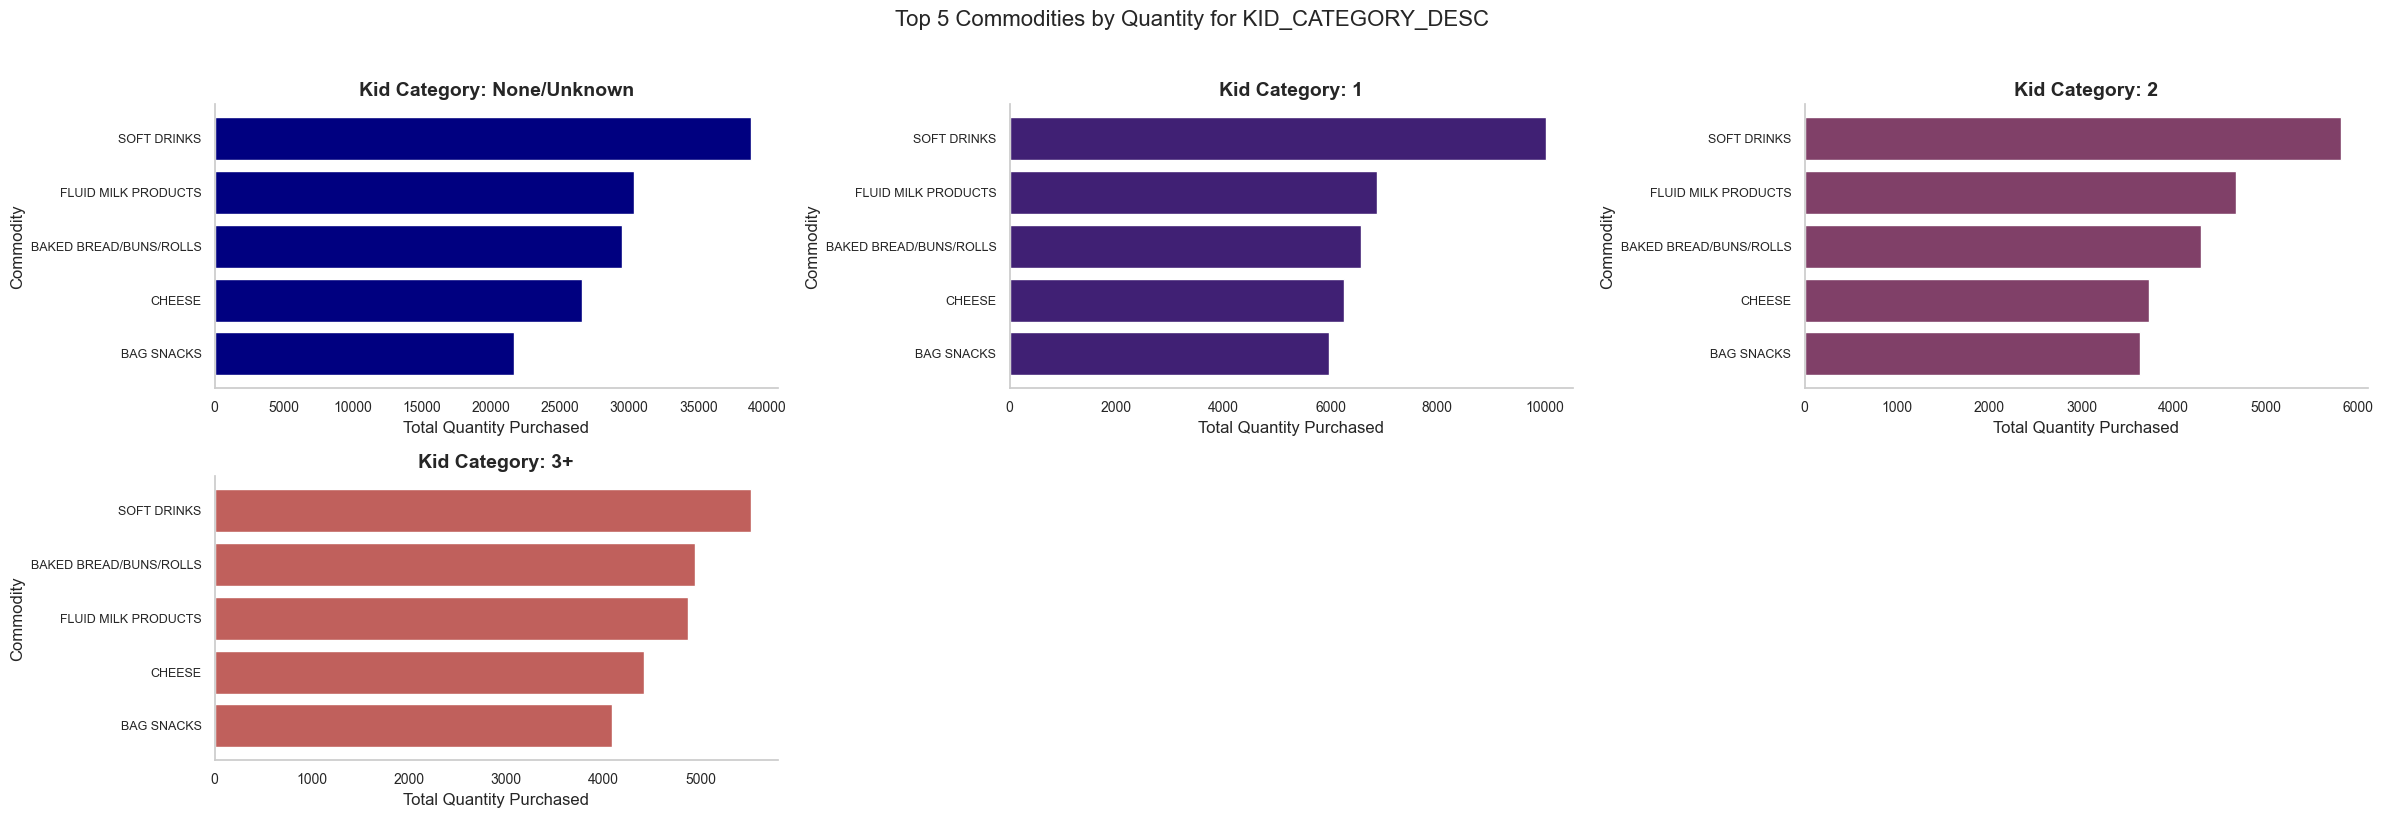

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd

top_by_kidcat_comm = (
    merged_df
    .groupby(['KID_CATEGORY_DESC', 'COMMODITY_DESC'], observed=True)['QUANTITY']
    .count()
    .reset_index()
    .sort_values(['KID_CATEGORY_DESC', 'QUANTITY'], ascending=[True, False])
    .groupby('KID_CATEGORY_DESC')
    .head(5)
)

commodity_order = (
    top_by_kidcat_comm.groupby('COMMODITY_DESC')['QUANTITY']
    .sum()
    .reset_index()
    .sort_values(by='QUANTITY', ascending=False)
)['COMMODITY_DESC'].tolist()

top_by_kidcat_comm['COMMODITY_DESC'] = pd.Categorical(
    top_by_kidcat_comm['COMMODITY_DESC'], categories=commodity_order, ordered=True
)

custom_cmap = mcolors.LinearSegmentedColormap.from_list("navy_coral", ["navy", "coral"])

kidcat_groups = top_by_kidcat_comm['KID_CATEGORY_DESC'].unique()
num_cols = 3
num_rows = -(-len(kidcat_groups) // num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 4 * num_rows))
axes = axes.flatten()

for i, grp in enumerate(kidcat_groups):
    subset = top_by_kidcat_comm[top_by_kidcat_comm['KID_CATEGORY_DESC'] == grp].sort_values(by="QUANTITY", ascending=True)
    axes[i].barh(subset['COMMODITY_DESC'], subset['QUANTITY'], color=custom_cmap(i / len(kidcat_groups)))
    axes[i].set_title(f"Kid Category: {grp}", fontsize=14)
    axes[i].set_xlabel("Total Quantity Purchased")
    axes[i].set_ylabel("Commodity")
    axes[i].tick_params(axis='x', labelsize=10)
    axes[i].tick_params(axis='y', labelsize=9)
    axes[i].grid(False)
    axes[i].set_facecolor("white")
    axes[i].spines["top"].set_visible(False)
    axes[i].spines["right"].set_visible(False)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Top 5 Commodities by Quantity for KID_CATEGORY_DESC", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


- Soft drinks remain popular across all kid categories, but bag snacks and fluid milk products rise significantly as kid count goes up.-
- Cheese also gains traction in larger kid households, pointing to more meal-prep staples.


/var/folders/qf/l8sfrcpd6vq2564v1_qt31fm0000gn/T/ipykernel_19089/1791569020.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_df


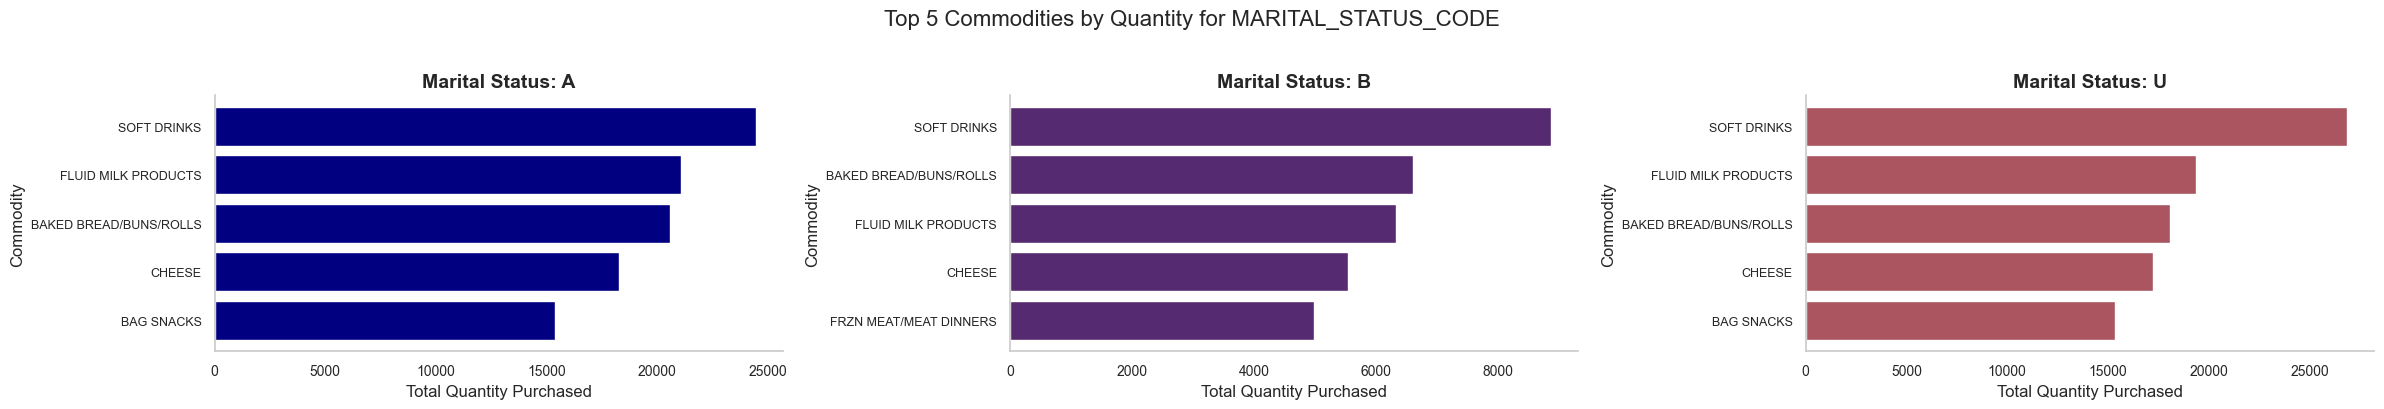

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd

top_by_marital_comm = (
    merged_df
    .groupby(['MARITAL_STATUS_CODE', 'COMMODITY_DESC'], observed=True)['QUANTITY']
    .count()
    .reset_index()
    .sort_values(['MARITAL_STATUS_CODE', 'QUANTITY'], ascending=[True, False])
    .groupby('MARITAL_STATUS_CODE')
    .head(5)
)

commodity_order = (
    top_by_marital_comm.groupby('COMMODITY_DESC')['QUANTITY']
    .sum()
    .reset_index()
    .sort_values(by='QUANTITY', ascending=False)
)['COMMODITY_DESC'].tolist()

top_by_marital_comm['COMMODITY_DESC'] = pd.Categorical(
    top_by_marital_comm['COMMODITY_DESC'], categories=commodity_order, ordered=True
)

custom_cmap = mcolors.LinearSegmentedColormap.from_list("navy_coral", ["navy", "coral"])

marital_groups = top_by_marital_comm['MARITAL_STATUS_CODE'].unique()
num_cols = 3
num_rows = -(-len(marital_groups) // num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 4 * num_rows))
axes = axes.flatten()

for i, grp in enumerate(marital_groups):
    subset = top_by_marital_comm[top_by_marital_comm['MARITAL_STATUS_CODE'] == grp].sort_values(by="QUANTITY", ascending=True)
    axes[i].barh(subset['COMMODITY_DESC'], subset['QUANTITY'], color=custom_cmap(i / len(marital_groups)))
    axes[i].set_title(f"Marital Status: {grp}", fontsize=14)
    axes[i].set_xlabel("Total Quantity Purchased")
    axes[i].set_ylabel("Commodity")
    axes[i].tick_params(axis='x', labelsize=10)
    axes[i].tick_params(axis='y', labelsize=9)
    axes[i].grid(False)
    axes[i].set_facecolor("white")
    axes[i].spines["top"].set_visible(False)
    axes[i].spines["right"].set_visible(False)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Top 5 Commodities by Quantity for MARITAL_STATUS_CODE", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


- All marital statuses share a preference for soft drinks and fluid milk products.
- Married couples (A/B) purchase slightly more breads/grains, while singles (U) also pick bag snacks more frequently.

/var/folders/qf/l8sfrcpd6vq2564v1_qt31fm0000gn/T/ipykernel_19089/1434111878.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_df


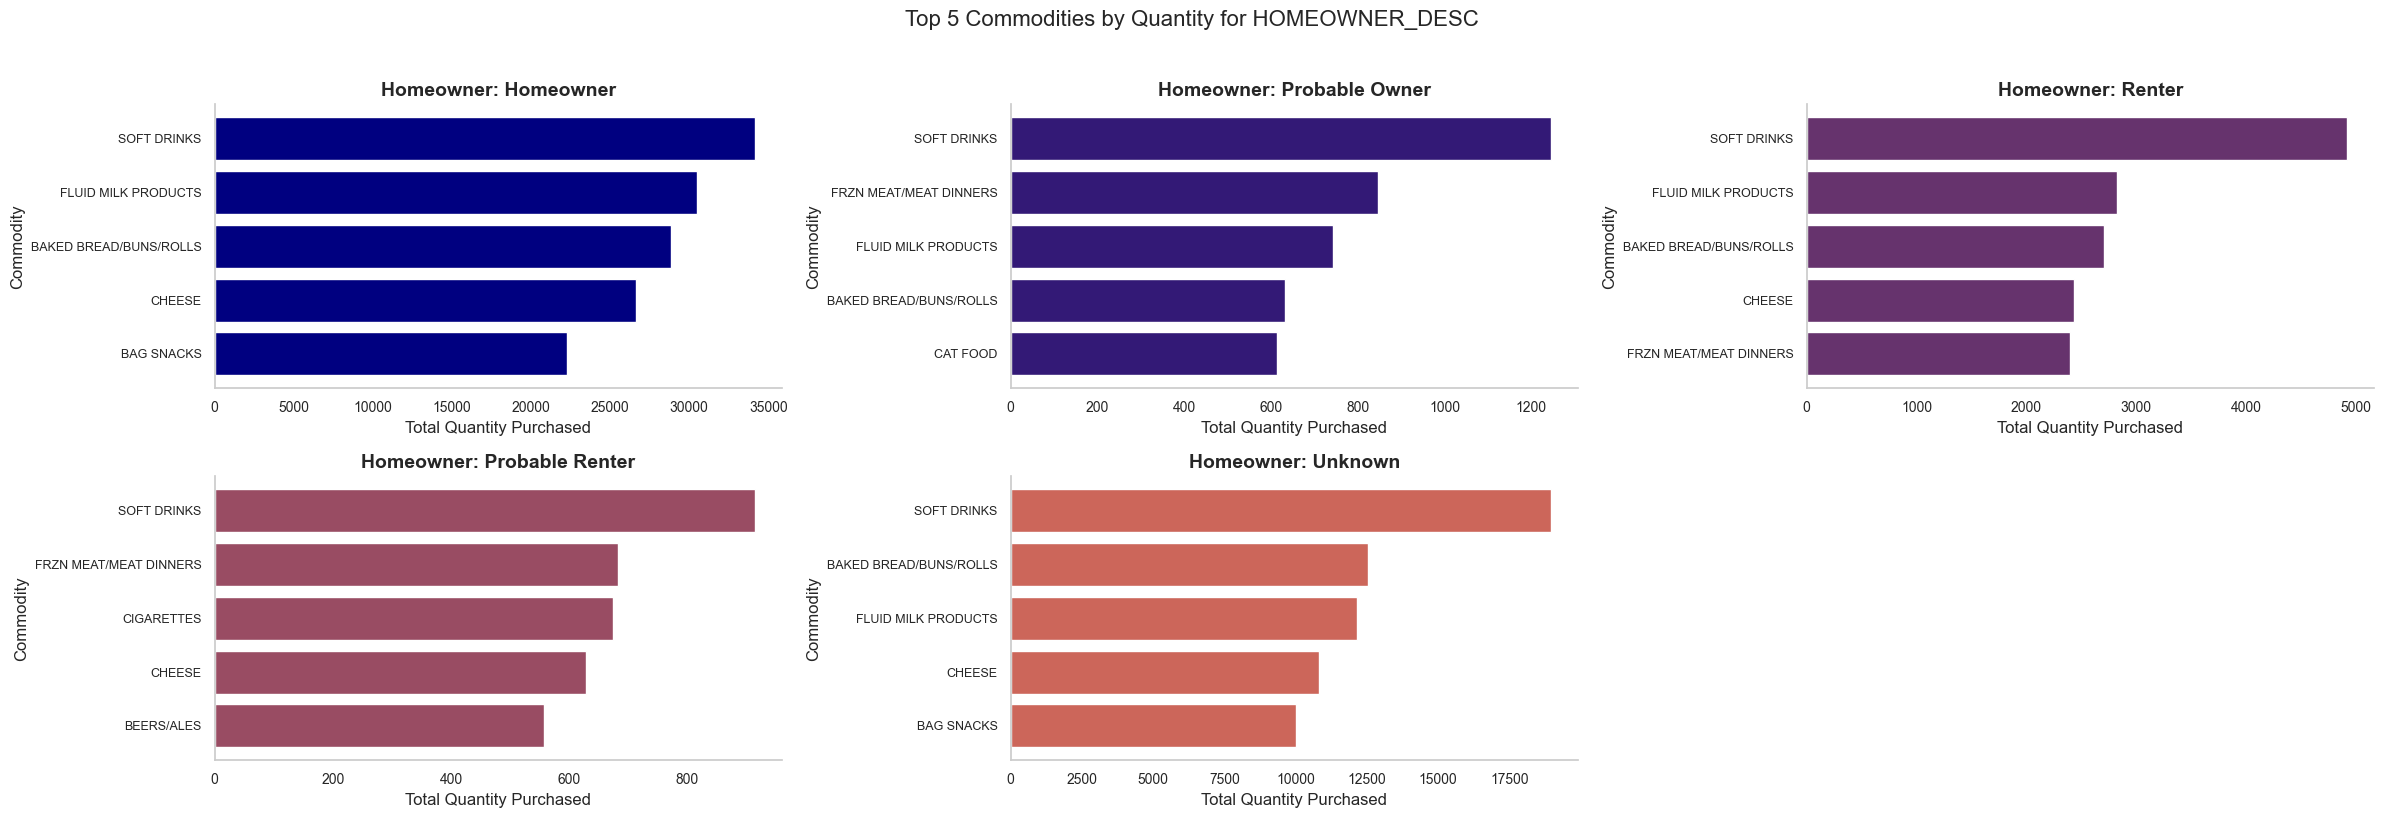

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd

top_by_homeowner_comm = (
    merged_df
    .groupby(['HOMEOWNER_DESC', 'COMMODITY_DESC'], observed=True)['QUANTITY']
    .count()
    .reset_index()
    .sort_values(['HOMEOWNER_DESC', 'QUANTITY'], ascending=[True, False])
    .groupby('HOMEOWNER_DESC')
    .head(5)
)

commodity_order = (
    top_by_homeowner_comm.groupby('COMMODITY_DESC')['QUANTITY']
    .sum()
    .reset_index()
    .sort_values(by='QUANTITY', ascending=False)
)['COMMODITY_DESC'].tolist()

top_by_homeowner_comm['COMMODITY_DESC'] = pd.Categorical(
    top_by_homeowner_comm['COMMODITY_DESC'], categories=commodity_order, ordered=True
)

custom_cmap = mcolors.LinearSegmentedColormap.from_list("navy_coral", ["navy", "coral"])

homeowner_groups = top_by_homeowner_comm['HOMEOWNER_DESC'].unique()
num_cols = 3
num_rows = -(-len(homeowner_groups) // num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 4 * num_rows))
axes = axes.flatten()

for i, grp in enumerate(homeowner_groups):
    subset = top_by_homeowner_comm[top_by_homeowner_comm['HOMEOWNER_DESC'] == grp].sort_values(by="QUANTITY", ascending=True)
    axes[i].barh(subset['COMMODITY_DESC'], subset['QUANTITY'], color=custom_cmap(i / len(homeowner_groups)))
    axes[i].set_title(f"Homeowner: {grp}", fontsize=14)
    axes[i].set_xlabel("Total Quantity Purchased")
    axes[i].set_ylabel("Commodity")
    axes[i].tick_params(axis='x', labelsize=10)
    axes[i].tick_params(axis='y', labelsize=9)
    axes[i].grid(False)
    axes[i].set_facecolor("white")
    axes[i].spines["top"].set_visible(False)
    axes[i].spines["right"].set_visible(False)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Top 5 Commodities by Quantity for HOMEOWNER_DESC", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


DIFFERNTIATING PURCHASE
- probable owners: CAT FOOD
- probable renters: BEER and CIGARETTES

___

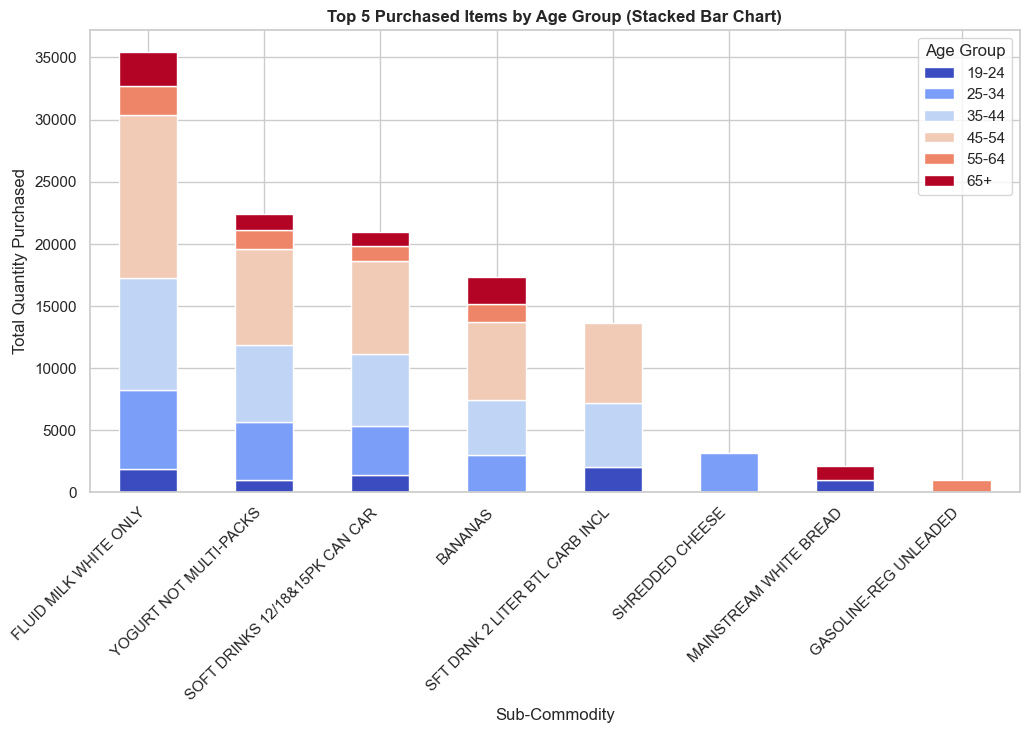

In [ ]:
# Pivot the data for better stacked visualization
pivot_data = top_by_age.pivot(index="SUB_COMMODITY_DESC", columns="AGE_DESC", values="QUANTITY")

# Create a stacked bar chart
pivot_data.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="coolwarm")

plt.title("Top 5 Purchased Items by Age Group (Stacked Bar Chart)")
plt.xlabel("Sub-Commodity")
plt.ylabel("Total Quantity Purchased")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Age Group")

plt.show()


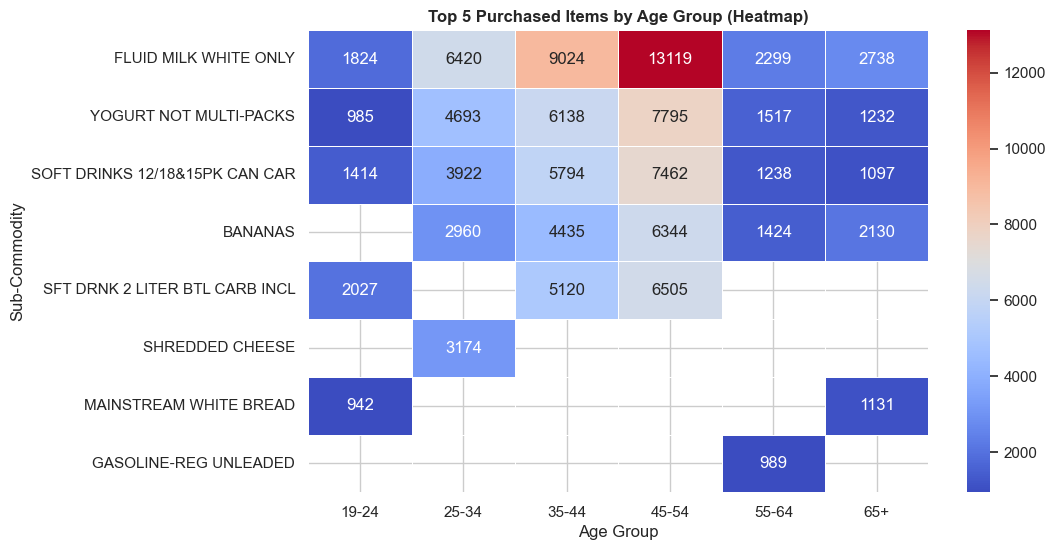

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot the data
heatmap_data = top_by_age.pivot(index="SUB_COMMODITY_DESC", columns="AGE_DESC", values="QUANTITY")

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5)

plt.title("Top 5 Purchased Items by Age Group (Heatmap)")
plt.xlabel("Age Group")
plt.ylabel("Sub-Commodity")

plt.show()


#### All Demographics

/var/folders/qf/l8sfrcpd6vq2564v1_qt31fm0000gn/T/ipykernel_19089/2092189296.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['COMMODITY_DESC'] = pd.Categorical(


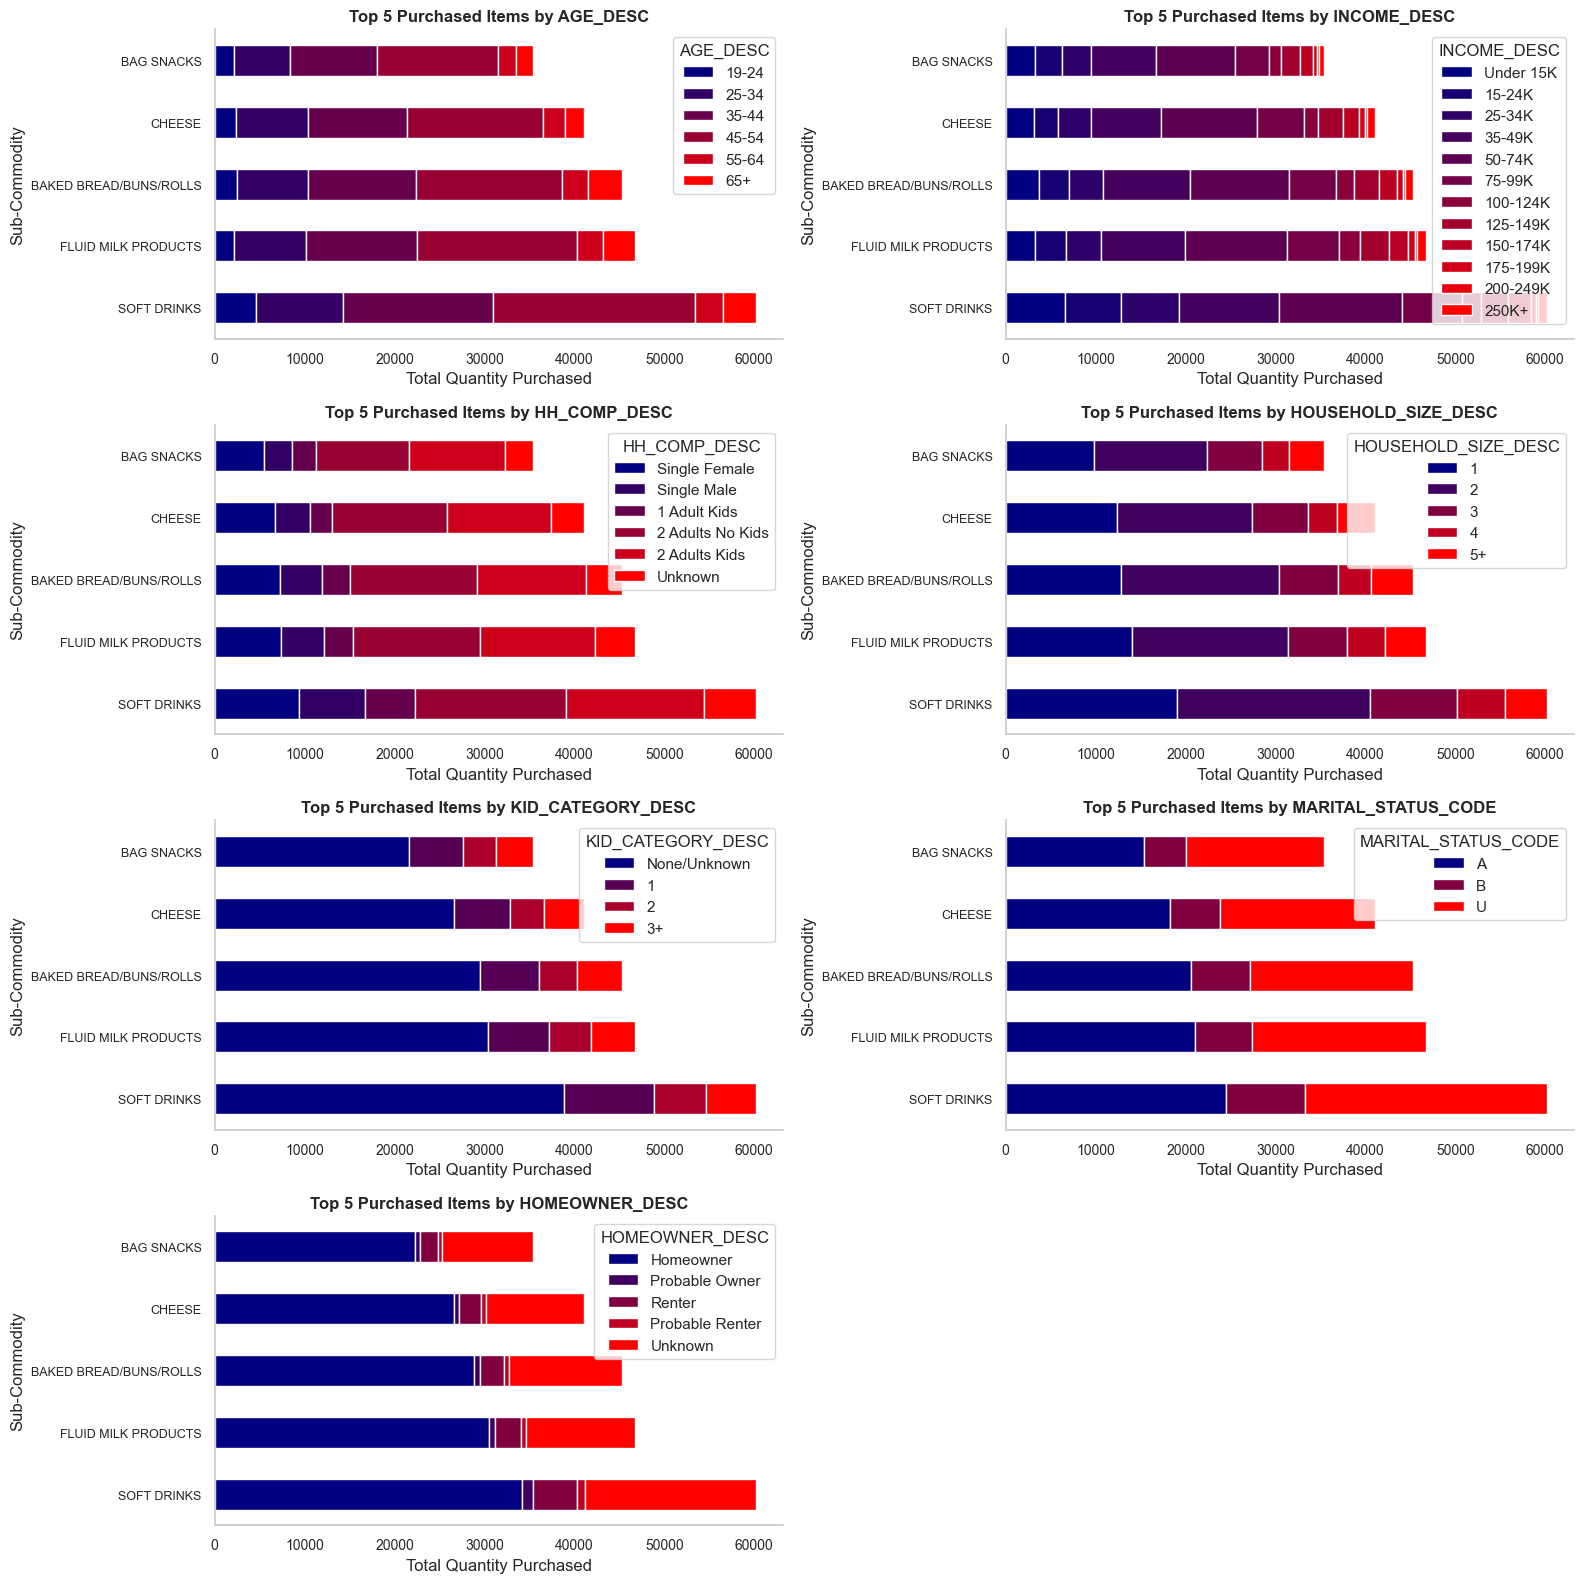

In [ ]:
# Define categorical order
cat_orders = {
    "AGE_DESC": ['19-24', '25-34', '35-44', '45-54', '55-64', '65+'],
    "INCOME_DESC": ['Under 15K', '15-24K', '25-34K', '35-49K', '50-74K', '75-99K',
                    '100-124K', '125-149K', '150-174K', '175-199K', '200-249K', '250K+'],
    "HH_COMP_DESC": ['Single Female', 'Single Male', '1 Adult Kids', '2 Adults No Kids',
                     '2 Adults Kids', 'Unknown'],
    "HOUSEHOLD_SIZE_DESC": ['1', '2', '3', '4', '5+'],
    "KID_CATEGORY_DESC": ['None/Unknown', '1', '2', '3+'],
    "MARITAL_STATUS_CODE": ['A', 'B', 'U'],
    "HOMEOWNER_DESC": ['Homeowner', 'Probable Owner', 'Renter', 'Probable Renter', 'Unknown']
}

# Convert to categorical for correct sorting (check if column exists first)
for col, order in cat_orders.items():
    if col in merged_df.columns:
        cat_dtype = pd.CategoricalDtype(categories=order, ordered=True)
        merged_df[col] = merged_df[col].astype(cat_dtype)

# Step 1: Find the top 5 COMMODITY_DESC across **all transactions** using `count()`
global_top5 = (
    merged_df.groupby('COMMODITY_DESC', observed=True)['QUANTITY']
    .count()  # Keep count() as requested
    .reset_index()
    .sort_values(by='QUANTITY', ascending=False)
    .head(5)  # Select only the top 5 most purchased items
)['COMMODITY_DESC'].tolist()

# Step 2: Filter dataset to only keep these top 5 commodities
filtered_df = merged_df[merged_df['COMMODITY_DESC'].isin(global_top5)]

# Step 3: Ensure commodities are sorted **properly**
commodity_order = (
    filtered_df.groupby('COMMODITY_DESC', observed=True)['QUANTITY']
    .count()
    .reset_index()
    .sort_values(by='QUANTITY', ascending=False)  # Sort by count descending
)['COMMODITY_DESC'].tolist()

# Convert commodity to categorical type for correct ordering
filtered_df['COMMODITY_DESC'] = pd.Categorical(
    filtered_df['COMMODITY_DESC'],
    categories=commodity_order,
    ordered=True
)

# Select demographic columns that exist in merged_df
cols_to_plot = [col for col in cat_orders.keys() if col in merged_df.columns]

# Define layout: n_cols per row, calculate number of rows dynamically
cols_per_row = 2
num_cols = len(cols_to_plot)
num_rows = -(-num_cols // cols_per_row)  # Equivalent to math.ceil(num_cols / cols_per_row)

# Create a custom colormap from navy blue to coral
custom_cmap = mcolors.LinearSegmentedColormap.from_list("navy_coral", ["navy", "red"])

# Create subplots grid
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(8 * cols_per_row, 4 * num_rows))

# Ensure axes is always iterable
axes = axes.flatten() if num_cols > 1 else [axes]

# Step 4: Generate bar charts for each demographic category
for i, col in enumerate(cols_to_plot):
    top_items = (
        filtered_df
        .groupby([col, 'COMMODITY_DESC'], observed=True)['QUANTITY']
        .count()  # Keep count() as requested
        .reset_index()
        .sort_values(by="COMMODITY_DESC", ascending=False)
    )

    # Pivot to reshape for bar chart
    pivot_data = top_items.pivot(index='COMMODITY_DESC', columns=col, values='QUANTITY')

    # Plot
    pivot_data.plot(kind='barh', ax=axes[i], stacked=True, colormap=custom_cmap)

    axes[i].set_title(f"Top 5 Purchased Items by {col}")
    axes[i].set_xlabel("Total Quantity Purchased")
    axes[i].set_ylabel("Sub-Commodity")

    # Format x-axis labels
    axes[i].tick_params(axis='x', labelsize=10)
    axes[i].tick_params(axis='y', labelsize=9)

    axes[i].grid(False)

    # Style adjustments
    axes[i].set_facecolor("white")
    axes[i].spines["top"].set_visible(False)
    axes[i].spines["right"].set_visible(False)

# Hide unused subplots (if num_cols isn't a multiple of cols_per_row)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Improve layout
plt.tight_layout()
plt.show()



---
## EDA Functions/Non-Primary Code

In [ ]:
# Return all nunique values and ranges for all variables
def dataset_summary(df):
    summary = pd.DataFrame({
        'Unique Values': df.nunique(),
        'Min': df.min(numeric_only=True),
        'Max': df.max(numeric_only=True)
    })
    return summary

summary_demographics = dataset_summary(demographics)
summary_transaction = dataset_summary(transaction_data)
summary_product = dataset_summary(product)

from IPython.display import display
print("\033[1mSummary Demographics \033[0m")
display(summary_demographics)
print("\033[1mSummary Transaction \033[0m")
display(summary_transaction)
print("\033[1mSummary Product \033[0m")
display(summary_product)

Summary Demographics 


Unique Values  Min   Max
AGE_DESC                         6  NaN   NaN
HH_COMP_DESC                     6  NaN   NaN
HOMEOWNER_DESC                   5  NaN   NaN
HOUSEHOLD_SIZE_DESC              5  NaN   NaN
INCOME_DESC                     12  NaN   NaN
KID_CATEGORY_DESC                4  NaN   NaN
MARITAL_STATUS_CODE              3  NaN   NaN
household_key                  801    1 2,499

Summary Transaction 


Unique Values            Min            Max
household_key               2500              1          2,500
BASKET_ID                 276484 26,984,851,472 42,305,362,535
DAY                          711              1            711
PRODUCT_ID                 92339         25,671     18,316,298
QUANTITY                   11746              0         89,638
SALES_VALUE                 5502              0            840
STORE_ID                     582              1         34,280
RETAIL_DISC                 2414           -180              4
TRANS_TIME                  1440              0          2,359
WEEK_NO                      102              1            102
COUPON_DISC                  415            -56              0
COUPON_MATCH_DISC             80             -8              0

Summary Product 


Unique Values    Min        Max
BRAND                             2    NaN        NaN
COMMODITY_DESC                  308    NaN        NaN
CURR_SIZE_OF_PRODUCT           4345    NaN        NaN
DEPARTMENT                       44    NaN        NaN
MANUFACTURER                   6476      1      6,477
PRODUCT_ID                    92353 25,671 18,316,298
SUB_COMMODITY_DESC             2383    NaN        NaN